**Credit Scoring Model for XYZ Bank**
<br>
Date: 8.5.2025

This study explores the performance of popular credit scoring models built with divergent pipelines on a highly imbalance, high-dimensional sparse dataset. Key topics include:<br>
*  Reject Inference to avoid selection bias against applicants
*  Feature selection and feature engineering strategies for pipelines to mitigate epistemic uncenrtainty
*  Models which mitigate aleatoric uncertainty 
*  Optimization of performance trade-offs 

## Client Instruction
The goal is to develop a predictive model for customer defaults. The model should balance minimizing customer defaults while recognizing the bank's commercial goals for customer acquisition. <br>
## Constraints on Model Selection
### Profit Maximization
A key constraint is the missing data for customer liquidity/solvency features (credit card balance, live account balance) which is normally available to the lender and is fundamental to feature engineering.  The optimal cutoff policy for an accept/decline model depends on the bank’s business objectives, which presumably include risk, volume and profit tradeoffs apart from the tradeoffs between expected losses and expected profit.   In this regard, it is a considerable disadvantage that the dataset lacks key features for generating profitability metrics, so multi-objective credit-scoring frameworks cannot be applied beyond an abbreviated Worst Case Expected Minimum Cost (‘WCEMC’) appraisal, which - if the missing information subsequently becomes available – could be used to optimize risks and costs for the bank .  
### Regulatory Compliance
XYZ bank discriminates against customers over 40 years of age caring for elderly parents in a shared residence.  The bank has regulatory obligation to identify bias against applicants who are excluded based on social, ethnic or group specific features so there are regulatory constraints on the choice of model.  Black-box artificial neural network (‘ANN’) models perform well in academic treatise but are not routinely used by lenders because they are difficult to interpret, cannot refute bias and are non-compliant with Basel II/III regulations  .  This is a constraint when not using interpretable models.


From a methodlogical perspective, the development of the model was founded on:<br>
1.  **Reject Inference framework**<br>
The model will utilized all the customer data in the dataset, not just the delinquency data from 'GOOD' or approved customers.  The strategic goal of using all customer data is that new applicants will be more accurately screened based on the entire universe of deliqnuency data availablel to the bank.
<br>
2.  **Popular Credit Scoring Models**<br>
For regulatory reasons, credit-scoring models should be explainable e.g. the bank potentially discriminates against middle-aged applicants caring for elderly parents.  While CNN models can be used to develop strongly performing models, they can be difficult to interpret.  Consequently, we will evaluate four popular credit scoring models and select the one which performs best on the XYZ dataset.
<br>
3.  **Feature Selection & Dimensionality Reduction**<br>
We look at several options for detecting linear and non-linear correlations in the dataset with a view to eliminating noisy features and focusing on signals. For some of the selected models, this is not essential (and perhaps disadvantageous) as they use Lasso/Ridge to amplify signals from promising features and reduce the predictive weight for less promising features.
<br>
4. **Outliers & Discretization**<br>
Credit scoring models are highly sensitive to extreme values and outliers and removing outliers can signficantly improve the predictive accuracy and performance of models. Conversely, the  information loss can negatively impact the performance of tree-based and ensemble models which are robust at dealing with outliers.
<br>
5.  **Minority Class Imbalance in Target & SMOTE**<br>
The vast majority of bank customers diligently pay their credits, and according to data from the Federal Reserve, ECB and credit institutions lobby groups, less than 4% of customer credits become delinquent. Consequently, a challenge for credit scoring models is how to deal with this extreme class imbalance in the target.  Oversampling and undersampling are popular techniques for addressing the imbalance and for this assignment, we will use the Synthetic Minority Oversampling Technique ('SMOTE').   
<br>
6.  **Pipelines**<br>
Typically, models are tested on datasets which go through the same preprocessing.  As indicated above, certain models perform well on noisy datasets while others benefit from the elimination of outliers and dimensionality reduction.  For developing and selecting the best performing model for this particular dataset, we evaluate the untuned  models' performance on five pipelines: a 'noisy' pipeline where all the available data is used; an 'outlier' pipeline which eliminates outliers; a SMOTE pipeline using focussing on class imbalance; a 'discrete' pipeline where the continuous variables have been binned, and a 'defeatured' pipeline where EDA identifies features with low importances and informational gain which are dropped.
<br>
7.  **Evaluation Criteria**<br>
XYZ bank is targetting young customers with high Customer Lifecycle Values.  Condequently, for profitability reasons, we want to capture as many 'Good' customers as possible and we accordingly calibrate the probability models focussing on ROC-AUC, balanced accuracy, Balanced Accuracy, Precision, Recall and F1 scores focusing particularly on minority scores becuase of the high imbalace in the target classes.   

**REFERENCES**<br>
Hüllermeier, E., & Waegeman, W. (2021). Aleatoric and epistemic uncertainty in machine learning: an introduction to concepts and methods. Machine Learning, 110(3), 457-506. https://doi.org/10.1007/s10994-021-05946-3 <br>
Shen, F., Zhao, X., & Kou, G. (2020). Three-stage reject inference learning framework for credit scoring using unsupervised transfer learning and three-way decision theory. Decision Support Systems, 137, 113366.https://doi.org/10.1016/j.dss.2020.113366 <br>
Tian, Y., Bian, B., Tang, X., & Zhou, J. (2021). A new non-kernel quadratic surface approach for imbalanced data classification in online credit scoring. Information Sciences, 563, 150-165. https://doi.org/https://doi.org/10.1016/j.ins.2021.02.026 <br>
Tian, Y., Yong, Z., & Luo, J. (2018). A new approach for reject inference in credit scoring using kernel-free fuzzy quadratic surface support vector machines. Applied Soft Computing, 73, 96-105. https://doi.org/https://doi.org/10.1016/j.asoc.2018.08.021 <br>
Xu, Y., Kou, G., Peng, Y., Ding, K., Ergu, D., & Alotaibi, F. S. (2024). Profit- and risk-driven credit scoring under parameter uncertainty: A multiobjective approach. Omega, 125, 103004. https://doi.org/https://doi.org/10.1016/j.omega.2023.103004 

# 1. Preliminary Review of Dataset
____________________________________________________

## 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.io as pio
from dash import dash_table

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config
from sklearn.decomposition import PCA

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import loguniform
from scipy.stats import randint, uniform

# import shap

# Dealing with imbalances
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Models to be explored
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier

# Model-selection & metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.metrics import log_loss, brier_score_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import r2_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp


import time
import warnings
warnings.filterwarnings("ignore")

set_config(display = 'diagram')
# random state
rs = 42


## 1.2 Formatting Helpers

In [2]:
# color & hues
colors = ['wheat', 'tan', 'lightgrey', 'darkgrey', 'sienna' , 'darksalmon', 'firebrick', 'darkred']
fs_colors = ['darkgrey', 'lightgrey', 'tan']
binary_colors = ['darkgrey', 'wheat']

# Formatting for table column width
cw = 18

# Overview of dataframe function
def df_overview(data):
    """
    Function to summarize data structure in table format
    Output:  Data Table
    """
    # Header rows
    print(f"{'Dataframe Shape:' :<{cw}}{str(data.shape):>{cw}}")
    print(f"{'Duplicates Count:' :<{cw}}{data.duplicated().sum():>{cw}}")
    print("*" * cw *2, '\n')

    # Table headers
    print(f"{'Column Name' :<{cw*2}}{'Data type':<{cw}}{'Non-null Values':>{cw}}{'Missing Values':>{cw}}{'Cardinality':>{cw}}")
    print("*" * cw * 6)

    # Table data
    for col in data.columns:
        print(f"{col :<{cw*2}}{str(data[col].dtype):<{cw}}{data[col].count():>{cw}}{data[col].isnull().sum():>{cw}}{data[col].nunique(dropna = False):>{cw}}")
    print("*" * cw * 6, '\n')


# Deep dive on the top class values of dataframe features
def top_class_values(data):
    """
    Counts unique values in filtered dataframes
    Output:  Data table
    """
    for col in data:
        print(data[col].value_counts().head(10))
        print('Unique values:', data[col].nunique(dropna = False), '\n')


# Function with a temporary mapped series for occupation
def jobs_overview(data):
    """
    Generates value counts for occupations
    from occupations dictionary
    """
    occupation_mapped = data['occupation'].map(occupation_dict)
    print(occupation_mapped.value_counts())


# binarize columns with full stop/period strings
def replace_fs_values(data, col):
    """
    Replace unknown fs_values with 0
    """
    data[col] = data[col].replace({'.': '0'})
    return data


# Function with a temporary mapped series for worst credit status
def delinquency_status_dict(data):
    """
    Value counts for delinquency status from dictionary
    filtered for customer characteristics e.g. age/date/residency
    """
    delinquency_status_mapped = data['delinquency_status'].map(worst_status_map)
    print(worst_status_mapped.value_counts())


# Quick visualisation function
def snapshot(data, x_col, colors = None):
    """
    Function to summarize & save visualized features
    Output:  Bar chart and table
    """
    plt.figure(figsize = (10, 3))

    # Plot the countplot
    sns.countplot(data = data, x = x_col, hue = x_col, palette = colors, legend = True)
    plt.title(f'{x_col} Feature Distribution')

    # Save the plot
    filename = f"{x_col}_feature_distribution"
    plt.savefig(f"{filename}.png", format = "png", dpi = 300)

    # Show the plot
    plt.show()

    values_abs = data[x_col].value_counts()
    values_percent = round((values_abs / len(data)) * 100, 2)

    # Combine into a DataFrame
    vals_table = pd.DataFrame({x_col: values_abs, '%': values_percent})

    # Print the summary table
    print(vals_table.head())


# Function to help compare features visually by cross-tabulation
def ct_features(data, x_col, y_col, colors = None):
    """
    Cross-tabulate two features, save visualisation

    Args:
        data (pd.DataFrame): Input pandas dataframe
        x_col (str): X-axis column for cross-tabulation
        y_col (str): Column for showing distributions
        colors (str or list): Default pastels or matplotlib palette

    Returns:
        Visualization, saved png copy and summary dataframe
    """

    # Cross-tabulation
    cross_tab_norm = pd.crosstab(
        data[x_col],
        data[y_col],
        normalize = 'index'
    )
    cross_tab_count = pd.crosstab(
        data[x_col],
        data[y_col]
    )

    # Plot stacked bar charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

    cross_tab_norm.plot(kind = 'bar', stacked = True, color = colors, ax = ax1)
    cross_tab_count.plot(kind = 'bar', stacked = True, color = colors, ax = ax2)

    ax1.set_title(f'{x_col} by {y_col}: Percentage')
    ax1.set_ylabel('Percentage')
    ax2.set_title(f'{x_col} by {y_col}: Count')
    ax2.set_ylabel('Count')

    plt.tight_layout()
    plt.savefig(f"{x_col}_by_{y_col}.png", format = "png", dpi = 300)
    plt.show()

    # Combine count and normalized tables
    cross_df = pd.concat([cross_tab_count, cross_tab_norm], axis = 1, keys = ['Count', 'Normalized'])
    print(f'Distribution by {x_col} & {y_col}')
    return cross_df.round(2).T


#  Vertically stacked horizontal barcharts
def ct_features_vert(data, x_col, y_col, colors = None):
    """
    Cross-tabulate & visualizes two features on horizontal bar charts
    Vertical version of ct_features

    Args:
        data (pd.DataFrame): Input pandas dataframe
        x_col (str): X-axis column for cross-tabulation
        y_col (str): Column for showing distributions
        colors (str or list): Default pastels or matplotlib palette

    Returns:
        Visualization, saved png copy and summary dataframe

    """

    # Cross-tabulation
    cross_tab_norm = pd.crosstab(
        data[x_col],
        data[y_col],
        normalize = 'index'
    ).astype(float)  # Ensure numeric values

    cross_tab_count = pd.crosstab(
        data[x_col],
        data[y_col]
    ).astype(float)  # Ensure numeric values

    # Plot stacked horizontal bar charts
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 8))  # 2 rows, 1 column, extra wide

    cross_tab_norm.plot(kind = 'barh', stacked = True, color = colors, ax = ax1)
    cross_tab_count.plot(kind = 'barh', stacked = True, color = colors, ax = ax2)

    ax1.set_title(f'{x_col} by {y_col}: Percentage')
    ax1.set_xlabel('Percentage')
    ax2.set_title(f'{x_col} by {y_col}: Count')
    ax2.set_xlabel('Count')

    plt.tight_layout()
    plt.savefig(f"{x_col}_by_{y_col}.png", format = "png", dpi = 300)
    plt.show()

    # Combine count and normalized tables
    cross_df = pd.concat([cross_tab_count, cross_tab_norm], axis = 1, keys = ['Count', 'Normalized'])
    print(f'Distribution by {x_col} & {y_col}')
    return cross_df.round(2)


# For dashboard, we will bin the continuous data
# This makes the results easier to visually apprehend

def bin_numeric_attribs(data, columns_for_binning, num_bins = 5):
    """
    Bins list of numeric variables to specified number of bins.
    """
    for col in columns_for_binning:
        labels = [f"{col}_bin_{i}" for i in range(num_bins)]
        data[f"{col}_binned"] = pd.cut(data[col], bins = num_bins, labels = labels, include_lowest = True)

## 1.3 Dictionaries

In [3]:
#  Meaningful column names allow better orientation during EDA
#  The dictionary items were ibtained from the instructions

cols_dict = {
    'app_id' : 'app_id', # Unique application ID
    'GOOD' : 'GOOD', # Indicator if account turned good
    'BAD' : 'BAD', # Indicator if account turned bad
    'app_date' : 'app_date', # Date of application
    'disp_income' : 'disposable_income', # Applicant - Disposable income
    'occ_code' : 'occ_code',  # Profession
    'cust_age' : 'cust_age', # Customer's age at application
    'time_emp' : 'time_employed',  # Years in employment
    'res_indicator' : 'res_indicator',  # Residential status
    'CA_01' : 'delinquency_status',  # Applicant - Worst status of all current accounts in the last 6 months
    'CA_02' : 'acc_live_balance',  # Applicant - Total balance of all live current accounts
    'CA_03'  : 'acc_live_count',  # Applicant - Number of live current accounts
    'D_01' : 'utility_bill_recent', # Applicant - Total balance of all utility bills last month
    'D_02'  : 'cc_balance_total',  # Applicant - Cards total balance (live)
    'ER_01' : 'res_len_hsehld',  # Household - Length of residence at current address
    'ER_02' : 'res_len_app',  # Applicant - Length of residence at current address
    'S_01' : 'cc_search_count_3M',  #  Applicant - Number of credit searches in the last 3 months
    'S_02' : 'cc_search_count_12M',  #  Applicant - Minimum number of months since credit search last 12 months
    'I_01' : 'acc_opened_3M',   # Applicant - Number of accounts opened in the last 3 months
    'I_02' : 'acc_agg_limit',  # Applicant - Total credit limit for all live cards
    'I_03' : 'acc_most_recent',  # Applicant - Age in months of most recently opened account
    'I_04' : 'acc_count',  #  Applicant - Total number of accounts (including loans, cards, contracts, etc)
    'I_05' : 'acc_count_hsehld',  # Household - Total number of accounts (including loans, cards, telecoms, etc)
    'I_06' : 'acc_avg_hsehld',  #  Household - Average Number of CCJs
    'P_01' : 'avg_cc_count_hsehld',  # Average % of households with a live credit card
    'app_date.1'  : 'app_date.1'  #  Approval duration
}

# Define the occupation dictionary
occupation_dict = {
    'SA': 'SELF-EMPLOYED',
    'SB': 'MANAGERS, DIRECTORS AND SENIOR OFFICIALS',
    'SC': 'PROFESSIONAL OCCUPATIONS',
    'SD': 'PUBLIC SECTOR',
    'SE': 'ADMINISTRATIVE AND SECRETARIAL OCCUPATIONS',
    'SF': 'ASSOCIATE PROFESSIONAL AND TECHNICAL OCCUPATIONS',
    'SG': 'CARING, LEISURE AND OTHER SERVICE OCCUPATIONS',
    'SH': 'SKILLED TRADES OCCUPATIONS',
    'SJ': 'AGRICULTURAL SECTOR',
    'SK': 'JOB SEEKER',
    'SL': 'SALES AND CUSTOMER SERVICE OCCUPATIONS',
    'SM': 'ELEMENTARY OCCUPATIONS',
    'SN': 'CARING, LEISURE AND OTHER SERVICE OCCUPATIONS',
    'SO': 'CASUAL/PART-TIME',
    'FT': 'UNEMPLOYED/EDUCATION'
}

delinquency_status_map = {
    1: '3-6 months overdue',  # delinquent credit
    2: '1-2 months overdue',  # delinquent credit
    3: 'Payments current',
    4: 'Data missing: Address',
    5: 'Data missing: Unqualified'
}

fs_GOOD_map = {
    '.': 'Rejected',
    '0': 'Bad',
    '1': 'Good'
    }

fs_BAD_map = {
    '.': 'Rejected',
    '0': 'Good',
    '1': 'Bad'
    }

GOOD_map = {
    0: 'Bad',
    1: 'Good'
    }

## 1.4 Reviewing the Data

In [4]:
# load dataset
filepath = 'P24855.csv'
df = pd.read_csv(filepath)

In [5]:
# To start, we review the shape, check duplicates, data types, cardinality and null/missing values
df_overview(df)

Dataframe Shape:          (7997, 26)
Duplicates Count:                  0
************************************ 

Column Name                         Data type            Non-null Values    Missing Values       Cardinality
************************************************************************************************************
app_id                              int64                           7997                 0              7997
GOOD                                object                          7997                 0                 3
BAD                                 object                          7997                 0                 3
app_date                            object                          7997                 0               211
disp_income                         int64                           7997                 0               117
occ_code                            object                          7997                 0                15
cust_age       

There is a a mix of categorical, ordinal and continuous data with missing values occurring only in the column for residential status.

In [6]:
df.head(10).T

0           1           2           3           4  \
app_id                -24         -10       -1551        1559       -1597   
GOOD                    .           .           .           0           .   
BAD                     .           .           .           1           .   
app_date        22-Apr-20   22-Apr-20   09-Jun-20   09-Jun-20   09-Jun-20   
disp_income             0           0           0           0           0   
occ_code               SB          SO          SL          SO          SO   
cust_age               19          29          45          18          18   
time_emp                1           2           0           0           1   
res_indicator         NaN           R           H           P           P   
I_01                    1           1           .           .           .   
I_02                  500           .           .           .           .   
I_03                    5           5           8          56           .   
I_04                    1           1           5           1           .   
D_01                    .          89           0           .           .   
ER_01                   3           .           .           .           0   
ER_02                   1           .           0           .           0   
I_05                   13           .           .           3           .   
D_02                  250           .           .           .           .   
I_06                  0.0    0.007529         0.0    0.081168    0.412707   
P_01                    .   68.859375           .   81.671875  47.0234375   
S_01                    .           1           .           1           .   
CA_03                   0           0           1           1           0   
CA_02                   0           0           0          60           .   
CA_01                   3           3           3           3           5   
S_02                   -1           1           3          -1          -1   
app_date.1     12/02/2035  12/02/2035  30/03/2035  30/03/2035  30/03/2035   

                        5           6           7           8           9  
app_id               1418        1467        1394        1424       -1468  
GOOD                    0           0           0           0           .  
BAD                     1           1           1           1           .  
app_date        09-Jun-20   09-Jun-20   09-Jun-20   09-Jun-20   09-Jun-20  
disp_income             0           0           0           0           1  
occ_code               SG          SA          SK          SO          SN  
cust_age               18          19          19          19          44  
time_emp                0           0           1           0           0  
res_indicator           P           P           P           P           H  
I_01                    .           .           .           .           .  
I_02                    .         350        2850         100           .  
I_03                    .          13           9           8          19  
I_04                    .           .           1           1           .  
D_01                    .           0           0          81          14  
ER_01                  13           7          13           2           .  
ER_02                   0           0           2           0           .  
I_05                   25          10          15           3           .  
D_02                    .         371           0           .           .  
I_06             0.052605         0.0         0.0    0.285983         0.0  
P_01              59.4375   70.859375    86.96875    74.09375  29.7109375  
S_01                    .           .           .           1           1  
CA_03                   0           0           1           1           0  
CA_02                   .           .           0           0           .  
CA_01                   5           5           3           3           5  
S_02                   -1          -1       

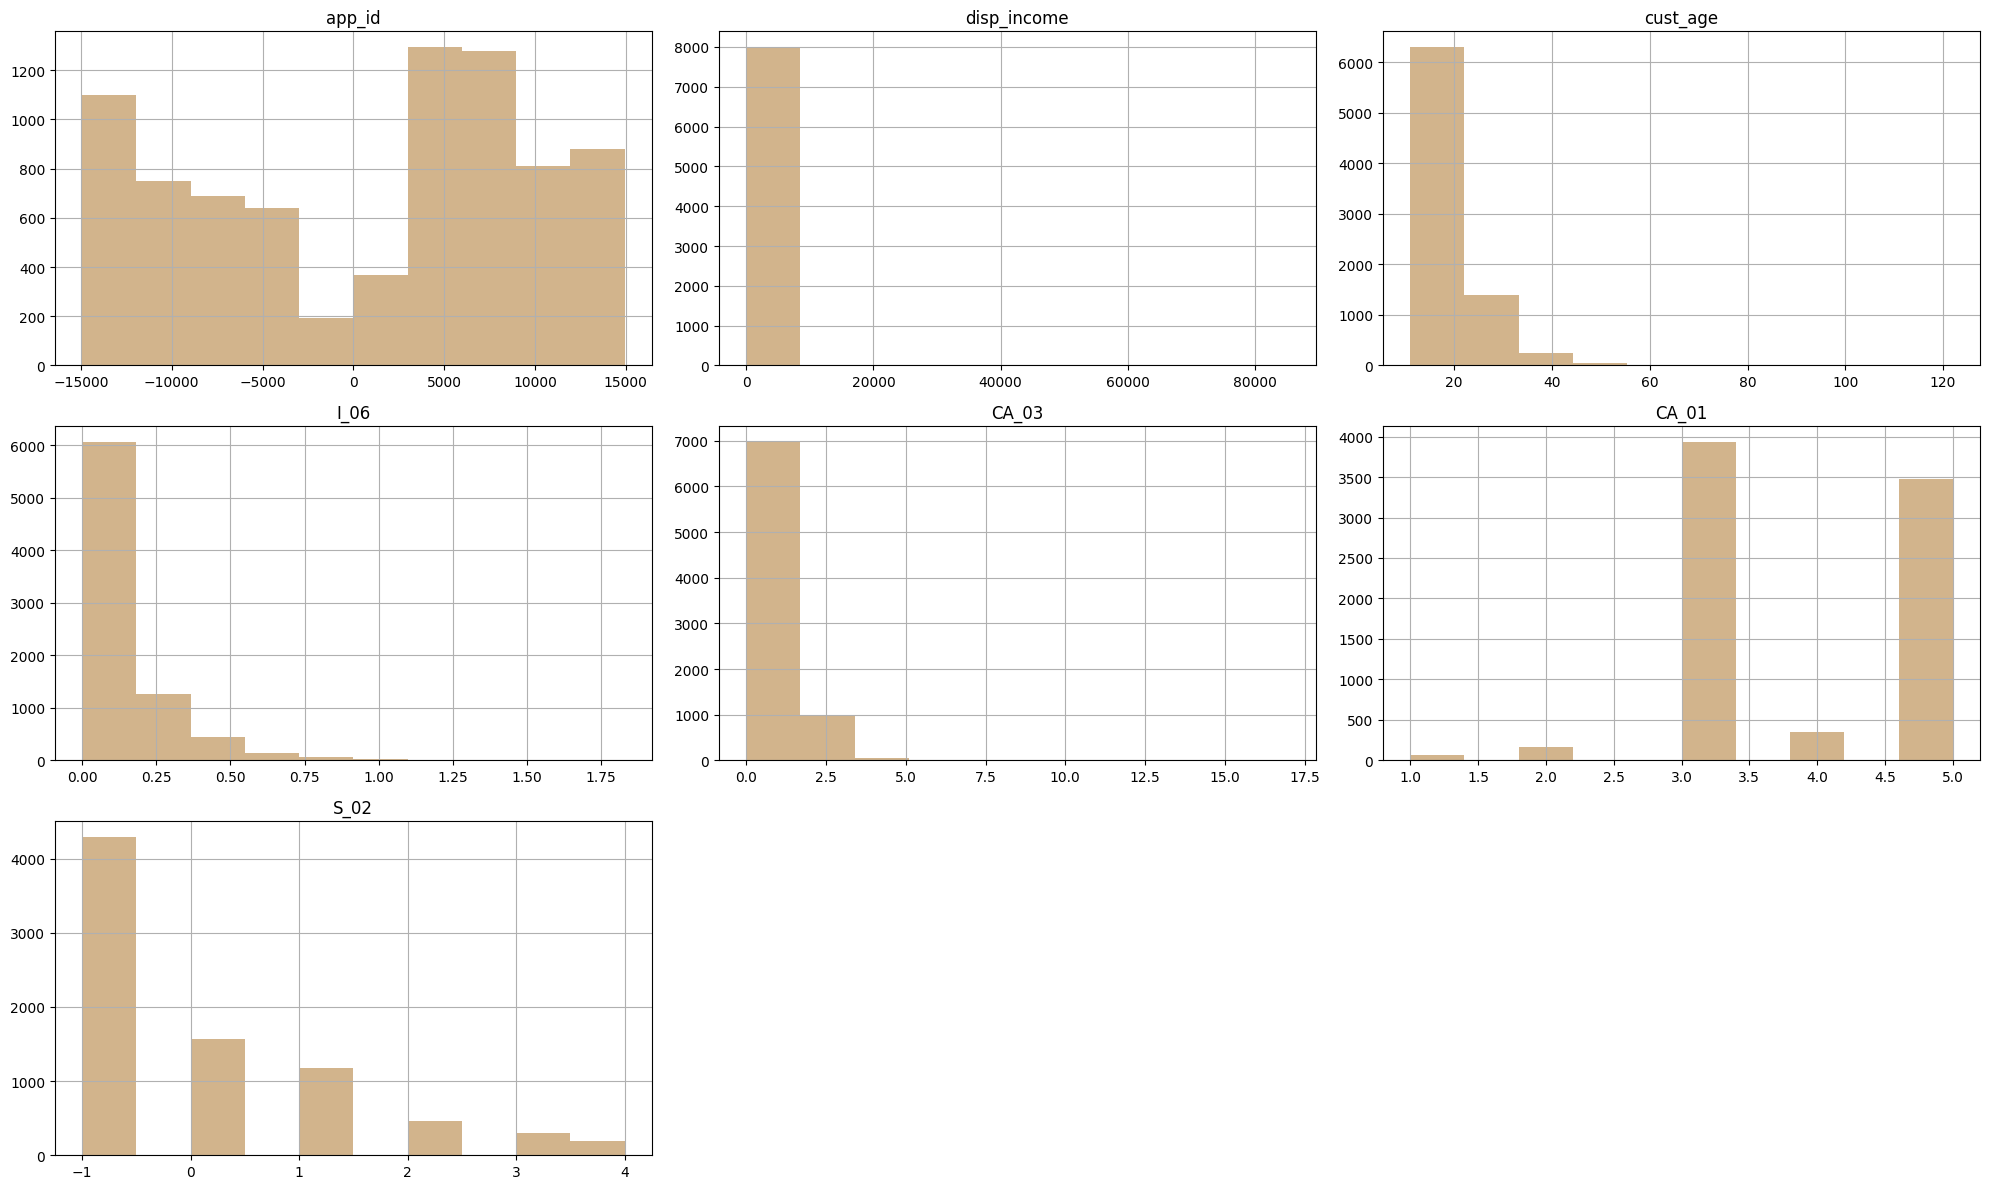

In [7]:
# Check the distributions
df.hist(bins = 10, figsize = (20, 12), color = 'tan')
plt.tight_layout()
plt.show()

In [8]:
# Explore data values distributions in detail
for col in df:
    print((df[col].value_counts().head(10).to_frame().T))
    print('UNIQUE VALUES:', df[col].nunique(dropna = False), '\n')

app_id  -14938  -24     -10     -1551    1559   -1597    1418    1467   \
count        1       1       1       1       1       1       1       1   

app_id   1394    1424   
count        1       1  
UNIQUE VALUES: 7997 

GOOD      .     1     0
count  3368  3048  1581
UNIQUE VALUES: 3 

BAD       .     0     1
count  3368  3048  1581
UNIQUE VALUES: 3 

app_date  27-Jun-20  21-Jun-20  05-Jul-20  11-Jul-20  04-Jul-20  24-Jun-20  \
count           309        305        227        209        203        192   

app_date  22-Jun-20  23-Jun-20  29-Jun-20  28-Jun-20  
count           190        184        182        173  
UNIQUE VALUES: 211 

disp_income  0     1     500   400   2     600   200   300   1000  100 
count        5185  1475   106    82    73    71    70    65    55    54
UNIQUE VALUES: 117 

occ_code    SO   SA   SB   SC   SD   SF   SH   SE   SM   SL
count     2464  879  839  674  438  419  406  394  364  361
UNIQUE VALUES: 15 

cust_age    18    19   20   21   22   23   24   17  

While there are relatively few missing values (concentrated in res_indicator), there is a large number of full stop/period values. These Missing At Random and Missing Not At Random values will be explored and cleaned before modelling.

In [9]:
# Examine the incidence of full stop ('.') values ('fs_values')
fs_value = "."
fs_cols = df.isin([fs_value]).any(axis = 0).sum()
fs_rows = df.isin([fs_value]).any(axis = 1).sum()
print("*" * cw * 3)
print(f"Number of columns with at least one fs_value: {round(fs_cols/len(df.columns)*100, 1)} %")
print(f"Number of rows with at least one fs_value: {round(fs_rows/len(df)*100, 1)} %")
print("*" * cw * 3, '\n')

******************************************************
Number of columns with at least one fs_value: 57.7 %
Number of rows with at least one fs_value: 99.3 %
****************************************************** 



Academic studies have divergent opinions on the elimination of featuers with missing values. While some studies recommend eliminating features with more than 20% missing values, other studies impute values using KNN and more sophisticated to features missing values for 70% of observations.    

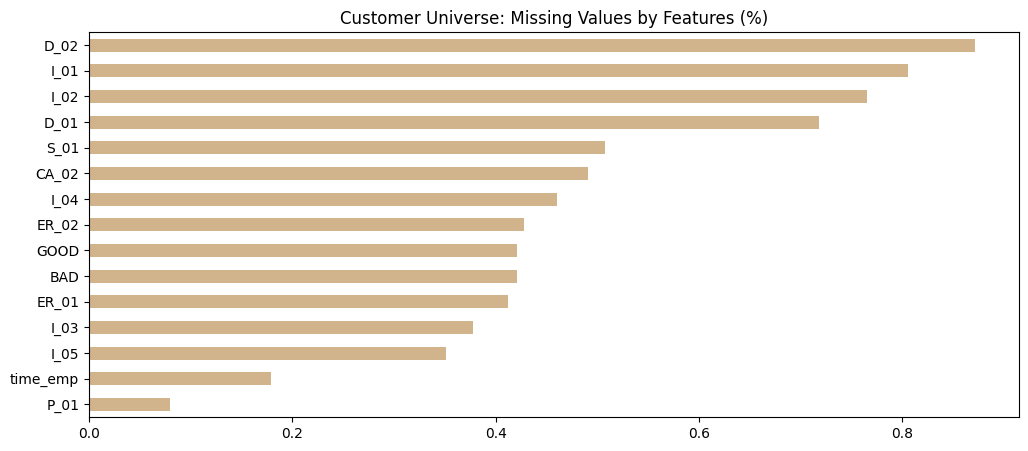

Columns with No FS Values


app_id           0.0
app_date         0.0
occ_code         0.0
disp_income      0.0
cust_age         0.0
res_indicator    0.0
CA_03            0.0
I_06             0.0
S_02             0.0
CA_01            0.0
app_date.1       0.0
dtype: float64

In [10]:
# Visualize the incidence of fs values
fs_values = df.isin([fs_value]).mean(axis = 0).sort_values(ascending = True)
fs_values1 = fs_values[fs_values > 0].sort_values(ascending = True)

plt.figure(figsize = (12, 5))
fs_values1.plot(kind = 'barh', color = 'tan')
plt.title('Customer Universe: Missing Values by Features (%)')
plt.savefig("fs_values.png", format = "png", dpi = 300)
plt.show()

print("Columns with No FS Values")
fs_values0 = fs_values[fs_values == 0].sort_values(ascending = True)
fs_values0

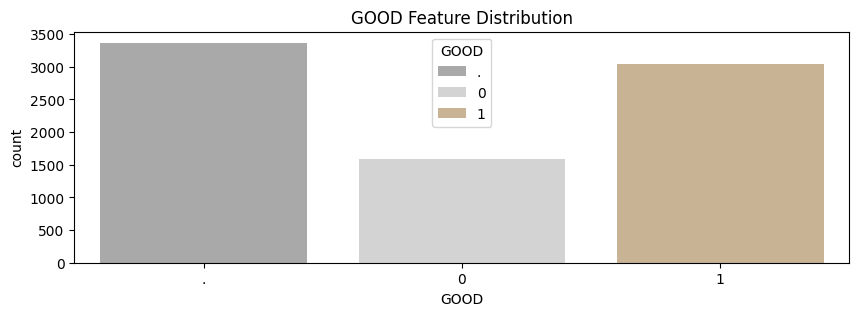

      GOOD      %
GOOD             
.     3368  42.12
1     3048  38.11
0     1581  19.77


In [11]:
# Visualize the customer_status column values
snapshot(df, 'GOOD', colors = fs_colors)

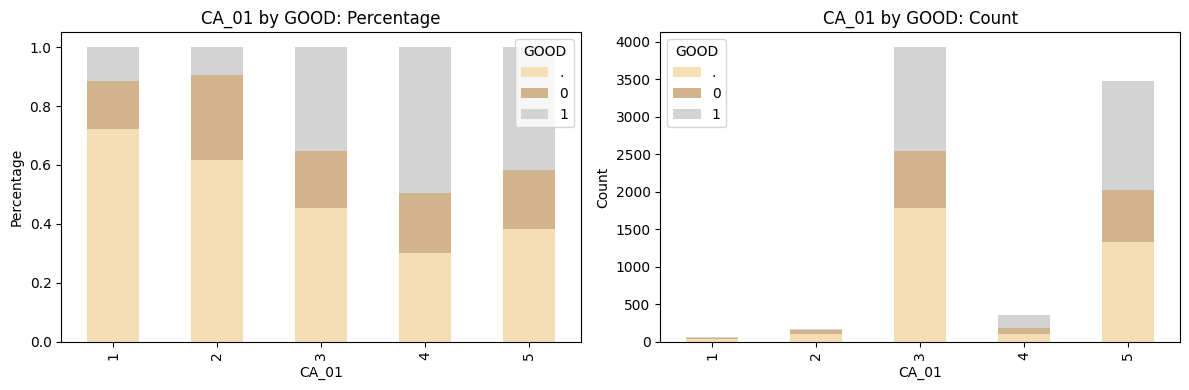

Distribution by CA_01 & GOOD


CA_01                1       2        3      4        5
           GOOD                                        
Count      .     44.00  104.00  1785.00  107.0  1328.00
           0     10.00   49.00   754.00   72.0   696.00
           1      7.00   16.00  1392.00  176.0  1457.00
Normalized .      0.72    0.62     0.45    0.3     0.38
           0      0.16    0.29     0.19    0.2     0.20
           1      0.11    0.09     0.35    0.5     0.42

In [12]:
ct_features(df, 'CA_01', 'GOOD', colors)

Interestingly, the dataset includes delinquency data for unqualified applicants.  This enables modelling using **reject inference**, which can be very effective in improving generalization when combined with semi-supervised models.  To quote:<br>
*Ideally, credit models should be built based on the total population of applicants and applied to new applicants in the real lending process. However in practice, credit modellers only have records of those applicants who pass the credit assessment, and for obvious reasons, the repayment performance of the rejected group is missing. The sample bias in this circumstance essentially becomes a missing data problem.*<br>
_________________________________________________<br>
***Reject inference in credit scoring using Semi-supervised Support Vector Machines***, (2016) Li Zhiyong, Tian Ye, Li Ke, Zhou Fanyin, Yang Wei

Lenders reject a large portion of credit applications and it is expected that the customer_status dateset would have at least 3 unqiue values: <br>
1. **Approved Credit applications: GOOD customers**
2. **Approved Credit applications: BAD customers**
3. **Credit applications not approved**

While this may explain the unknown values in the customer_status column, this is speculation in the absence of confirmation from the bank and it implicitly doesn't explain the unknown values in other columns.<br>
The full stop values ('.', herafter "fs_value") represent cca. 40% of the GOOD values so we are faced with the following problem:<br>
1. **Option 1 - Designate New Value:** Applying these values to our model by attributing them a class value (e.g. throug domain knowledge, we understand that it is reasonable to rename them to 'REJECTED')
2. **Option 2 - Impute Values:** Applying these values to our model by imputing values to '.' using StandardImputer or a more sophisticated imputer e.g. KNN imputater to attribute them to 'GOOD' or 'BAD'.  
3. **Option 3 - Drop Values:** Dropping the full stop '.' values in GOOD/BAD and losing a lot in information in other columns

## 1.5 Preliminary Observations
The dataset is quite noisy and the sparsity of certain features will require careful handling to avoid introducing bias. Specific issues include:
1. MIXED DATA TYPES: Features are not conditionally independent. The presence of categorical and continuous numerical data is a fundamental problem for processing the data e.g. selecting scalers, and developing a predictive model, e.g. 6660 of the 7997 rows are binary 1-0 values while also possessing continuous values of 200 to 85.000. it would be appropriate to review with the client before proceeding.
2. DOT CHRACTER: The dot/full stop character (.) appears in 16 columns, apparently representing different numeric and categorical data. Since this character represents over 50%-90% of values in individual columns, dropping these rows is not feasible without impacting data quality.  Ideally, the client would clarify what values can be attributed e.g. dot character was generated when applicaants selected 'no response' answers on an on-line data entry form.
4. DUPLICATION:  We established that the GOOD / BAD columns are the same values inversely represented so one of these columns can be dropped to improve computational efficiency without compromising results
5. DATA ENTRY ERRORS:  There appears to be some data entry errors for which values should be imputed or the rows dropped e.g. cust_age of 122 years, out of sequence ordinal categorical values including time_emp of 99999, S_01 vlaue of 29 and CA_03 value of '17'
6. DATA BALANCE:  The key target for us is the GOOD client.  Presently, the largest group in the category is unknown and there is a significant imbalance between positive-negative clients (approx 2-1). This will need to be addressed to avoid overfitting a decision tree classifier

From a commecial perspective, the dataset contains no commercial data whatsoever regarding customer revenues and acquisition cost, such that meaning the Lifetime Customer Value cannot be calculated.  This is a critical omission because young customers generate lucrative business for banks including fees and interest revenue from student loans, car loans, home mortgages, pension and investment products etc. such that the lifetime value of young customers for a bank can be orders of magnitude of acquisition cost e.g. in the US, acquisition cost can be $350 and lifetime earning $24,000.  A potential solution is binning applicants according to their postcode – one of the strongest predictors of wealth and health - but this data is also not available (though occupation could be used as a proxy).  Consequently, there is no obvious route to developing a Maximum Profitability credit scoring models that label customers according to define business case.


# 2. Cleaning the Data
__________________________________________________________

### 2.1 Replace GOOD/BAD fs_values & Apply Dictionaries
As the GOOD/BAD columns appear to provide inverse representation of the same data, the temptation is to drop the 'BAD' columns and binarize the GOOD column.  However, for this exercise, Full stop/period values are not approved (rejected) applicants who are grouped with the respective zero class and labelled 'zero' customers in order to create binary columns for both GOOD & BAD customers. Underlying this decision is the assumption that 'BAD' customers were screened by the bank and approved i.e. were 'GOOD' customers before they became 'Bad' customers who failed to use the bank's products, moved to another state, preferred other credit cards etc..  During  feature engineering, merging the non-GOOD and non-BAD classes in new columns to identify predictors for screening GOOD/BAD customers would increase the dimensionality but possible also the richness of the dataset. That said, balancing this with colinearity would be important to avoid arriving at a model that would not generalize well.
<br><br>
Because the dataset is provided with feature codes that are not always informative, applying dictionaries with more meaningful names helps orient and apprehend trends, correlations and non-linear relations between features.

In [13]:
# Make a copy of the datafrome to clean for EDA
df_copy = df.copy()

# Map meaningful names to features from dictionaries
df_copy.rename(columns = cols_dict, inplace = True)
df_copy['occ_code'] = df_copy['occ_code'].map(occupation_dict)
df_copy['delinquency_status'] = df_copy['delinquency_status'].map(delinquency_status_map)
df_copy['GOOD'] = df_copy['GOOD'].map(fs_GOOD_map)
df_copy['BAD'] = df_copy['BAD'].map(fs_BAD_map)

print(df_copy.columns)

Index(['app_id', 'GOOD', 'BAD', 'app_date', 'disposable_income', 'occ_code',
       'cust_age', 'time_employed', 'res_indicator', 'acc_opened_3M',
       'acc_agg_limit', 'acc_most_recent', 'acc_count', 'utility_bill_recent',
       'res_len_hsehld', 'res_len_app', 'acc_count_hsehld', 'cc_balance_total',
       'acc_avg_hsehld', 'avg_cc_count_hsehld', 'cc_search_count_3M',
       'acc_live_count', 'acc_live_balance', 'delinquency_status',
       'cc_search_count_12M', 'app_date.1'],
      dtype='object')


In [14]:
df_copy['GOOD'].value_counts()

GOOD
Rejected    3368
Good        3048
Bad         1581
Name: count, dtype: int64

### 2.2 Date-Time

In [15]:
# Convert 'app_date' to datetime
df_copy['app_date'] = pd.to_datetime(df_copy['app_date'], format = '%d-%b-%y', errors = 'coerce')
df_copy['app_date.1'] = pd.to_datetime(df_copy['app_date.1'], format = '%d/%m/%Y', errors = 'coerce')

# Verify the conversion
print('app_date values:')
print(df_copy['app_date'].notna().sum(), "valid dates")
print(df_copy['app_date'].isna().sum(), "invalid dates")

print('\napp_date.1 values:')
print(df_copy['app_date.1'].notna().sum(), "valid dates")
print(df_copy['app_date.1'].isna().sum(), "invalid dates")


app_date values:
7997 valid dates
0 invalid dates

app_date.1 values:
7997 valid dates
0 invalid dates


### 2.3 Customer Age Outlier
From our histogram, there appears to be some very old customers!

In [16]:
print("Age of Oldest Customer: ", df_copy['cust_age'].max())

Age of Oldest Customer:  122


While we will use a more sophisticated solution when building the pipeline, in order to perform better EDA, we apply a cut-off at 60 years of age.

In [17]:
# The 'cust_age' outliers can be replaced using a age cap or manually
# We will go with an age cap
cut_off_age = 60
df_copy.loc[df_copy['cust_age'] > cut_off_age, 'cust_age'] = cut_off_age
df_copy['cust_age'].describe()

count    7997.000000
mean       21.044767
std         5.072708
min        11.000000
25%        18.000000
50%        19.000000
75%        22.000000
max        60.000000
Name: cust_age, dtype: float64

### 2.4 Cleaning Residential Status
The preliminary analysis showed a significant number of missing values for the residential status attribute.  The missing values could be either dropped or values could be imputed. For this model, we elect the latter approach. In the context of the large number of full stop/period values in other columns, we will use SimpleImputer to impute the most frequent occurring value (in this case, parental residence).   

In [18]:
missing_res_values = df_copy['res_indicator'].isna().sum()/len(df_copy['res_indicator'])
print(f"Residential Status Values missing: {round(missing_res_values*100, 2)} %")

Residential Status Values missing: 7.3 %


Total Residential Items:  7997


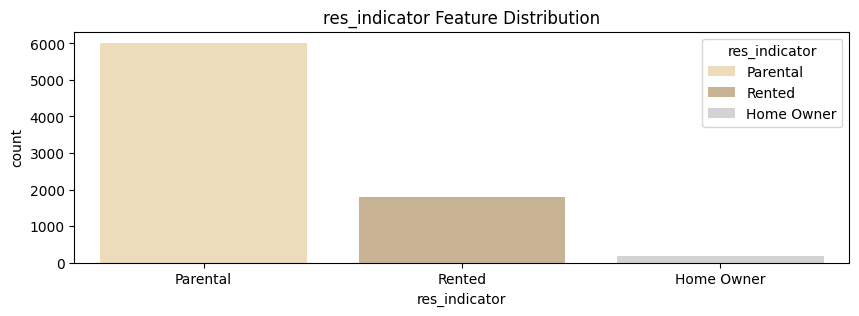

               res_indicator      %
res_indicator                      
Parental                6024  75.33
Rented                  1794  22.43
Home Owner               179   2.24


In [19]:
# NaN's / fs_values  replaced by the cat_attribs transformation
S_imputer = SimpleImputer(strategy = 'most_frequent')
df_copy['res_indicator'] = S_imputer.fit_transform(df_copy[['res_indicator']]).ravel()

# Tidy up names. (i.e. OneHot encoded later)
df_copy['res_indicator'] = df_copy['res_indicator'].replace({'H': 'Home Owner', 'P': 'Parental', 'R': 'Rented'})
print('Total Residential Items: ', len(df_copy['res_indicator']))
snapshot(df_copy, 'res_indicator', colors = colors)

### 2.5 Dot/Period Value Normalization
In the course of the preliminary data exploration, we detect issues with full stop/period values, outliers and data entry errors.  During the data cleaning process, we will create functions which can be subsequently incorporated into the model pipeline. <br>
Certain features have very high percentage of full stops/period string values (>80% all values) and may have to be dropped because including them could distort the model and there is an inadequate percentage of datapoints to confidently impute values using mean/media/k-means approaches.  On a positive note, important predictive attributes including chronology of credit issuance, customer identify/gender, age, dispoable income, occupation and residential status have zero incidence of full stop/period strings.

**Selection of the cut-off for dropping columns with missing values is arbitrary and causes informational loss, so must be very carefully considered as outliers can be detrimental to the performance of credit models. For this exercise, it was subjectively considered that a column which has over 50% missing values risks distorting the model performance and should be dropped. It should be noted that negative inference fuzzy logic imputation models exist which can be used on sparse datasets to input missing values. For details, see:** *Shi, J. and B. Xu (2016). "Credit Scoring by Fuzzy Support Vector Machines with a Novel Membership Function." Journal of Risk and Financial Management 9(4): 13.*

In [20]:
# Check for columns with more than a specfied cut-off value
fs_value_cutoff = 0.5  # Arbitrary cut-off level
fs_cols_over_cutoff = fs_values[fs_values>fs_value_cutoff]

# Check for columns with more than the cut-off value
print(f'Columns to exclude because fs values over {fs_value_cutoff*100} %:')
print("*" * cw * 3)

if len(fs_cols_over_cutoff) > 0:
    print(fs_cols_over_cutoff)
else:
    print('No columns with excessive fs_values')

print("*" * cw * 3, '\n')

Columns to exclude because fs values over 50.0 %:
******************************************************
S_01    0.507440
D_01    0.718019
I_02    0.764912
I_01    0.806052
D_02    0.871327
dtype: float64
****************************************************** 



In [21]:
# Check for rows with fs_values exceeding cutoff
row_missing_values = df_copy.isin([fs_value]).mean(axis = 1)
rows_to_be_excluded = len(row_missing_values[row_missing_values>fs_value_cutoff])
print('Rows with fs_values exceeding cut-off:', rows_to_be_excluded)

Rows with fs_values exceeding cut-off: 0


In [22]:
print("\nFull stop/Period values in Columns (%)\n")
print(fs_cols_over_cutoff)


Full stop/Period values in Columns (%)

S_01    0.507440
D_01    0.718019
I_02    0.764912
I_01    0.806052
D_02    0.871327
dtype: float64


In [23]:
# Define the columns data type
target = ['delinquency_status']
date_attribs = ['app_date', 'app_date.1']
info_attribs = ['app_id']
colinearity_cols = ['BAD']
cat_attribs = ['GOOD', 'BAD', 'occ_code', 'res_indicator']
fs_cols_to_drop = fs_cols_over_cutoff.index.tolist()

# NB. Columns with excessive full stop/period values among those to exlcude
non_num_attribs = target + date_attribs + info_attribs + cat_attribs + fs_cols_to_drop
num_attribs = df_copy.columns.difference(non_num_attribs).tolist()

# Arbitrary metric for ordinal values per column
ordinal_metric = 8
cont_attribs = []
ord_attribs = []
for col in df_copy[num_attribs]:
    if df_copy[col].nunique() > ordinal_metric:
        cont_attribs.append(col)
    else:
        ord_attribs.append(col)


print("Continuous Attributes:", cont_attribs)
print("Ordinal Attributes:", ord_attribs)


Continuous Attributes: ['acc_agg_limit', 'acc_avg_hsehld', 'acc_count', 'acc_count_hsehld', 'acc_live_balance', 'acc_most_recent', 'acc_opened_3M', 'avg_cc_count_hsehld', 'cc_balance_total', 'cc_search_count_3M', 'cust_age', 'disposable_income', 'res_len_app', 'res_len_hsehld', 'time_employed', 'utility_bill_recent']
Ordinal Attributes: ['acc_live_count', 'cc_search_count_12M']


We want to ensure that the attributes are the correct data type, i.e. categorical or informational attributes are object data while ordinal and continuous data are integers and numeric.

In [24]:
# Forcing conversion to numeric converst fs_values to NaN values
df_copy[num_attribs] = df_copy[num_attribs].apply(pd.to_numeric, errors = 'coerce')
df_copy[ord_attribs] = df_copy[ord_attribs].fillna(0).astype(int)

# KNN imputation for continuous attributes
KNN_imputer = KNNImputer(n_neighbors = 3, weights = "uniform")
df_copy.loc[:, cont_attribs] = KNN_imputer.fit_transform(df_copy[cont_attribs])

# Simple imputation for ordinal columns
S_imputer = SimpleImputer(strategy = 'most_frequent')
S_imputed_ordinal_data = S_imputer.fit_transform(df_copy[ord_attribs])
df_copy[ord_attribs] = pd.DataFrame(S_imputed_ordinal_data, columns = ord_attribs, index = df_copy.index)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7997 entries, 0 to 7996
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   app_id               7997 non-null   int64         
 1   GOOD                 7997 non-null   object        
 2   BAD                  7997 non-null   object        
 3   app_date             7997 non-null   datetime64[ns]
 4   disposable_income    7997 non-null   int64         
 5   occ_code             7997 non-null   object        
 6   cust_age             7997 non-null   int64         
 7   time_employed        7997 non-null   float64       
 8   res_indicator        7997 non-null   object        
 9   acc_opened_3M        7997 non-null   float64       
 10  acc_agg_limit        7997 non-null   float64       
 11  acc_most_recent      7997 non-null   float64       
 12  acc_count            7997 non-null   float64       
 13  utility_bill_recent  7997 non-nul

## 2.6 Extreme Values & Outliers

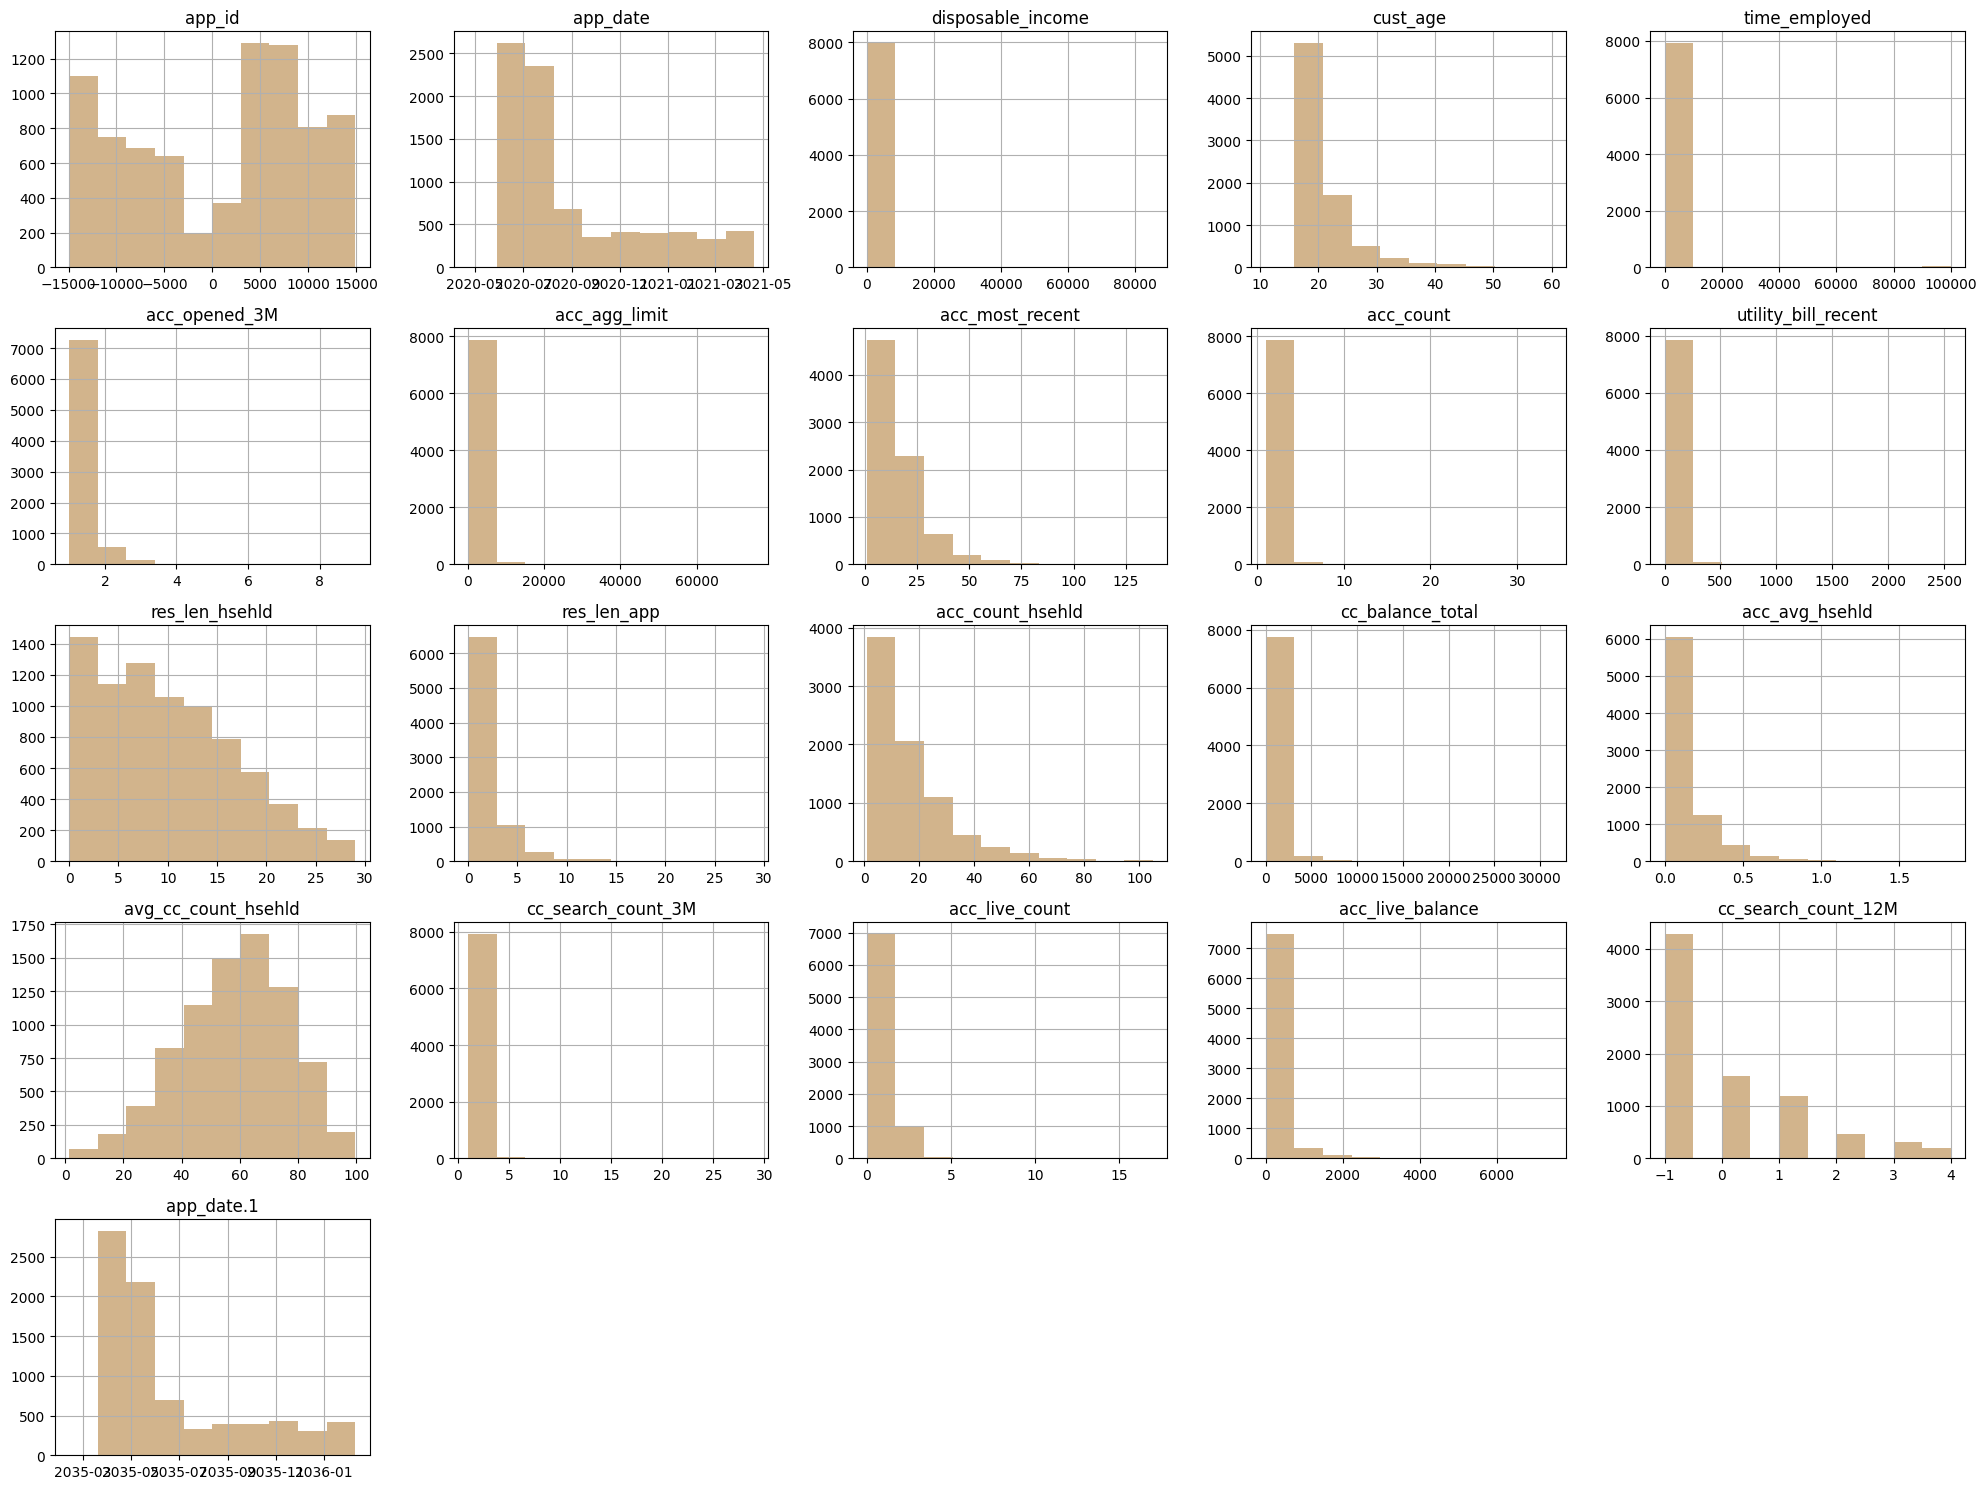

In [26]:
# Check if the full stop/period values have been resolved
df_copy.hist(bins = 10, figsize = (20, 15), color = 'tan')
plt.tight_layout()
plt.show()

### 2.6.1 Feature Skewness and Kurtosis
The attributes demonstrate skewness and kurtosis.  While extreme values may be valid and should be included in the model, outliers will bias the model so identifying and resolving these should improve the generalization of the selected model to new data.  There are two principal options for dealing with these:<br>
1. **Outlier Elimination**:  We can apply limits on the statistical deviation of data points from a mean value.  However, for features which have correctly recorded extreme values, the informational gain is lost.  Also, such an approach may be superfluous if the contemplated solutino is a tree-based model, since these are quite effective for dealing with outliers.
2. **Discretizing Columns**:  Binning values is a computationally efficient approach which is useful when dealing with sparse data due to a large number of missing values but sacrifices informational gain which may be important for calibrating logreg models.<br>
Both approaches address the problem of ensuring that imputed data will not be distorted by outliers.    

In [27]:
# Quantify the skeness & kurtosis for continuous features
print(f"{'Shape of Distribution' :<{cw*2}}{'Skewness':>{cw}}{'Kurtosis':>{cw}}")
print(f"{'' :<{cw*2}}{'Normal = 0':>{cw}}{'Normal = 3':>{cw}}")
print("*" * cw * 4)
for col in cont_attribs:
    print(f"{col :<{cw*2}}{df_copy[col].skew().round(1):>{cw}}{df_copy[col].kurtosis().round(1):>{cw}}")
print("*" * cw * 4)

kurtosis_ranking = df_copy[cont_attribs].kurtosis().nlargest(5)
kurtosis_cols_for_iqr = kurtosis_ranking.index.tolist()
print("Extreme Kurtosis Candidates for IQR: ", kurtosis_cols_for_iqr)

Shape of Distribution                         Skewness          Kurtosis
                                            Normal = 0        Normal = 3
************************************************************************
acc_agg_limit                                     13.6             378.0
acc_avg_hsehld                                     2.5              10.2
acc_count                                          9.7             176.3
acc_count_hsehld                                   2.0               5.6
acc_live_balance                                   6.0              58.8
acc_most_recent                                    2.2               8.6
acc_opened_3M                                      5.0              46.8
avg_cc_count_hsehld                               -0.3              -0.2
cc_balance_total                                   7.6             114.2
cc_search_count_3M                                13.8             559.6
cust_age                                           

______________________________________

### 2.6.2 Elimimating Outliers
Eliminating outliers is always challenging because of the elevated risk of losing important non-linear information which would otherwise enhance the performance of individual models, especially if eliminating outliers could eliminate members of the minority class in an imbalanced dataset. Since the minority class in a credit scoring dataset is 2%-4% of observations, eliminating outliers is especially risky and other strategies may get better results e.g. binning and/or feature engineering.

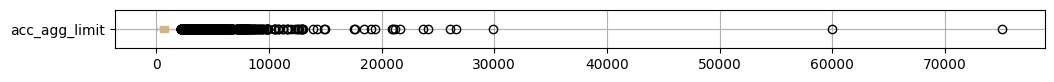

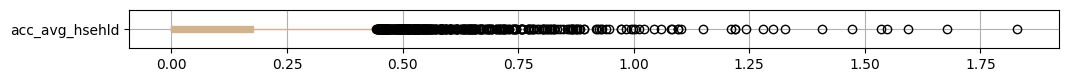

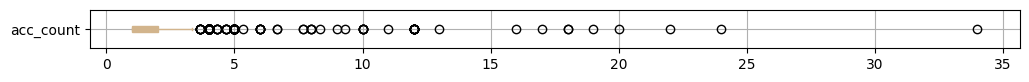

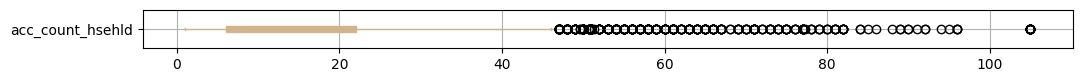

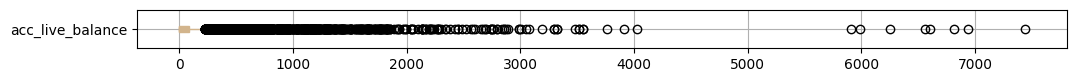

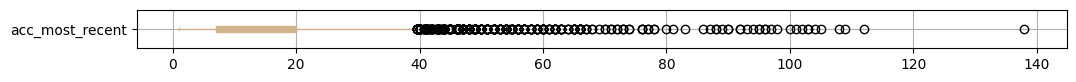

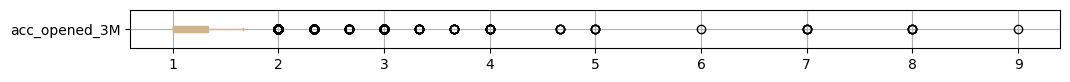

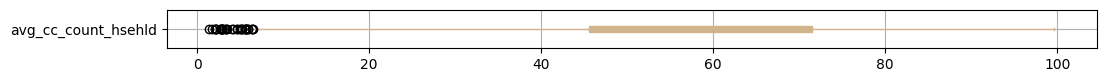

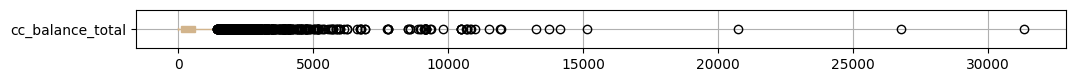

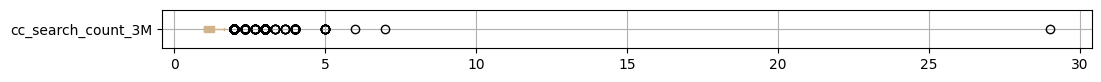

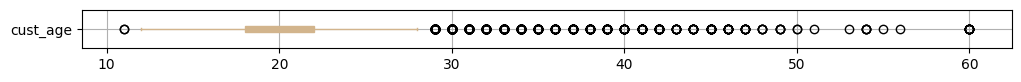

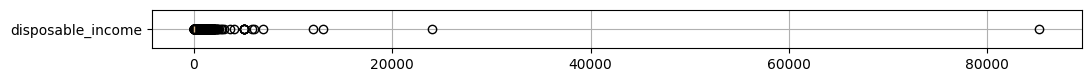

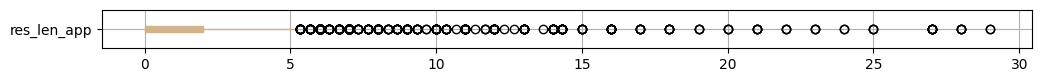

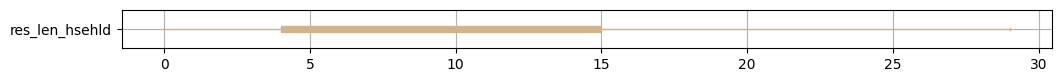

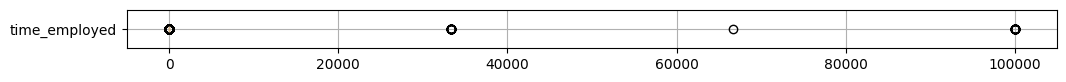

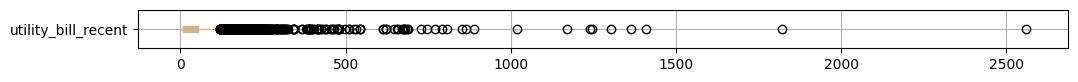

In [28]:
# We can visualize the distribution of outliers
for attrib in cont_attribs:
    plt.figure(figsize = (12, 0.5))
    df_copy.boxplot(column = attrib, vert = False, patch_artist = True, color = 'tan')
    plt.show()

_________________________________________

**IQR method to identify outliers - Functions to be used later in custom transformer**


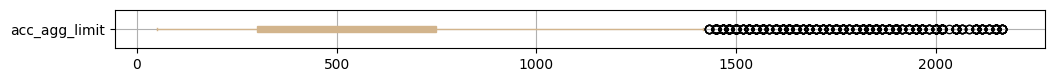

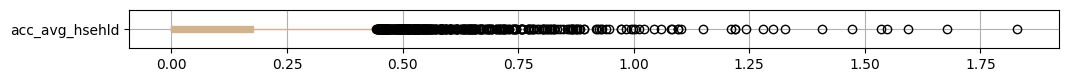

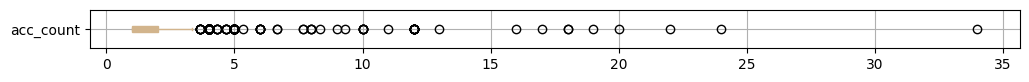

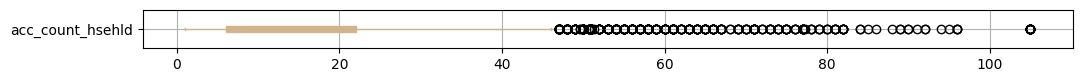

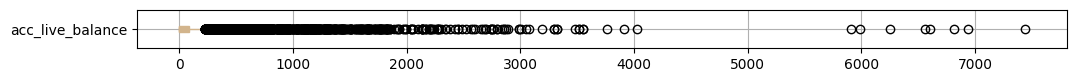

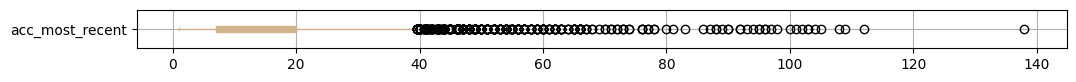

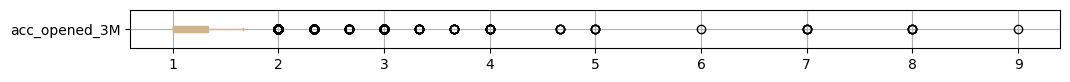

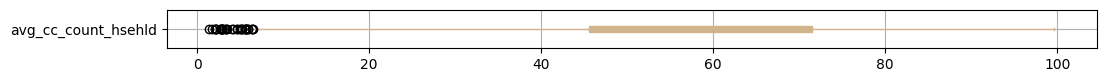

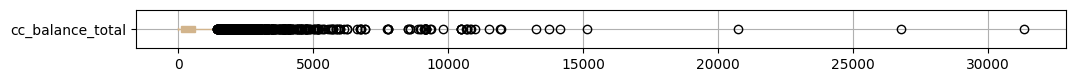

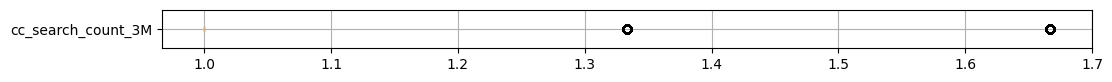

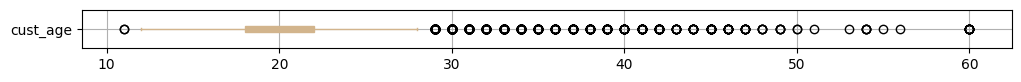

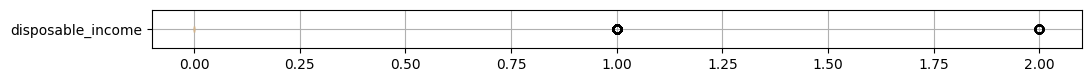

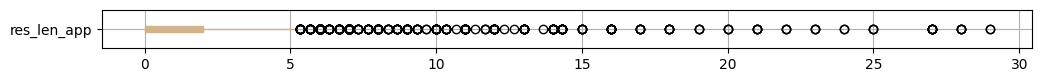

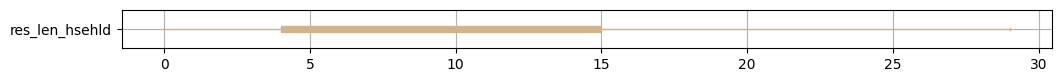

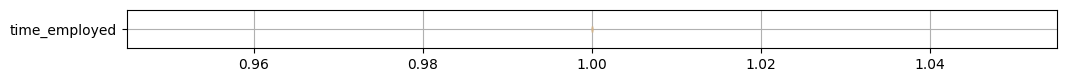

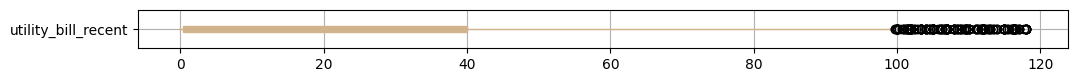

Shape of Distribution                         Skewness          Kurtosis
                                            Normal = 0        Normal = 3
************************************************************************
acc_agg_limit                                      1.5               1.7
acc_avg_hsehld                                     2.5              10.2
acc_count                                          9.7             176.3
acc_count_hsehld                                   2.0               5.6
acc_live_balance                                   6.0              58.8
acc_most_recent                                    2.2               8.6
acc_opened_3M                                      5.0              46.8
avg_cc_count_hsehld                               -0.3              -0.2
cc_balance_total                                   7.6             114.2
cc_search_count_3M                                 2.3               4.2
cust_age                                           

In [29]:
# Kurotsis-based outlier elimination
outlier_excluded_df = df_copy.copy()
outlier_excluded_kurtosis_ranking = outlier_excluded_df[cont_attribs].kurtosis().nlargest(5)
outlier_excluded_kurtosis_cols_for_iqr = outlier_excluded_kurtosis_ranking.index.tolist()

def iqr_outliers(cols):
    Q1 = cols.quantile(0.25)
    Q3 = cols.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return (cols < lower_bound) | (cols > upper_bound)

# Replace outliers with'most frequent' values
for col in outlier_excluded_kurtosis_cols_for_iqr:
    outliers = iqr_outliers(outlier_excluded_df[col])
    mode = outlier_excluded_df[col].mode()[0]
    outlier_excluded_df.loc[outliers, col] = mode


# We can visualize the distribution of outliers
for attrib in cont_attribs:
    plt.figure(figsize = (12, 0.5))
    outlier_excluded_df.boxplot(column = attrib, vert = False, patch_artist = True, color = 'tan')
    plt.show()

# Quantify the skeness & kurtosis for columns
print(f"{'Shape of Distribution' :<{cw*2}}{'Skewness':>{cw}}{'Kurtosis':>{cw}}")
print(f"{'' :<{cw*2}}{'Normal = 0':>{cw}}{'Normal = 3':>{cw}}")
print("*" * cw * 4)
for col in cont_attribs:
    print(f"{col :<{cw*2}}{outlier_excluded_df[col].skew().round(1):>{cw}}{outlier_excluded_df[col].kurtosis().round(1):>{cw}}")
print("*" * cw * 4)

Removing outliers has improved the skewness exhibited by the dataset features, though kurtosis is still a problem and certain features still demonstrate extreme kurtosis (e.g. number of accounts, credit card balance).  

## 2.7 Review Dataset Statistics
Having cleaned the data, we check the dataset statistics before proceeding to EDA

In [30]:
# Check statistics
df_copy.describe().T

count                           mean  \
app_id               7997.0                     673.068401   
app_date               7997  2020-08-30 00:45:55.033137408   
disposable_income    7997.0                     113.673628   
cust_age             7997.0                      21.044767   
time_employed        7997.0                     467.919053   
acc_opened_3M        7997.0                       1.236047   
acc_agg_limit        7997.0                    1064.982702   
acc_most_recent      7997.0                      15.266642   
acc_count            7997.0                       1.556792   
utility_bill_recent  7997.0                      44.751532   
res_len_hsehld       7997.0                       9.948397   
res_len_app          7997.0                        1.67667   
acc_count_hsehld     7997.0                      16.596015   
cc_balance_total     7997.0                     634.061523   
acc_avg_hsehld       7997.0                       0.121018   
avg_cc_count_hsehld  7997.0                      58.097102   
cc_search_count_3M   7997.0                       1.275478   
acc_live_count       7997.0                       0.678504   
acc_live_balance     7997.0                     158.146513   
cc_search_count_12M  7997.0                      -0.062899   
app_date.1             7997  2035-06-20 11:55:13.692634624   

                                     min                  25%  \
app_id                          -14943.0              -8251.0   
app_date             2020-04-22 00:00:00  2020-06-28 00:00:00   
disposable_income                    0.0                  0.0   
cust_age                            11.0                 18.0   
time_employed                        0.0                  1.0   
acc_opened_3M                        1.0                  1.0   
acc_agg_limit                       50.0                300.0   
acc_most_recent                      1.0                  7.0   
acc_count                            1.0                  1.0   
utility_bill_recent                  0.0                  7.0   
res_len_hsehld                       0.0                  4.0   
res_len_app                          0.0                  0.0   
acc_count_hsehld                     1.0                  6.0   
cc_balance_total                     0.0           103.333333   
acc_avg_hsehld                       0.0                  0.0   
avg_cc_count_hsehld              1.39209            45.546875   
cc_search_count_3M                   1.0                  1.0   
acc_live_count                       0.0                  0.0   
acc_live_balance                     0.0                  0.0   
cc_search_count_12M                 -1.0                 -1.0   
app_date.1           2035-02-12 00:00:00  2035-04-18 00:00:00   

                                     50%                  75%  \
app_id                            3708.0               8249.0   
app_date             2020-07-14 00:00:00  2020-10-14 00:00:00   
disposable_income                    0.0                  1.0   
cust_age                            19.0                 22.0   
time_employed                        1.0                  1.0   
acc_opened_3M                        1.0             1.333333   
acc_agg_limit                 516.666667               1050.0   
acc_most_recent                     12.0                 20.0   
acc_count                       1.333333                  2.0   
utility_bill_recent                 25.0            51.666667   
res_len_hsehld                       9.0                 15.0   
res_len_app                          1.0                  2.0   
acc_count_hsehld                    12.0                 22.0   
cc_balance_total                   238.0           641.666667   
acc_avg_hsehld                   0.05695              0.17692   
avg_cc_count_hsehld            59.640625            71.484375   
cc_search_count_3M                   1.0             1.333333   
acc_live_count                       1.0                

Checking the medians to compare to means can suggest features which require focus during EDA.

In [31]:
numeric_cols = df_copy.select_dtypes(include = ['number']).columns
median_values = df_copy[numeric_cols].median()

print("Median Values of Numeric Features:")
print(round(median_values))

Median Values of Numeric Features:
app_id                 3708.0
disposable_income         0.0
cust_age                 19.0
time_employed             1.0
acc_opened_3M             1.0
acc_agg_limit           517.0
acc_most_recent          12.0
acc_count                 1.0
utility_bill_recent      25.0
res_len_hsehld            9.0
res_len_app               1.0
acc_count_hsehld         12.0
cc_balance_total        238.0
acc_avg_hsehld            0.0
avg_cc_count_hsehld      60.0
cc_search_count_3M        1.0
acc_live_count            1.0
acc_live_balance          0.0
cc_search_count_12M      -1.0
dtype: float64


___________________________________________________

# 3. EDA
________________________________________________

## 3.1 Delinquency & Expected Maximum Cost
The deliquency data in feature delinquency_status is among the features not impacted by full stop/periods strings.  The Expected Maximum Cost informs in regard to the exposure of XYZ Bank do financial loss from the delinquent customers.

### 3.1.1  Delinquency

In [32]:
print("DELINQUENCY DISTRIBUTION:")
df_copy['delinquency_status'].value_counts().rename(index = delinquency_status_map)

DELINQUENCY DISTRIBUTION:


delinquency_status
Payments current             3931
Data missing: Unqualified    3481
Data missing: Address         355
1-2 months overdue            169
3-6 months overdue             61
Name: count, dtype: int64

In [33]:
# Group by cohort and compute mean of financial indicators
delinquency_means = df_copy.groupby('delinquency_status')[['cc_balance_total', 'acc_agg_limit', 'acc_live_balance']].mean()

# Display results
print("DELINQUENCY DISTRIBUTION – AVERAGE METRICS:")
delinquency_means

DELINQUENCY DISTRIBUTION – AVERAGE METRICS:


cc_balance_total  acc_agg_limit  acc_live_balance
delinquency_status                                                          
1-2 months overdue               560.607495     984.418146        340.025641
3-6 months overdue               764.054645    1103.005464        219.590164
Data missing: Address            642.233803    1396.150235        256.525822
Data missing: Unqualified        573.128124     995.686106        140.175141
Payments current                 688.422284    1099.313152        156.403460

The objective is to identify delinquency risk but we can see that the incidence of deliquency appears low (< 4%).  The bank data includes a column showing 'GOOD' clients - persumably clients which the bank wishes to cultivate due their customer profile - which we can cross-tabulate against the aggregated delinquency categories.

In [34]:
df_copy['delinquency_status'].value_counts(normalize = True) * 100

delinquency_status
Payments current             49.155933
Data missing: Unqualified    43.528823
Data missing: Address         4.439165
1-2 months overdue            2.113292
3-6 months overdue            0.762786
Name: proportion, dtype: float64

**It should be noted that the US Federal Reserve reports average delinquency rates of 1%-3% in the US, so with 2.8% of loans in dafault (over 30 days in arrears), XYZ Bank is experiencing normal delinquency rates which would not normally threaten the solvency of the institution.**<br>
For further details, see:
https://fred.stlouisfed.org/series/DRCCLACBS

In [35]:
# As delinquency_status is the target column, we will binarize
df_copy['delinquency_status'] = df['CA_01'].apply(lambda x: 0 if x > 2 else 1)
df_copy['delinquency_status'].value_counts(normalize = True) * 100

delinquency_status
0    97.123921
1     2.876079
Name: proportion, dtype: float64

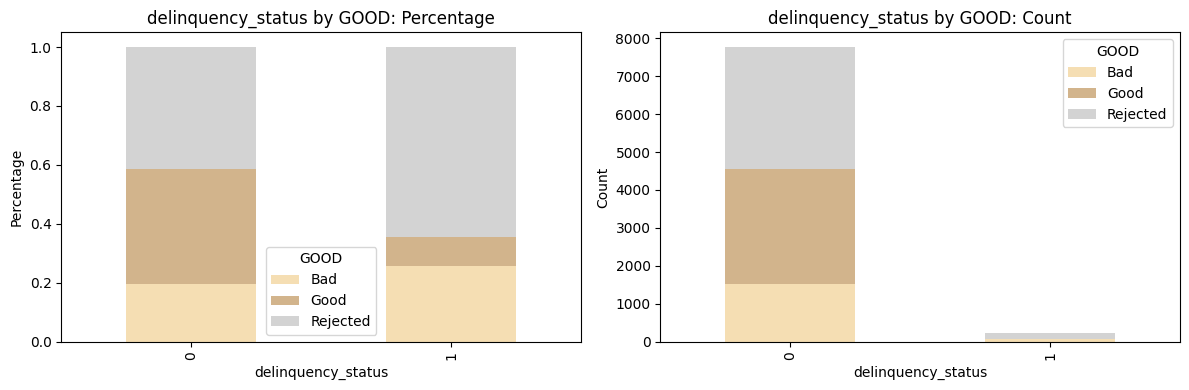

Distribution by delinquency_status & GOOD


delinquency_status         0       1
           GOOD                     
Count      Bad       1522.00   59.00
           Good      3025.00   23.00
           Rejected  3220.00  148.00
Normalized Bad          0.20    0.26
           Good         0.39    0.10
           Rejected     0.41    0.64

In [36]:
ct_features(df_copy, 'delinquency_status', 'GOOD', colors)

In [37]:
# Group by cohort and compute mean of financial indicators
delinquency_means_binary = df_copy.groupby('delinquency_status')[['cc_balance_total', 'acc_agg_limit', 'acc_live_balance']].mean()

# Display results
print("DELINQUENCY DISTRIBUTION – AVERAGE METRICS:")
delinquency_means_binary

DELINQUENCY DISTRIBUTION – AVERAGE METRICS:


cc_balance_total  acc_agg_limit  acc_live_balance
delinquency_status                                                   
0                         634.638857    1066.437063        153.706493
1                         614.565217    1015.869565        308.084058

We note the similarity in average credit card balances and limits for delinquent and performing customers.  Paradoxically, the average account balance of delinquent customers is almost 100% higher among the minority class delinquent customers.

### 3.1.2  Maximum Loss Value

As well as looking at the universe of potential customers by including all the data from applicants, it can provide a glimpse of the profit drivers for the bank by drilling down to the customer portfolio of the bank in order to gain an idea of the potential financial cost of delinquencies to the bank. This first step is focusing only on customers, not rejected applicants, looking at the qualities of GOOD and BAD customers, then delinquent customers.  While it is intuitive that a delinquent customer would be a BAD customer, it should be kept in mind that the delinquency status looks back 6 months, so delinquency could have been cured by GOOD customers in that period or subsequently.

In [38]:
# Check how many delinquencies occured in portfolio
EMC_df = df.copy()
EMC_df.rename(columns = cols_dict, inplace = True)
EMC_df['delinquency_status'].value_counts()

delinquency_status
3    3931
5    3481
4     355
2     169
1      61
Name: count, dtype: int64

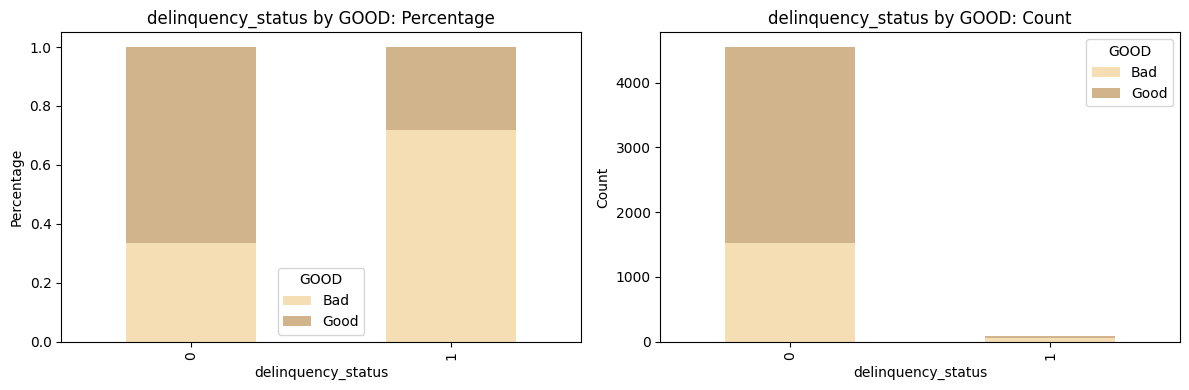

Distribution by delinquency_status & GOOD


delinquency_status        0      1
           GOOD                   
Count      Bad      1522.00  59.00
           Good     3025.00  23.00
Normalized Bad         0.33   0.72
           Good        0.67   0.28

In [39]:
EMC_df['GOOD'] = EMC_df['GOOD'].map(fs_GOOD_map)
EMC_df = EMC_df.drop(EMC_df[EMC_df['GOOD'] == 'Rejected'].index).copy()
EMC_df['delinquency_status'] = EMC_df['delinquency_status'].apply(lambda x: 0 if x > 2 else 1)
ct_features(EMC_df, 'delinquency_status', 'GOOD', colors)

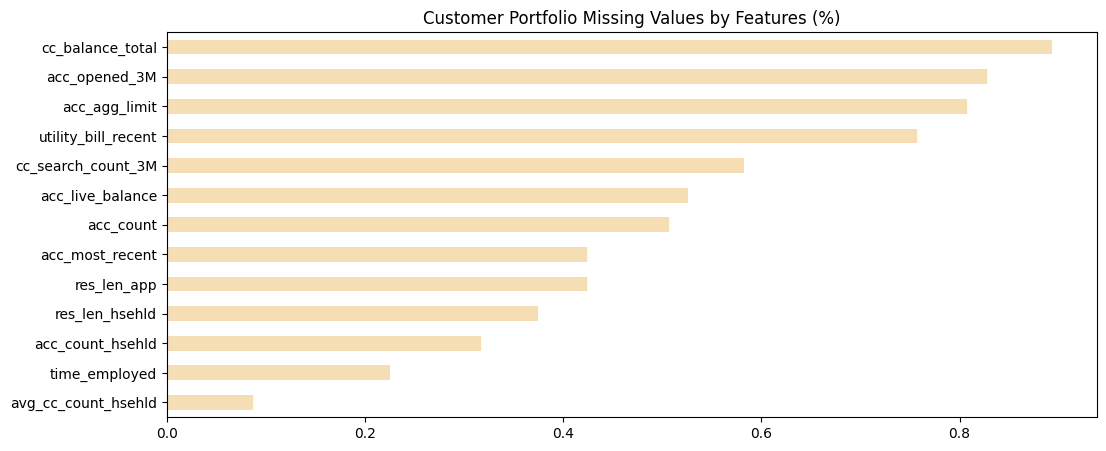

Columns with No FS Values


app_id                 0.0
GOOD                   0.0
BAD                    0.0
app_date               0.0
disposable_income      0.0
occ_code               0.0
cust_age               0.0
res_indicator          0.0
cc_search_count_12M    0.0
delinquency_status     0.0
acc_live_count         0.0
app_date.1             0.0
acc_avg_hsehld         0.0
dtype: float64

In [40]:
# Visualize the incidence of fs values
EMC_fs_values = EMC_df.isin([fs_value]).mean(axis = 0).sort_values(ascending = True)

EMC_fs_values1 = EMC_fs_values[EMC_fs_values > 0].sort_values(ascending = True)

plt.figure(figsize = (12, 5))
EMC_fs_values1.plot(kind = 'barh', color = 'wheat')
plt.title('Customer Portfolio Missing Values by Features (%)')
plt.show()

print("Columns with No FS Values")
EMC_fs_values0 = EMC_fs_values[EMC_fs_values == 0].sort_values(ascending = True)
EMC_fs_values0

It goes without saying that the absense of cca. 90% of the credit card balances means we cannot confidently estimate the portfolio financial performance.

In [41]:
EMC_df_copy = EMC_df.copy()
EMC_df_copy = EMC_df_copy.drop('app_id', axis = 1)

good_medians = EMC_df_copy[EMC_df_copy['GOOD'] == 'Good'].median(numeric_only = True).round(2)
bad_medians = EMC_df_copy[EMC_df_copy['GOOD'] == 'Bad'].median(numeric_only = True).round(2)
delinquent_medians = EMC_df_copy[EMC_df_copy['delinquency_status'] == 1].median(numeric_only = True).round(1)
cust_medians = pd.DataFrame({'GODD Median values': good_medians, 'BAD Median values': bad_medians, 'Delinquent Median values': delinquent_medians})
cust_medians

GODD Median values  BAD Median values  \
disposable_income                  0.00               0.00   
cust_age                          19.00              19.00   
acc_avg_hsehld                     0.03               0.08   
acc_live_count                     0.00               0.00   
delinquency_status                 0.00               0.00   
cc_search_count_12M               -1.00              -1.00   

                     Delinquent Median values  
disposable_income                         0.0  
cust_age                                 20.0  
acc_avg_hsehld                            0.1  
acc_live_count                            1.0  
delinquency_status                        1.0  
cc_search_count_12M                       0.0

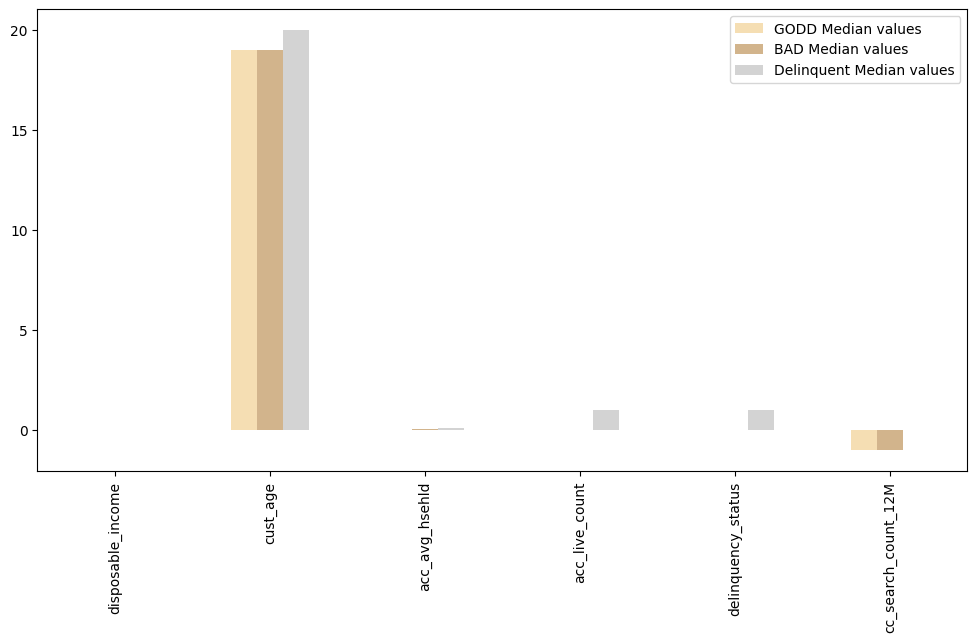

In [42]:
# cust_medians_viz = cust_medians.drop('app_id', axis = 1)
cust_medians.plot(kind = 'bar', figsize = (12, 6), color = colors)
plt.show()

For most financial indicators, the BAD customers have slightly higher e.g. current account balances, credit limits, utility bulls etc. This is consistent with the BAD cohort having a larger sub-population of older customers. For delinquent customers, we note that the median limit is significantly higher than GOOD customers and the current account balance is at zero i.e. no funds presently available to re-pay the credit card, but the median balance of GOOD customers is higher than both BAD and GOOD/BAD delinquent customers, strongly indicating that GOOD customers use their credit cards very actively and this is paid off from parental transfers. We also note that GOOD customers have opened more accounts in the past 3 months than BAD customers, creating new revenues streams for XYZ bank.

We should also drill down on the bank's exposure to financial loss on the delinquent customers. As we note from the 'Medians' analysis, a key indicator for this is the customer's current account balance is less than the credit card balance. Where the current account balance exceeds the credit card balance, the customer's ability to re-pay the credit card is axiomatically better than where the opposite is true.

In [43]:
EMC_df[num_attribs] = EMC_df[num_attribs].apply(pd.to_numeric, errors = 'coerce')
aggregation_results = EMC_df.groupby('delinquency_status')[['acc_live_balance', 'cc_balance_total']].sum()
portfolio_exposure = EMC_df[['acc_live_balance', 'cc_balance_total']].sum()
delinquency_exposure = (aggregation_results.loc[1] / portfolio_exposure)
combined_df = pd.DataFrame({
    'Total Portfolio Exposure': portfolio_exposure,
    'Delinquency Exposure': aggregation_results.loc[1],
    'Delinquency Exposure as % Total': (portfolio_exposure/aggregation_results.loc[1]),
    'Charge Rate': delinquency_exposure
}).round(2).T

combined_df

acc_live_balance  cc_balance_total
Total Portfolio Exposure                269332.00         314630.00
Delinquency Exposure                     15071.00           5147.00
Delinquency Exposure as % Total             17.87             61.13
Charge Rate                                  0.06              0.02

The delinquency exposure on credits in absolute terms is 5,147 of credit exposure of 314,630 total credit exposure, but with current accounts for exposed customers totalling 15071, . <br>
From this analysis, we see that, universally, applicants not classed as 'GOOD' customers represent 60% of the applicants, they represent 75% of the credit defaults.  In this regard, clients classed as GOOD have a signifcantly better payment morale (or young customer benefit from legally binding or informal parent gaurantees).<br>
That said, it appears that 35% of approved customers default yet retain their 'GOOD' status, stongly indicating that the financial cost of delinquency is less than the livetime income potential for the customer, which makes sense in the context of the relatively modest credit limits compared to banking fees from mortage lending, car financing and unviersity loans.<br>
Since the median age of customers is 18 and they live with their parents, delinquencies which results in write-offs are probably less frequent than generic credit portfolios. Further, XYZ Bank's charge-off rates - which usually exceed the value of deqlinquent credits because of interest and collection costs - are probably less than the delinquency rate and, depending on the contractual penalties, could even be negative. <br>
In this situation, the opportunity cost to XYZ bank of losing apotential customer materially exceeds the loss accruing to a Type 1 credit scoring error, so instead of evaluating the models on achieving true negatives, we may evaluate the models on false prositives where the goal is to calibrate the model to avoid rejecting GOOD customers.<br>
However, the purpose of this assignment is to predict the incidence of default and since default customers represent only 3.0% of all customers and less than 2% of the bank portfolio i.e. the banks credit portfolio is over 98% performing. <br>
Dealing with this severe imbalance in the delinquency_status classes will need to be addressed before modelling and there are resampling approaches to deal with this which we will shortly explore.

In [44]:
# Calculate probability of default
default_custs = (EMC_df['delinquency_status'] == 1).mean().round(4)
print(f"Default rate for customer portfolio: {default_custs}")

# Calculate **total** credit card balance for defaulted customers
total_cc_balance_defaulted = EMC_df.loc[EMC_df['delinquency_status'] == 1, 'cc_balance_total'].sum()

# Calculate financial quantum of default rate
financial_quantum_default = (total_cc_balance_defaulted / EMC_df['cc_balance_total'].sum()).round(4)

# Print the result
print(f"Financial Quantum of Default Rate (based on cc_balance_total): {financial_quantum_default}")

# Calculate Loss Givene Default ('LGD'), the percentage of credit exposure
# that the bank expects to lose in event of default.
LGD = 1.2  # Federal Reserve data

# Calculate Exposure at Default ('EAD'), total outstanding balance at default
# Cost of misclassification
print(f"Expected Maximum Loss: {(financial_quantum_default*LGD*100).round(2)} % of total portfolio credit balance")

Default rate for customer portfolio: 0.0177
Financial Quantum of Default Rate (based on cc_balance_total): 0.0164
Expected Maximum Loss: 1.97 % of total portfolio credit balance


## 3.3 Timescale of Customer Acquisition
Before digging into the categorical data, it is useful to understand the chronologoy of when the credits were issued in order to identify consistency in distribution, seasonal or other patterns.  Understanding the chronology allows more nuanced evaluation of the credit portfolio and forecasting future performance by incorporating macroeconomic credit modelling predictors provided to credit card companies by central banks<br>
<br>
Reference: https://www.federalreserve.gov/econres/notes/feds-notes/predicting-credit-card-delinquency-rates-20250228.html).

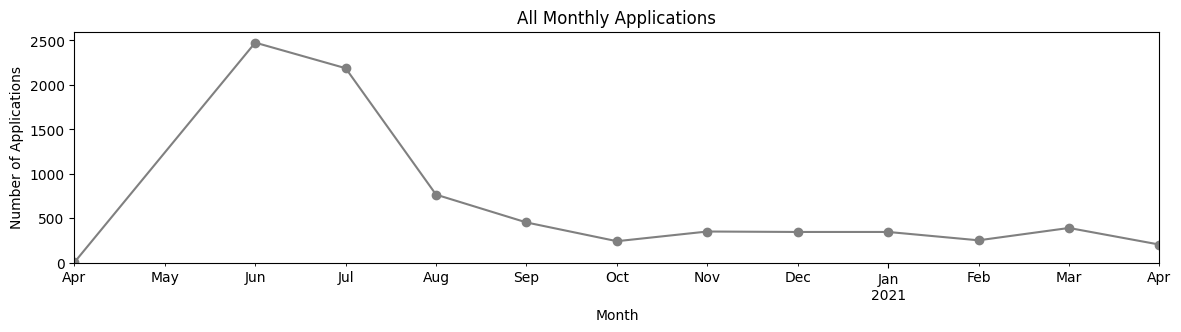

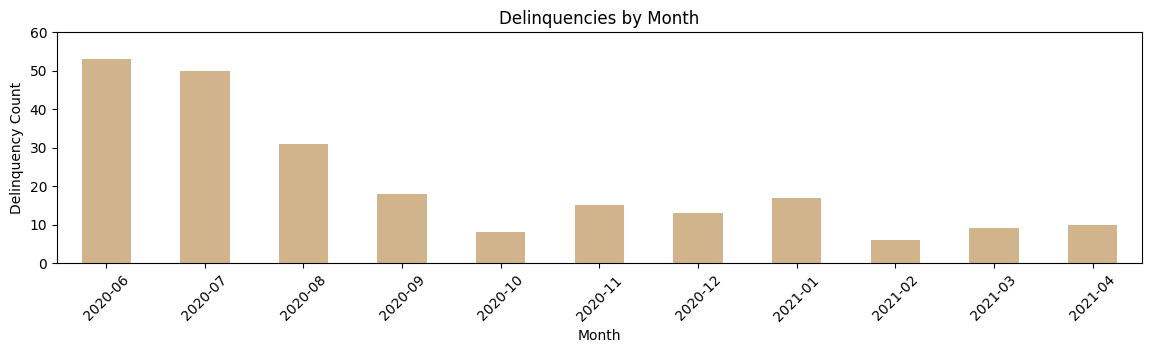

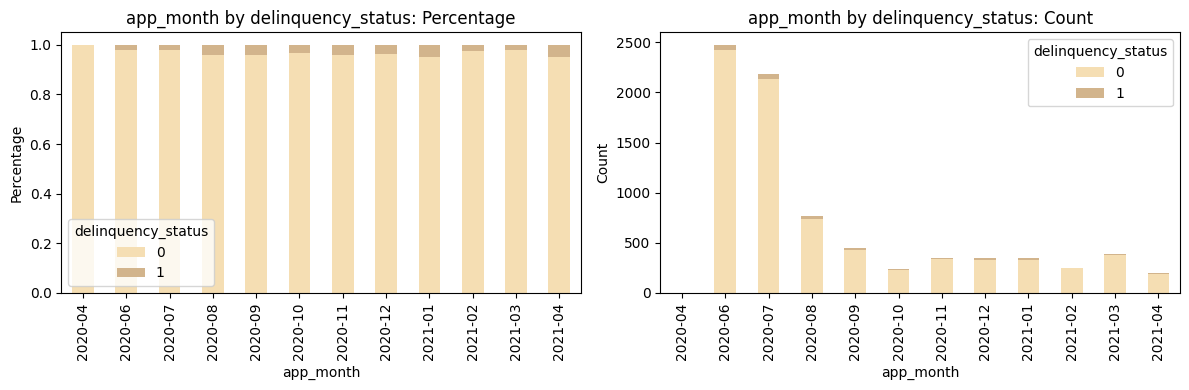

Distribution by app_month & delinquency_status


app_month                      2020-04  2020-06  2020-07  2020-08  2020-09  \
           delinquency_status                                                
Count      0                       2.0  2422.00  2137.00   733.00   433.00   
           1                       0.0    53.00    50.00    31.00    18.00   
Normalized 0                       1.0     0.98     0.98     0.96     0.96   
           1                       0.0     0.02     0.02     0.04     0.04   

app_month                      2020-10  2020-11  2020-12  2021-01  2021-02  \
           delinquency_status                                                
Count      0                    232.00   334.00   331.00   327.00   244.00   
           1                      8.00    15.00    13.00    17.00     6.00   
Normalized 0                      0.97     0.96     0.96     0.95     0.98   
           1                      0.03     0.04     0.04     0.05     0.02   

app_month                      2021-03  2021-04  
           delinquency_status                    
Count      0                    380.00   192.00  
           1                      9.00    10.00  
Normalized 0                      0.98     0.95  
           1                      0.02     0.05

In [45]:
# Plot the customer_statuss for all applications
df_copy['app_month'] = df_copy['app_date'].dt.to_period('M')
monthly_counts = df_copy.groupby('app_month').size()
monthly_counts.plot(kind = 'line', figsize = (14, 3), marker = 'o', color = 'grey')
plt.title('All Monthly Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
# plt.xlim(pd.Period('2020-03', freq = 'M'), monthly_counts.index[-1])
plt.ylim(0, 2600)
plt.savefig("monthly_applications.png", format = "png", dpi = 300)
plt.show()

# # Luse bar graph to compare where the date incidence of'customer_status' values 'BAD'
delinquent_df_copy = df_copy[df_copy['delinquency_status'] == 1]
monthly_delinquent_counts = delinquent_df_copy.groupby(delinquent_df_copy['app_date'].dt.to_period('M')).size()

plt.figure(figsize = (14, 3))
monthly_delinquent_counts.plot(kind = 'bar', color = 'tan')
plt.title('Delinquencies by Month')
plt.xlabel('Month')
plt.ylabel('Delinquency Count')
# plt.xlim(pd.Period('2020-03', freq = 'M'), monthly_counts.index[-1])
plt.ylim(0, 60)
plt.xticks(rotation = 45)
plt.show()

ct_features(df_copy, 'app_month', 'delinquency_status', colors)

The distribution of credits is chronologically concentrated with more than half of all customers acquired during the first 2 months of the campaign (June-July), suggesting a chronologically-focussed customer acquisition campaign with a few weeks of advertizing, marketing and promotions e.g. summer vacation campaign for a youth credit card co-branded with an airline/travel agency partner.

## 3.3. Customer Age Distribution
The customer portfolio exhibites a highly concentrated age profile.

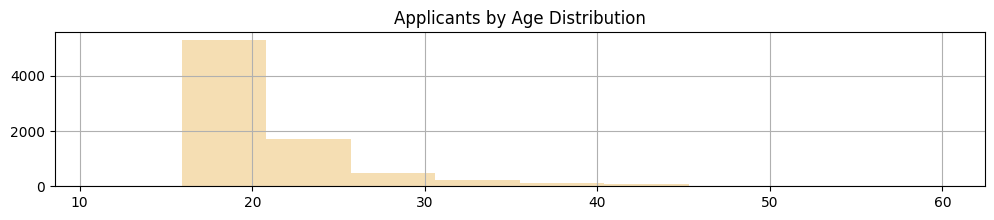

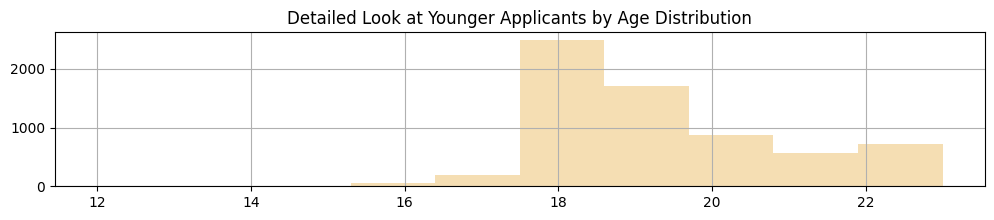

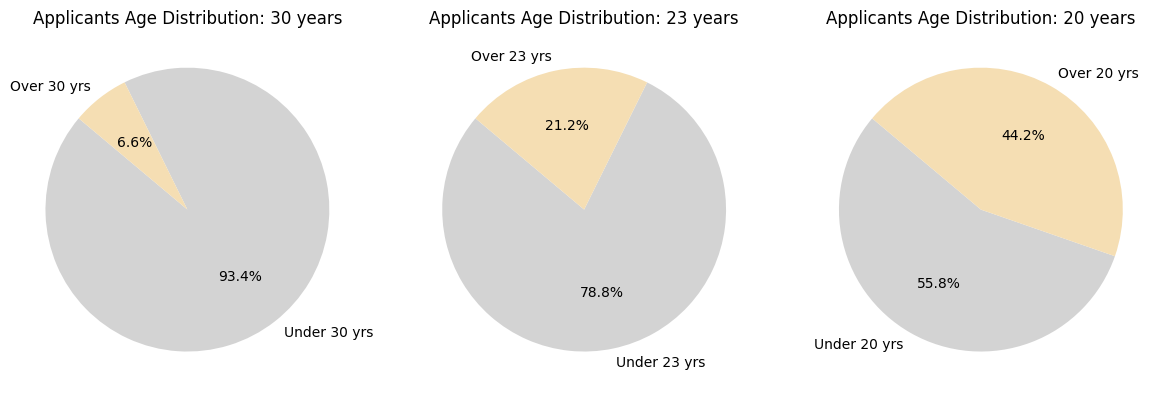

In [46]:
# Let's filter the customers by age
age_min = min(df_copy['cust_age']) # This could also be set to 0
age_max = 23  # Arbitrary cut-off for histogram

# Arbitrary thresholds based on distribution
age_thresholds = [30, 23, 20]

# age_df = df_copy[df_copy['cust_age'] <= age_max]
age_df = df_copy[(df_copy['cust_age'] > age_min) & (df_copy['cust_age'] <= age_max)]

df_copy['cust_age'].hist(figsize = (12, 2), bins = 10, color = 'wheat')
plt.title('Applicants by Age Distribution')
plt.savefig("age_dist_hist_all.png", format = "png", dpi = 300)
plt.show()

age_df['cust_age'].hist(figsize = (12,2), color = 'wheat')
plt.title('Detailed Look at Younger Applicants by Age Distribution')
plt.savefig("age_dist_hist_filt.png", format = "png", dpi = 300)
plt.show()

# Pie criteria
pie_colors = ['lightgrey', 'wheat']
fig, axes = plt.subplots(1, 3, figsize = (12, 6))

for i, age in enumerate(age_thresholds):  # Age thresholds can be adjusted in list above
    under_break_count = df_copy[df_copy['cust_age'] < age].shape[0]
    over_break_count = df_copy[df_copy['cust_age'] >= age].shape[0]

    labels = [f'Under {age} yrs', f'Over {age} yrs']
    sizes = [under_break_count, over_break_count]
    axes[i].pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 140, colors = pie_colors)
    axes[i].set_title(f'Applicants Age Distribution: {age} years')

plt.tight_layout()
plt.savefig("age_dist_pie.png", format = "png", dpi = 300)
plt.show()


A neat solution for a skewed feature with outliers is binning the data.  For the purpose of EDA, we will discretize the age feature to more clearly see the age distributions and delinquencies by age group.  This can also help performance in certain situations when building a model pipeline.   

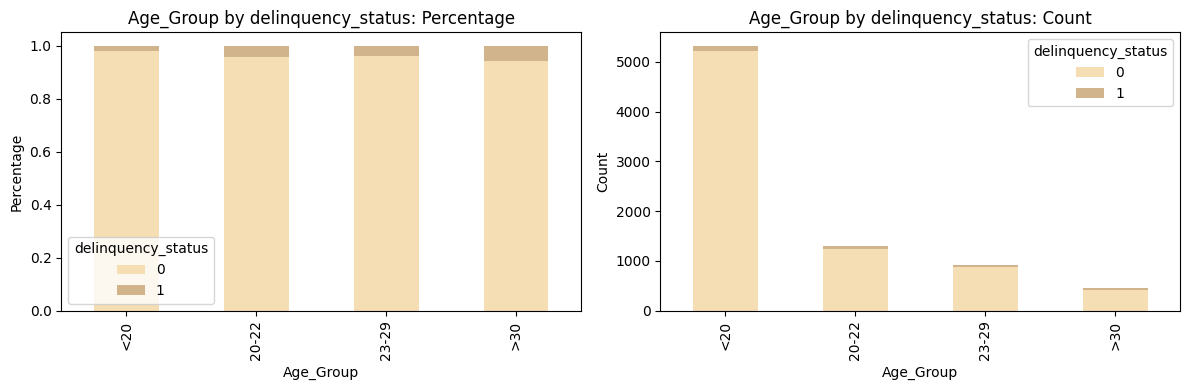

Distribution by Age_Group & delinquency_status


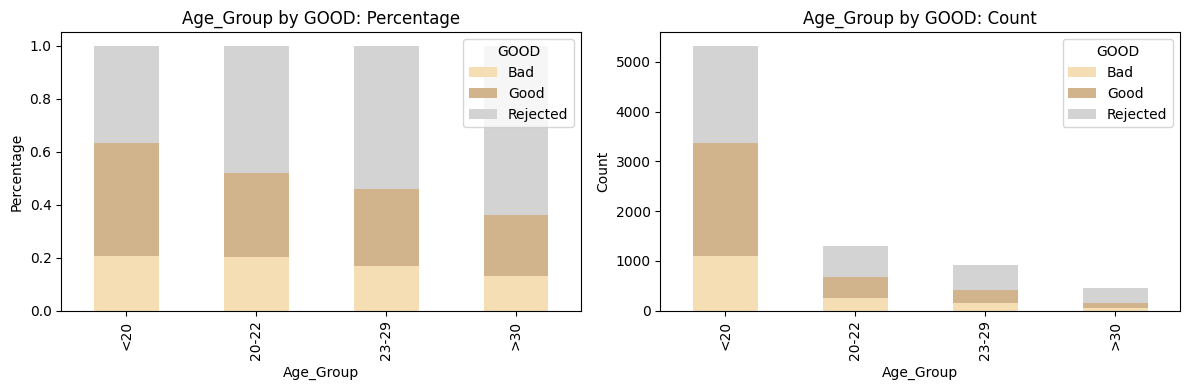

Distribution by Age_Group & GOOD


Age_Group                <20   20-22   23-29     >30
           GOOD                                     
Count      Bad       1103.00  262.00  156.00   60.00
           Good      2268.00  410.00  266.00  104.00
           Rejected  1955.00  624.00  500.00  289.00
Normalized Bad          0.21    0.20    0.17    0.13
           Good         0.43    0.32    0.29    0.23
           Rejected     0.37    0.48    0.54    0.64

In [47]:
# Create a new columns by discretizing the cust_age column to Age ranges
age_bins = [float('-inf'), 20, 23, 30, float('inf')]
age_labels = ['<20', '20-22', '23-29', '>30']

# A k-means approach is more sophisticated but this manual approach gives control
df_copy['Age_Group'] = pd.cut(df_copy['cust_age'], bins = age_bins, labels = age_labels)
ct_features(df_copy, 'Age_Group', 'delinquency_status',  colors)
ct_features(df_copy, 'Age_Group', 'GOOD',  colors)

The correlation between the unqualified applications increasing with the age of customer cohorts indicates that the product is being marketed to young adults, with almost 80% of customers of school-leaving age to 23 years of age. Even though such customers have limited disposable income due to being over-represented in entry-level employment, they have low living costs as they often live with their parents and an increasing consumption pattern. These are attractive customers for financial institutions as they future consumption habits require financial products including car loans, mortgages and investment product and the relationship between a financial institution and customer is quite 'sticky' - once acquired, a customer is unlikely to leave.  <br>
There is a stong indication of bias against candidate customers above the age of 30, with a rejection rate of almost 70%, although there is a correspondingly noticeable increase in delinquency among older customers.

**The results of the age distribution confirm that the bias to younger customers and rejection of older applicants has a strategic commercial rationale and should be factored into the final model.**

## 3.4 ID Numbers Encoding
ID numbers often encodes descriptively chronological data, gender data, risk score, address locality, performing/non-performing loans etc. Since the distribution is fairly balanced, gender is an intuitive interpretation for the positive-negative class designation.    

<Axes: xlabel='index', ylabel='app_id'>

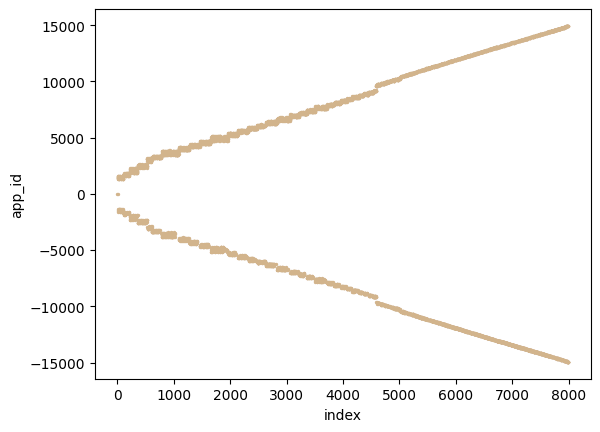

In [48]:
# View the disribution of ID's
df_copy.reset_index().plot(kind = 'scatter', x = 'index', y = 'app_id', color = 'tan', s = 2)

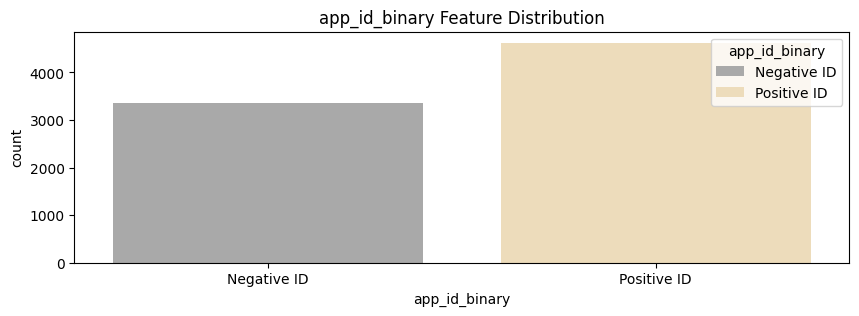

               app_id_binary      %
app_id_binary                      
Positive ID             4629  57.88
Negative ID             3368  42.12


In [49]:
# Binarize and aggregate positive and negative ID values to see distribution
df_copy['app_id_binary'] = df_copy['app_id'].apply(lambda x: 'Positive ID' if x >= 0 else 'Negative ID')
id_counts = df_copy['app_id_binary'].value_counts()
snapshot(df_copy, 'app_id_binary', binary_colors)

The exploration reveals that the ID numbers do not indeed represent gender but sequentially issued id numbers.  The ID numbers in the dataset are positive and negative, which is not unusual if indicative of male/female distribution. However, closer inspection of the distribution reveals a correlation with class attributes of the other features, specifically that the number of negative counts is the same as the not-approved applications indicating that negative values is internal customer coding for indicating not-approved applications (NB. see dashboard). A simple boolean test can confirm if the there are negative ID values among the positive class values in GOOD/BAD attributes.  

In [50]:
# Check 1: See if there are any negative values among approved applications
neg_vals_test = df_copy[df_copy['app_id'] < 0][['GOOD', 'BAD']].apply(pd.to_numeric, errors = 'coerce').gt(0).any().any()
print("Are there any negative values among approved applicants (T/F)? ", neg_vals_test)

Are there any negative values among approved applicants (T/F)?  False


In [51]:
# Check 2: Check for 'Rejected' status with positive ID's
reject_ids = df_copy[
    (df_copy['app_id'] > 0) &
    ((df_copy['GOOD'] == 'Rejected'))
]

# Count the number of such observations
reject_positive_ids_count = len(reject_ids)

# Print the count
print(f"How many Rejected applicants with positive IDs? {reject_positive_ids_count} applicants")

How many Rejected applicants with positive IDs? 0 applicants


**It is confirmed that the positive ID's are approved customers (GOOD and BAD) and the negative ID's represent rejected applicants.**

## 3.5 Interactive Cross-tabulation of Attributes
The dataset includes a large number of attributes which are informative regarding the qualities of the customer portfolio but comprehensively examining over a dozen attributes would result in dozens of visualizations and outputs which is not so efficent in a Jupyter notebook.  In this regard,the incidence of delinquency for multiple features is most easily studied using a dashboard visualizing the normalized incidence of deliqnuency and listing the absolute number of delinquencies in a tabular format.  

In [52]:
# Set-up
chart_df = df_copy.copy()

pio.templates.default = "plotly_white"
cols_to_exclude = ['app_date', 'app_date1']  # timedate problematic for dashboard
chart_df = chart_df.drop(columns = cols_to_exclude, errors = 'ignore') # added drop columns

# # Bin continuous variable for easier apprehension
# for col in cont_attribs:
#     labels = [f"{col}_bin_{i}" for i in range(5)]  # 3-5 bins work best
#     chart_df[col] = pd.cut(chart_df[col], bins = 5, labels = labels, include_lowest = True)

# Columns for dropdown
compare_cols = [col for col in chart_df.columns]
dropdown_options = [{'label': col, 'value': col} for col in compare_cols]

maj_min_options = [
    {'label': 'All', 'value': 'All'},
    {'label': 'Majority Class', 'value': 1},
    {'label': 'Minority Class', 'value': 0}
]

# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div(
    style = {'fontFamily': 'Aptos Narrow, monospace'},
    children = [
        # Radio button for Majority/Minority filter
        html.Label("Filter by Majority/Minority Class:", style = {'fontSize': '12px'}),
        dcc.RadioItems(
            id = 'maj_min_class-radio',
            options = maj_min_options,
            value = 'All',
            inline = True,
            labelStyle = {'marginRight': '10px', 'fontSize': '12px'}
        ),

        # Dropdown for x-axis
        html.Label("Cross-tabulate Attribute #1 (X-axis):", style = {'fontSize': '12px'}),
        dcc.Dropdown(
            id = 'x-attribute-dropdown',
            options = dropdown_options,
            value = 'cust_age',
        ),

        # Dropdown for y-axis
        html.Label("Cross-tabulate Attribute #2 (Y-axis):", style = {'fontSize': '12px'}),
        dcc.Dropdown(
            id = 'y-attribute-dropdown',
            options = dropdown_options,
            value = 'GOOD',
        ),

        # chart placeholder
        dcc.Graph(id = 'cross-tab-chart'),

        # Table to display the cross-tab results
        html.H3("Absolute Results:", style = {'fontSize': '16px', 'marginTop': '30px'}),
        dash_table.DataTable(
            id = 'cross-tab-table',
            style_table = {'height': '400px', 'overflowY': 'auto'},
            style_cell = {'textAlign': 'center', 'fontSize': '10px'},
        )
    ]
)

@app.callback(
    [Output('cross-tab-chart', 'figure'),
     Output('cross-tab-table', 'data')],
    [Input('maj_min_class-radio', 'value'),
     Input('x-attribute-dropdown', 'value'),
     Input('y-attribute-dropdown', 'value')]
)

def update_chart_and_table(class_selected, selected_x_feature, selected_y_feature):
    # Filter data based on majority/minority class selection
    if class_selected != 'All':
        filtered_df = chart_df[chart_df['delinquency_status'] == class_selected]
    else:
        filtered_df = chart_df  # Filter optional here, not applied

    # Cross-tab for absolute count table
    cross_tab_count = pd.crosstab(
        filtered_df[selected_x_feature],
        filtered_df[selected_y_feature]
    ).reset_index()

    # Cross-tab normalized for chart
    cross_tab_norm = pd.crosstab(
        filtered_df[selected_x_feature],
        filtered_df[selected_y_feature],
        normalize = 'index'
    ).reset_index()

    # Melt data for normalized chart
    cross_tab_melted = cross_tab_norm.melt(
        id_vars = selected_x_feature,
        var_name = selected_y_feature,
        value_name = "Percentage"
    )

    # Create chart
    fig = px.bar(
        cross_tab_melted,
        x = selected_x_feature,
        y = "Percentage",
        color = selected_y_feature,
        color_discrete_sequence = colors,
        title = f"Cross-tab of {cols_dict.get(selected_x_feature, selected_x_feature)} by {cols_dict.get(selected_y_feature, selected_y_feature)}",
        barmode = "stack"
    )

    fig.update_layout(
        title_font_size = 12,
        title_font_family = "Aptos Narrow, monospace",
        font_family = "Aptos Narrow, monospace",
        legend = dict(
            orientation = "h",  # Horizontal orientation
            yanchor = "bottom", # Anchor to the bottom of the legend area
            y = 1.02,           # Position slightly above the chart
            xanchor = "right",  # Anchor to the right of the legend area
            x = 1              # Position at the right of the legend area
        )
    )

    # Convert cross-tab table data to dictionary format for Dash
    cross_tab_table_data = cross_tab_count.to_dict('records')

    return fig, cross_tab_table_data

# Run app
if __name__ == '__main__':
    app.run(debug = True)


***Suggested Cross-tabs***<br>
*  'occ_code'  x  'GOOD', filter by 'Majority'
   * *Insight*:   In some occupational categories, all non-delinquenct customers were rejected applicants from certain ocuupations (e.g. agricultural workers), indicating a possible bias against this socieo-economic group.
*  'Age_Group'  x  'GOOD', filter by 'Majority'
   * *Insight*:  Strong bias exhibited toward younger customers   
*  'Age_Group'  x  'res_indicator', filter by 'Majority' & compare to 'Minority'
   * *Insight*:  High delinquency rate of customers >40yrs living with parents, including carers   
*  'delinquency_status' x 'disp_income', filter by 'All'
   * *Insight*:  Zero income for 90% of customers   


### 3.5.1  Insights from Exploring Cross-tabs
Subtle patterns can be observed wen exploring the distributions of applicants by age,  residential status and occupation e.g. no delinquencies among farm workers ('FT') and unemployed ('SJ') customers while Job Seekers ('SK') classed as BAD customer had no delinquencies.  Similarly, investigation of the employment and cross-tabuulation of unqualified applicants reveals potential discrimination, not just on age, but perhaps on the basis of other social measures.  

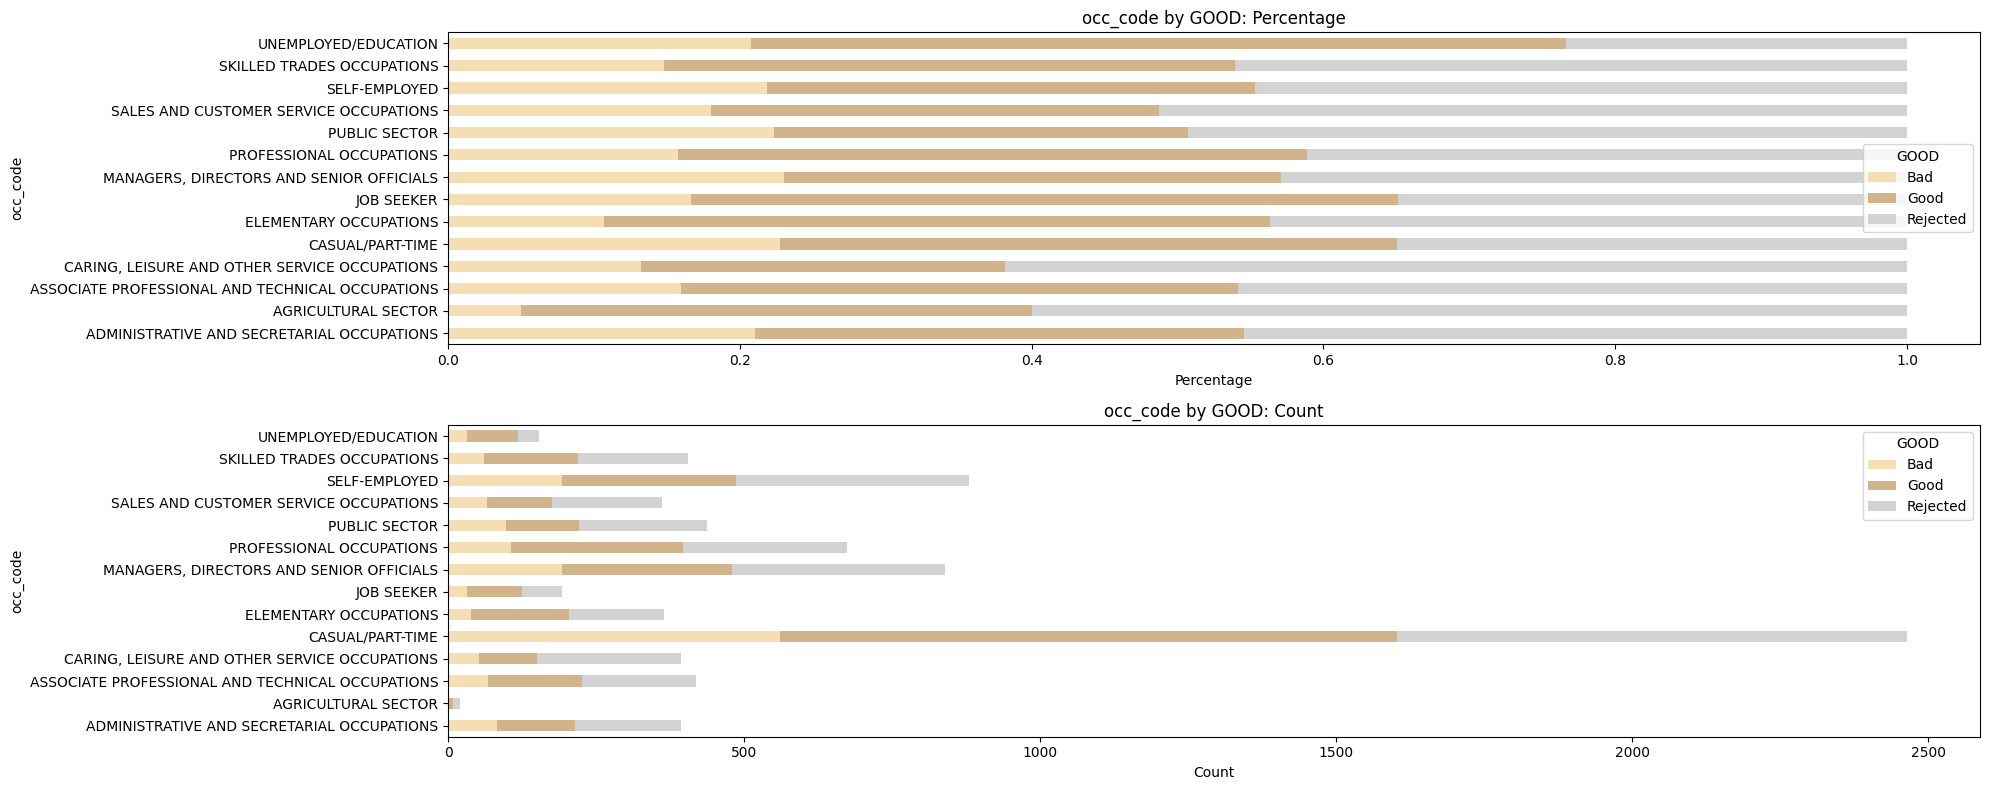

Distribution by occ_code & GOOD


Count                   \
GOOD                                                Bad    Good Rejected   
occ_code                                                                   
ADMINISTRATIVE AND SECRETARIAL OCCUPATIONS         83.0   132.0    179.0   
AGRICULTURAL SECTOR                                 1.0     7.0     12.0   
ASSOCIATE PROFESSIONAL AND TECHNICAL OCCUPATIONS   67.0   160.0    192.0   
CARING, LEISURE AND OTHER SERVICE OCCUPATIONS      52.0    98.0    243.0   
CASUAL/PART-TIME                                  561.0  1041.0    862.0   
ELEMENTARY OCCUPATIONS                             39.0   166.0    159.0   
JOB SEEKER                                         32.0    93.0     67.0   
MANAGERS, DIRECTORS AND SENIOR OFFICIALS          193.0   286.0    360.0   
PROFESSIONAL OCCUPATIONS                          106.0   291.0    277.0   
PUBLIC SECTOR                                      98.0   124.0    216.0   
SALES AND CUSTOMER SERVICE OCCUPATIONS             65.0   111.0    185.0   
SELF-EMPLOYED                                     192.0   294.0    393.0   
SKILLED TRADES OCCUPATIONS                         60.0   159.0    187.0   
UNEMPLOYED/EDUCATION                               32.0    86.0     36.0   

                                                 Normalized                 
GOOD                                                    Bad  Good Rejected  
occ_code                                                                    
ADMINISTRATIVE AND SECRETARIAL OCCUPATIONS             0.21  0.34     0.45  
AGRICULTURAL SECTOR                                    0.05  0.35     0.60  
ASSOCIATE PROFESSIONAL AND TECHNICAL OCCUPATIONS       0.16  0.38     0.46  
CARING, LEISURE AND OTHER SERVICE OCCUPATIONS          0.13  0.25     0.62  
CASUAL/PART-TIME                                       0.23  0.42     0.35  
ELEMENTARY OCCUPATIONS                                 0.11  0.46     0.44  
JOB SEEKER                                             0.17  0.48     0.35  
MANAGERS, DIRECTORS AND SENIOR OFFICIALS               0.23  0.34     0.43  
PROFESSIONAL OCCUPATIONS                               0.16  0.43     0.41  
PUBLIC SECTOR                                          0.22  0.28     0.49  
SALES AND CUSTOMER SERVICE OCCUPATIONS                 0.18  0.31     0.51  
SELF-EMPLOYED                                          0.22  0.33     0.45  
SKILLED TRADES OCCUPATIONS                             0.15  0.39     0.46  
UNEMPLOYED/EDUCATION                                   0.21  0.56     0.23

In [53]:
# df_copy['occ_code'] = df['occ_code'].map(occupation_dict)
ct_features_vert(df_copy, 'occ_code', 'GOOD',  colors)

One option for the occupational categories (and other continuous features) would be aggregate categories with less than 10% relative frequency and then discretize them.

## 3.6 Feature Screening
Before deciding on the candidate models, we screen variables in order to reduce noise by filtering out less important variables.

### 3.6.1 Correlation Analysis
We will visualize feature correlation with a heatmap and list the attributes most and least correlated with the target.   

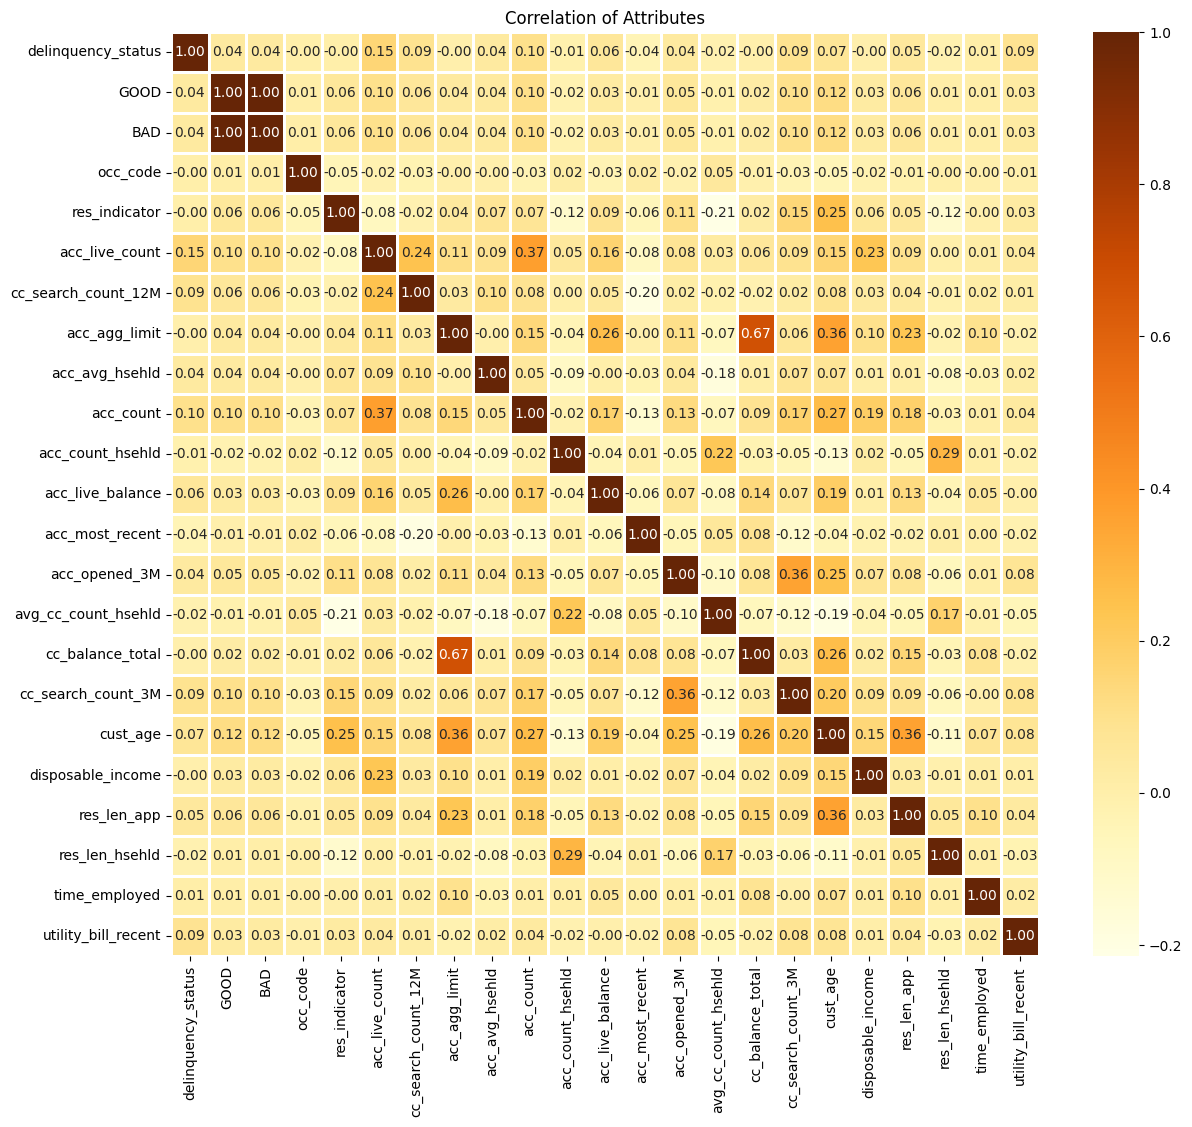

In [54]:
# Plotting the heatmap
df1 = df_copy
label_cols = target + cat_attribs
for col in label_cols:
    df1[col] = LabelEncoder().fit_transform(df1[col])

cols = label_cols + ord_attribs + cont_attribs
df1 = df1[cols]
corr_df = df1.corr()
corr_df = corr_df.rename(columns = cols_dict, index = cols_dict)

plt.figure(figsize = (14, 12))
sns.heatmap(corr_df, annot = True, fmt = ".2f", cmap = 'YlOrBr', linewidths = 1)
plt.title("Correlation of Attributes")
plt.savefig("corr_heatmap.png", format = "png", dpi = 300)
plt.show()


**The incidence of colinearity between the GOOD-BAD columns is 100% in models where the columns are not engineered to combine the non-GOOD, non-BAD classes.**

### 3.6.2 Key Attributes & Noise

In [55]:
delinquency_corr = corr_df["delinquency_status"].abs().sort_values(ascending = False)
top_features = delinquency_corr.drop("delinquency_status").head(10)
print("\nHIGHEST CORRELATIONS\n", top_features)

bottom_features = delinquency_corr.drop("delinquency_status").tail(10)
# bottom_features_list = bottom_features.index.tolist()
print("\nLOWEST CORRELATIONS / NOISY ATTRIBUTES", bottom_features)


HIGHEST CORRELATIONS
 acc_live_count         0.153677
acc_count              0.101357
cc_search_count_3M     0.091611
cc_search_count_12M    0.089130
utility_bill_recent    0.087409
cust_age               0.065890
acc_live_balance       0.058748
res_len_app            0.047568
acc_most_recent        0.040410
acc_avg_hsehld         0.040025
Name: delinquency_status, dtype: float64

LOWEST CORRELATIONS / NOISY ATTRIBUTES acc_opened_3M          0.037079
res_len_hsehld         0.019331
avg_cc_count_hsehld    0.017375
acc_count_hsehld       0.012330
time_employed          0.011108
disposable_income      0.004390
acc_agg_limit          0.004287
cc_balance_total       0.002790
res_indicator          0.000740
occ_code               0.000554
Name: delinquency_status, dtype: float64


In [56]:
# set arbitrary cut-off for correlations
correlation_cutoff = 0.02
least_correlated_features = delinquency_corr[abs(delinquency_corr) < correlation_cutoff]
correlated_features_below_cutoff = least_correlated_features.index.tolist()
correlated_features_below_cutoff

['res_len_hsehld',
 'avg_cc_count_hsehld',
 'acc_count_hsehld',
 'time_employed',
 'disposable_income',
 'acc_agg_limit',
 'cc_balance_total',
 'res_indicator',
 'occ_code']

## 3.7 Baseline Model & Analysis
Before commencing data engineering, we can assess predictive potential for the dataset using a RandomForest baseline.  The rationale for the selection is that Randomforest can handle non-linear relationships, are less sensitive to extreme values than other models and, at the preliminary stage, do not require tuning of hyperparameters.  After training the model, we study the features importances of individual features to detect any relationships between features.  In view of the imbalance in the target attribute (majority class is 97% of values), it is anticipated that while majority class predictions will be have high accuracy i.e. 97%, the precision and F1 scores will converge toward 'toss-of-coin' probability (50%).

In [57]:
# Baseline Model with RandomForest
# For simplicity, we drop engineered features and timedate attributes
bl_model_cols_to_drop = ['delinquency_status', 'app_date', 'app_date.1', 'app_month', 'Age_Group', 'app_id_binary']
X = df_copy.drop(bl_model_cols_to_drop, axis = 1)
y = df_copy['delinquency_status']

# Split dataset
baseline_X_train, baseline_X_test, baseline_y_train, baseline_y_test = train_test_split(X, y, test_size = 0.2, random_state = rs, stratify = y)

# Convert to 1D NumPy arrays
baseline_y_train = baseline_y_train.values.ravel()
baseline_y_test = baseline_y_test.values.ravel()

# Create model
rf_baseline_model = RandomForestClassifier(random_state = rs, class_weight = "balanced")
rf_baseline_model.fit(baseline_X_train, baseline_y_train)
rf_baseline_preds = rf_baseline_model.predict(baseline_X_test)


### 3.7.1 Gini Coefficient   
The Gini coefficient provides a metric to evaluate the model's ability to discriminate between majority and minority classes. To interpret the model's performance for credit scoring, the Gini coefficient results can be interpreted as follows:<br>
*  Gini = 0 (50%) → Random guessing
*  Gini < 0.3 → Weak predictive power
*  Gini > 0.5 → Strong predictive power
*  Gini > 0.7 → Model possibly overfitting


In [58]:
# Ability of model to discriminate between classes

def gini_coefficient(ytest, y_score):
    """Computes Gini Coefficient as 2 * AUC - 1."""
    auc = roc_auc_score(ytest, y_score)
    return 2 * auc - 1

# RandomForest predicted probabilities
rf_y_probs = rf_baseline_model.predict_proba(baseline_X_test)[:, 1]  # Probabilities for class 1

# Gini coefficient
gini_rf = gini_coefficient(baseline_y_test, rf_y_probs)
print(f"Gini coefficient: {gini_rf:.4f}")

Gini coefficient: 0.5554


The Gini coefficient is greater than 0.6 which indicates good predictive power.  As we are working on an imbalanced dataset, additional metrics are required to be confident the nuances of the dataset is being captured.

### 3.7.2 Kologorov-Smirnov Statistic
The Kolmogorov-Smirnov statistic computes the maximum separation between the cumulative distribution functions (CDFs) of the good and bad customers. <br>
We can infer from the score:<br>
*  KS < 0.2:	Weak model
*  KS 0.2–0.3:	Acceptable model
*  KS 0.3–0.5	Model with Good discrimination
*  KS > 0.5:	Excellent model with Very strong separation  
<br>

*Source: https://medium.com/%40kstarun/k-s-score-for-model-evaluation-5339f0a5c705*


In [59]:
def ks_statistic(ytest, y_score):
    """Computes the Kolmogorov-Smirnov (KS) Statistic"""
    min_len = min(len(ytest), len(y_score))
    ytest = ytest[:min_len]
    y_score = y_score[:min_len]

    fpr, tpr, _ = roc_curve(ytest, y_score)
    return max(np.abs(tpr - fpr))

# Kolmogorov-Smirnov (KS) statistic
# Get probability of the positive class
rf_baseline_probs = rf_baseline_model.predict_proba(baseline_X_test)[:, 1]
ks_rf = ks_statistic(baseline_y_test, rf_baseline_probs)
print(f"Kolmogorov-Smirnov statistic: {ks_rf:.4f}")


Kolmogorov-Smirnov statistic: 0.4083


The model has a strong KS score, but to properly evaluate the model, we should also check accuracy, precision and recall as datasets with class imbalance can often show strong Gini and KS scores.

### 3.7.3 Precision-Recall Metrics

Baseline Model:  RandomForest Classifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1554
           1       1.00      0.04      0.08        46

    accuracy                           0.97      1600
   macro avg       0.99      0.52      0.53      1600
weighted avg       0.97      0.97      0.96      1600



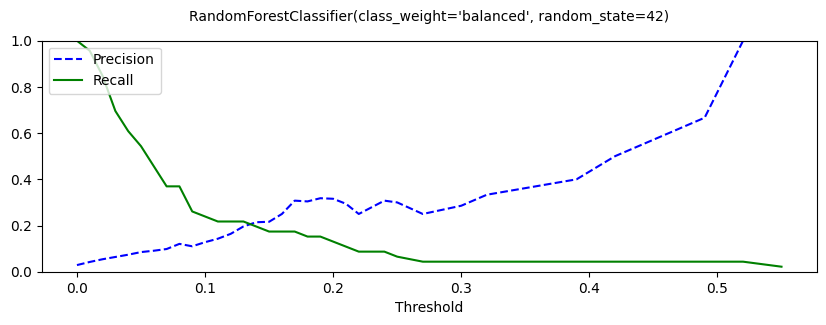

In [60]:
# Precision-recall metrics & plot
precision, recall, thresholds = precision_recall_curve(baseline_y_test, rf_y_probs)
auc_pr = auc(recall, precision)

print("Baseline Model:  RandomForest Classifier")
print(classification_report(baseline_y_test, rf_baseline_preds))

# plt.figure(figsize = (4, 3))
# plt.plot(recall, precision, label = f'AUC-PR = {auc_pr:.2f}')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve: RandomForest Classifier')
# # plt.legend(loc = 'lower left')
# plt.show()

def precision_recall_trade_off(model, xTest, yTest):
    # Plot the curve
    plt.figure(figsize = (10, 3))
    yyPredProb = model.predict_proba(xTest)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(yTest, yyPredProb)
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.title(f"{model}", fontsize = 10, y = 1.05)
    plt.legend(loc = "upper left")
    plt.ylim([0, 1])
    plt.show()

precision_recall_trade_off(rf_baseline_model, baseline_X_test, baseline_y_test)

# Acknowledgements: Adapted from Geron, Machine Learning Handbook pp. 89

The baseline model gives little cause for confidence, with a 0.02 result for recall.  It appears that the RandomForest model is predicting almost everything as '0'.  

In the case of a good classifier, the precision line should start above 0.9 and drop slowly while the reacall curve should start low and rise sharply. The Precision-Recall curves show a rapid decline in the recall curve, indicating that the model ascribes low probability scores to actual positives and the slow increase in the precision curve indicates that the precision improves with the threshold but at the cost of recall. <br>
<br>
This is not the case for our base line classifer.  As anticipated, the class imbalance in the target attribute was too much for the baseline model to meaningfully distinguish between the classes. Since the majority class represents 97% of data, a very high accuracy rate (~0.97) is meaningless in the context of the low f1 score for the minority. The result informs us in regard to two issues:<br>
1.  A signifcant amount of work is required to balance data and engineer features before building and evaluating candidate models
2.  Certain models are less likely to perform well on the dataset in the context of sparse data, extreme values and the class imbalance in the target variable <br>
<br>

## 3.8 Target Imbalance & SMOTE
Before deciding on feature selection, we balance the minority class using SMOTE

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1554
           1       0.20      0.09      0.12        46

    accuracy                           0.96      1600
   macro avg       0.59      0.54      0.55      1600
weighted avg       0.95      0.96      0.96      1600



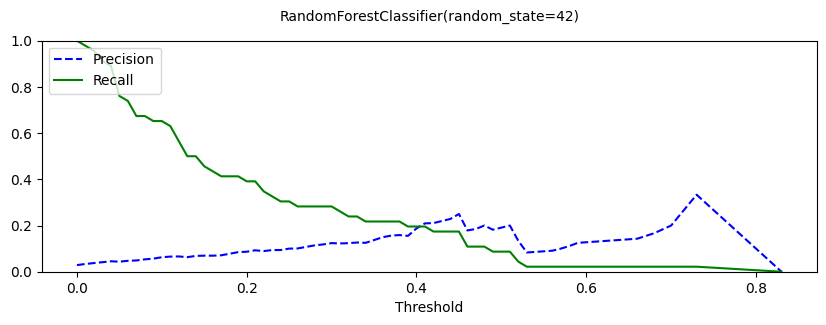

Gini coefficient: 0.4694
Kolmogorov-Smirnov statistic: 0.3640


In [61]:
# Apply SMOTE to the training set
smote = SMOTE(random_state = rs)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(baseline_X_train, baseline_y_train)

# Train model with scale_pos_weight
rf_SMOTE_model = RandomForestClassifier(random_state = rs)  # ignoring class_weight for now
rf_SMOTE_model.fit(X_train_SMOTE, y_train_SMOTE)

# Re-run on test set
y_pred_SMOTE_rf = rf_SMOTE_model.predict(baseline_X_test)
print(classification_report(baseline_y_test, y_pred_SMOTE_rf))

precision_recall_trade_off(rf_SMOTE_model, baseline_X_test, baseline_y_test)

# RandomForest SMOTE predicted probabilities
rf_SMOTE_y_probs = rf_SMOTE_model.predict_proba(baseline_X_test)[:, 1]  # Probabilities for class 1

# Gini coefficient
gini_rf = gini_coefficient(baseline_y_test, rf_SMOTE_y_probs)
print(f"Gini coefficient: {gini_rf:.4f}")


# Kolmogorov-Smirnov (KS) statistic
# Get probability of the positive class
ks_rf = ks_statistic(baseline_y_test, rf_SMOTE_y_probs)
print(f"Kolmogorov-Smirnov statistic: {ks_rf:.4f}")

The precision scores with the SMOTE model has a lower precision score than the baseline model.  However, the SMOTE model has better recall, which will be the more signficant metric where the client feels avoiding the cost of default customers (False Negatives) is more important than new customer acquisition (False Positive).<br>

The results are not a surprise:<br>
*  SMOTE added synthetic minority examples so the class boundary is fuzzier because the model is better calibrated i.e. the recall curve has improved indicating better ranking of positives and that the model recognizes patterns in the minority class better
*  The Gini coefficient and KS statistic indicates that the maximum separation between the cumulative distribution functions (CDFs) of the good and bad customers in the SMOTE model has a harder time ranking risk
*  While the precision curve indicates that there are many false positives, the SMOTE model Gini is at a good production-level model for banks and considered decent-to-strong in credit scoring.
<br>

If we wished to proceed with this model, we can set thresholds at a desired level of trade-off between recall and precision.   

In [62]:
# We use F1 score for threshold selection
f1_scores = [(t, f1_score(baseline_y_test, rf_SMOTE_y_probs >= t)) for t in thresholds]
best_threshold, best_f1 = max(f1_scores, key=lambda x: x[1])

print(f"Best threshold: {best_threshold:.3f}, F1: {best_f1:.3f}")

Best threshold: 0.420, F1: 0.190


## 3.9 Key Takeaways from EDA
*  **Not Qualified/Rejected Applicants:** The datset includes data for approximately 42% of applicants who were rejected/not approved.  This data possesses valuable information for our model because the significantly higher delinquency rate among rejected applicants implicitly validates the proprietary or third-party credit scoring system currently used by the bank (NB. additional validation is the 3% delinquency rate for the portfolio which is consistent with central bank data for the wider market).  
*  **Age Profile of Clients:** The median customer age is 19 and customer portfolio is 78% composed of customers under the age of 23. There is a higher incidence of undesired clients and delinquency among older customers.
*  **Employment History of Delinquent Clients:** There is a higher incidence of delinquency among customers with longer employment histories.  The majority of customers have less than 1 year employment history, which is consistent with the tagetted age-group (school-leavers)
*  **Disposable Income:**  The vast majority of customers report either no disposable income or extremely low disposable income.  Again, this is consistent with young customers still in education, not yet employed or starting their first job.
*  **Residential Status:** Approximately 20% of customers are their renting homes, with almost all other customers living with parents. Only 2% of customers own their own homes, and this cohort has a disproportionately high level of delinquency.
*  **Number of Accounts Held:** Customers predominately have either one open account (presumably for the credit) or no account (e.g. have a sub-account under their parents' account).
*  **Outliers:** The dashboard is useful for detecting outliers, including age (customers > 100 years old), employment history (99999 years) etc.  Because of the imbalance in the data for credit scoring models, eliminating outliers is very important for performance and better generalization.
*  **Baseline Model:**  Our RandomForest model encountered the expected problems of detecting signals when dealing with an imbalanced dataset.

______________________________________________________

# 4. Feature Selection & Model-based Dimensionality Reduction
____________________________________________________
Having identified the variables with weak linear and non-linear relationships for the target variable during EDA, we now screen features to identify those offering the highest information gain and predictive value for the target variable. The intersection of features that are both weakly correlated and ranked low in importance offers little predictive value and likely contributes noise to the dataset. <br>
<br>
Due to the sparsity of the dataset, utilizing PCA for dimensionality reduction is an inappropriate strategy.  PCA summarizes the information content of large datasets into principal components, smaller sets of uncorrelated variables. These principal components are linear combinations of the original variables that have the maximum variance compared to other linear combinations (1).  Sparsity implies a large concentration of zero values, and PCA creates dense components by combining sparse features into linear combinations, thereby resulting in:<br>
*  Less interpretability, and
*  Increased computational cost and,
*  Potential distortion of distance metrics due to reliance on covariance matrices  
<br>

1. IBM:  *https://www.ibm.com/think/topics/principal-component-analysis#:~:text=PCA%20summarizes%20the%20information%20content,compared%20to%20other%20linear%20combinations*

### 4.1 Random Forest Feature Importances (Baseline Model with SMOTE)
Certain features demonstrated a low correlation with the target delinquency status feature and ranked low among feature importances for the baseline model.

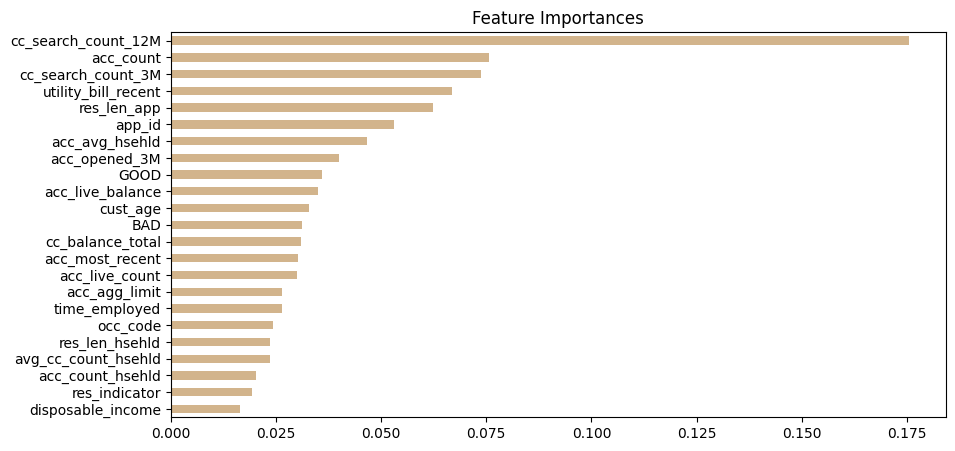

In [63]:
# Features importances
index_cols = baseline_X_train.columns
baseline_importances = pd.Series(rf_SMOTE_model.feature_importances_, index = index_cols)

plt.figure(figsize = (10, 5))
baseline_importances.sort_values().plot(kind = 'barh', color = 'tan')
plt.title("Feature Importances")
plt.show()

In [64]:
# List intersection of lowest correlation and importance features
lowest_corr_features = delinquency_corr.drop("delinquency_status").nsmallest(10).index.tolist()
lowest_importance_features = baseline_importances.nsmallest(10).index.tolist()
lowest_importances_to_drop = [feature for feature in lowest_corr_features if feature in lowest_importance_features]
print("LOWEST IMPORTANCES FEATURES TO DROP: ")
lowest_importances_to_drop

LOWEST IMPORTANCES FEATURES TO DROP: 


['occ_code',
 'res_indicator',
 'acc_agg_limit',
 'disposable_income',
 'time_employed',
 'acc_count_hsehld',
 'avg_cc_count_hsehld',
 'res_len_hsehld']

### 4.2 RFE Selection
Recursive Feature Elimination is a feature selection method that systematically removes the least important features based on model performance — until a desired number of features remains (five).  RFE analysis can be applied in credit scoring to: <br>
*  reduce multicollinearity and overfitting
*  improve model stability over time
*  identify parsimonious models i.e. models with fewer features typically face fewer obstacles to regulatory approval due to improved explainability and reduced model complexity

In [65]:
# Use Recursive Feature Elimination to select features
selector = RFE(rf_SMOTE_model, n_features_to_select = 15)
selector = selector.fit(baseline_X_train, baseline_y_train)

# Get selected features
feature_names = baseline_X_train.columns
selected_feature_names = feature_names[selector.support_].tolist()
print("Selected Features:")
selected_feature_names

Selected Features:


['app_id',
 'occ_code',
 'cust_age',
 'acc_agg_limit',
 'acc_most_recent',
 'utility_bill_recent',
 'res_len_hsehld',
 'res_len_app',
 'acc_count_hsehld',
 'cc_balance_total',
 'acc_avg_hsehld',
 'avg_cc_count_hsehld',
 'acc_live_count',
 'acc_live_balance',
 'cc_search_count_12M']

## 4.3 Features to Drop

<br>**NB. It should be noted that substantially different results are observed when columns with excessive fs_values ('.') values are removed and outliers are excluded. Though fuzzy logic solutions exist to handle these anomalies, the proper treatment of outliers depends on careful study of customer-level context that is not present in the dataset. In principle, this would be explored in detailed discussions with XYZ bank before developing a scoring model for production.**<br>
<br>
*Acknowledgements:*  For an excellent repo on feature selection with non-present features using fuzzy logic, https://github.com/JGFuentesC/woe_credit_scoring/blob/main/woe_credit_scoring/CreditScoringToolkit.py

In [66]:
mapped_fs_cols_to_drop = [cols_dict.get(col, col) for col in fs_cols_to_drop]
all_features_to_drop = list(set(mapped_fs_cols_to_drop +
                                lowest_importances_to_drop +
                                correlated_features_below_cutoff +
                                info_attribs +
                                date_attribs
                                ))

print('Candidate Columns to Drop:')
all_features_to_drop

Candidate Columns to Drop:


['res_indicator',
 'occ_code',
 'acc_count_hsehld',
 'disposable_income',
 'utility_bill_recent',
 'cc_balance_total',
 'acc_agg_limit',
 'res_len_hsehld',
 'app_id',
 'app_date',
 'acc_opened_3M',
 'cc_search_count_3M',
 'time_employed',
 'avg_cc_count_hsehld',
 'app_date.1']

In [67]:
features_to_keep = list(set(df_copy.columns) - set(all_features_to_drop))
df_overview(df_copy[features_to_keep])

Dataframe Shape:          (7997, 14)
Duplicates Count:                210
************************************ 

Column Name                         Data type            Non-null Values    Missing Values       Cardinality
************************************************************************************************************
BAD                                 int64                           7997                 0                 3
cc_search_count_12M                 int64                           7997                 0                 6
app_month                           period[M]                       7997                 0                12
acc_live_count                      int64                           7997                 0                 8
GOOD                                int64                           7997                 0                 3
app_id_binary                       object                          7997                 0                 2
cust_age       

Surprisingly, household-related features dominate in features importances. For credit card risk scoring, attributes such as disposable income, occupation and residence type are traditionally strong predictors of delinquency risk.  However, due to the dataset’s concentration of young customers (18–21), features reflecting household financial behavior and stability—like number of credit cards in the household or length of residence—dominate. These results are interesting because the correlation analysis results did not apply such strong weights to these features. <br>

Having completed the EDA, we have an understanding of the customer portfolio, identified features that are correlated with the target attribute and features with a non-linear relationship that have predictive importance. While dimensionality reduction is desireable to reduce noise and improve model performance, before dropping attributes, it's important to keep in mind that the correlations and importances skew toward the majority class.

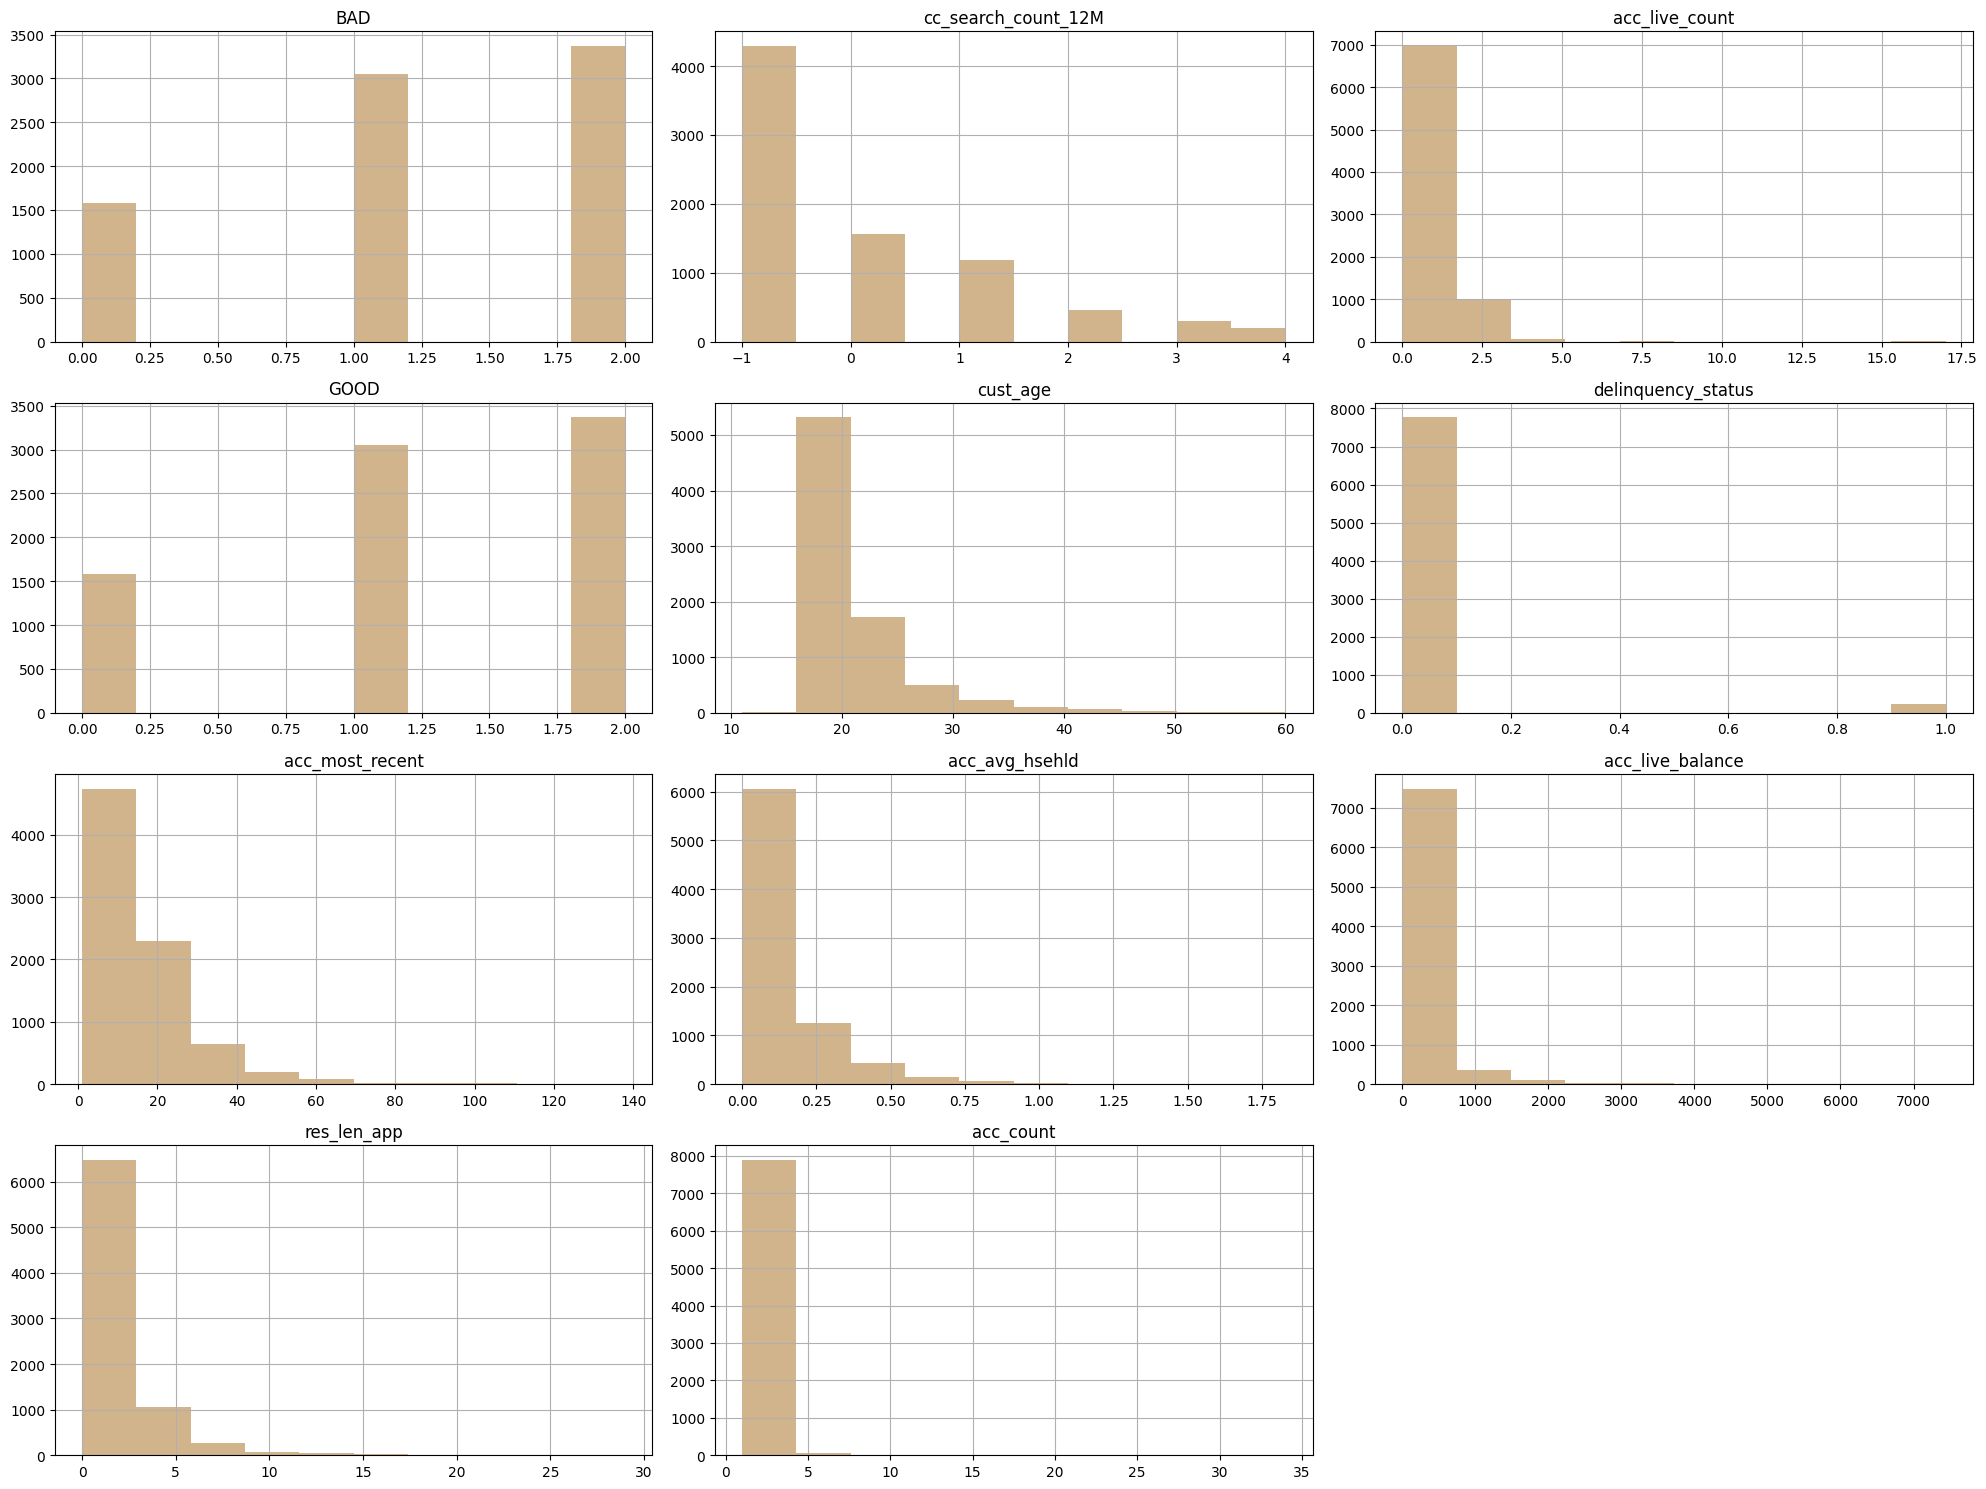

In [68]:
# Check if the full stop/period values have been resolved
df_copy[features_to_keep].hist(bins = 10, figsize = (20, 15), color = 'tan')
plt.tight_layout()
plt.show()

In [69]:
# Columns to drop - unmapped list
reverse_cols_dict = {v: k for k, v in cols_dict.items()}
cols_to_drop_unmapped_names = [reverse_cols_dict.get(name, name) for name in all_features_to_drop]
cols_to_drop_unmapped_names

['res_indicator',
 'occ_code',
 'I_05',
 'disp_income',
 'D_01',
 'D_02',
 'I_02',
 'ER_01',
 'app_id',
 'app_date',
 'I_01',
 'S_01',
 'time_emp',
 'P_01',
 'app_date.1']

# 4.4 Summary of Feature Screening

*  **PCA is unsuitable due to sparsity and interpretability concerns**

* **Redundant and low-importance features can be identified and removed based on correlation and model-based filtering**

* **Household financial behavior dominates in importance, likely due to demographic skew**

*  **Feature selection must consider both data limitations (i.e. missing revenues & profitability data) and domain-specific nuances (i.e. customer categories)**

# 5. Model Metrics & Pipelines
____________________________________________________

## 5.1 Model Evaluation Metrics

### 5.1.1 Statistical Metrics

In [70]:
# The target feature is severely imbalanced
# so understanding precision-recall tradeoff is a priority
def precision_recall_trade_off(model, xTest, yTest):
    # Plot the curve
    plt.figure(figsize = (10, 3))
    yyPredProb = model.predict_proba(xTest)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(yTest, yyPredProb)
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.title(f"{model}", fontsize = 10, y = 1.05)
    plt.legend(loc = "upper left")
#    plt.ylim([0, 1])
    plt.show()

# Acknowledgements: Adapted from Geron, Machine Learning Handbook pp. 89


# We want to calibrate the results & review results
def evaluation_metric_with_youden(model, xTest, yTest):
    """
    Print results from key evaluation metrics
    with Youden threshold
    """
    # Predicted probabilities
    yyPredProb = model.predict_proba(xTest)[:, 1]

    # ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(yTest, yyPredProb)
    roc_auc = auc(fpr, tpr)

    # Compute Youden's J statistic
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx]
    optimal_point = (fpr[optimal_idx], tpr[optimal_idx])

    print(f"Area under the ROC curve: {roc_auc:.6f}")
    print(f"Optimal Threshold (Youden's J): {optimal_threshold:.4f}")
    print(f"Sensitivity (TPR) at Optimal Threshold: {tpr[optimal_idx]:.4f}")
    print(f"Specificity (1-FPR) at Optimal Threshold: {1 - fpr[optimal_idx]:.4f}")

    # Plot the ROC Curve
    fig, ax = plt.subplots(figsize = (4, 4))
    ax.plot(fpr, tpr, label = f"ROC curve (AUC = {roc_auc:.2f})")
    ax.plot([0, 1], [0, 1], color = "blue", linestyle = "--", label = "Random Classifier Line")
    ax.scatter(*optimal_point, color = "red", label = "Optimal Threshold", zorder = 5)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic with Youden's J")
    ax.legend()
    plt.show()

    return optimal_threshold

# Ackmowledgement: Code adapted from https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python


def evaluation_metric(model, xTrain, yTrain, xTest, yTest):
    """
    Print results from key evaluation metrics
    """
    # Training dataset
    yPred = model.predict(xTrain)
    # Cross validation score for training dataset
    cv_scores = cross_val_score(model, xTrain, yTrain, cv = 5)
    print("Training Cross validation - Average Accuracy : ", np.mean(cv_scores))
    print('-'*100)

    # Performance Statistics
    gini_ks_metrics(yTest, yyPred)
    print('-'*100)

    # Confusion Matrix
    yyPred = model.predict(xTest)
    cm = confusion_matrix(yyPred, yTest)
    cm_df = pd.DataFrame(cm)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    plt.figure(figsize = (6, 4))
    sns.heatmap(
        cm_df,
        annot = True,
        fmt = 'd',
        cmap = 'Oranges',
        cbar = False
    )
    plt.title('Confusion Matrix')
    plt.show()


    # The ROC Curve
    fpr, tpr, _ = roc_curve(yTest, yyPred)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

    # AUC Area under the roc curve
    print("AUC of validation set : ",'{:.2%}'.format(roc_auc_score(yTest, yyPred)))
    tn, fp, fn, tp = cm.ravel()
    print("Positive Predictive Value: ",'{:.2%}'.format(tp/(tp+fp)))

# Acknowledge:  E2EML Module example

# Simple confusion matrix for TP, FP, TN, FN visualization
def plot_confusion_matrix(y, y_predict, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_predict, labels = [0, 1])
    plt.figure(figsize = (4, 3))
    sns.heatmap(cm, annot = True, fmt = "", cmap = 'Oranges')
    plt.title(title)
    tn, fp, fn, tp = cm.ravel()
    print("Positive Predictive Value: ",'{:.2%}'.format(tp/(tp+fp)))
    plt.show()


def print_auc_minority_score(model, Xtest, ytest):
    """
    Print the AUC-ROC score for minority class
    """
    y_proba = model.predict_proba(Xtest)[:, 1]
    auc = roc_auc_score(ytest, y_proba)
    print(f"AUC-ROC Score: {auc:.4f}")
    return auc


### 5.1.1  Pipeline Evaluation
Because we are evaluating the comparitive performance not only of models but also pipelines, we screen the best performing pipelines before proceeding with the best result to Cross Validation.  Importantly, the preferred models are selected using ROC-AUC analysis, with Youden J statistic applied to establish the optimal threshold for models.

In [71]:
#  Classification Report on Selected Pipelines
def pipelines_report_comparison(pipeline_steps, model):
    """
    Fits and evaluates pipelines with selected model

    """
    for label, prep_steps in pipeline_steps.items():
        print(f"'{label}' Pipeline:")
        print("-" * 60)

        # Build full pipeline with model
        full_pipe = ImbPipeline(prep_steps + [('classifier', model)])

        # Fit model
        full_pipe.fit(X_train, y_train)

        # Predict & time it
        start_time = time.time()
        y_pred = full_pipe.predict(X_test)
        exec_time = time.time() - start_time

        # Print performance
        print(f"Execution Time: {exec_time:.4f} seconds")
        print('-' * 60)
        print(classification_report(y_test, y_pred))


# Youden AUC compare Pipeline
# List for pipeline results
auc_results_log = [] 
def pipelines_roc_comparison(pipeline_steps, model):
    plt.figure(figsize=(6, 4))
    colors = plt.cm.get_cmap('Set1', len(pipeline_steps))

    model_name = model.__class__.__name__

    for idx, (label, steps) in enumerate(pipeline_steps.items()):
        full_pipeline = ImbPipeline(steps + [('classifier', model)])
        full_pipeline.fit(X_train, y_train)
        y_proba = full_pipeline.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)

        # Append results to the global list
        auc_results_log.append({
            'model': model_name,
            'pipeline': label,
            'auc': auc_score
        })

        J = tpr - fpr
        ix = J.argmax()

        plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.3f})', color=colors(idx))
        plt.scatter(fpr[ix], tpr[ix], s=80, edgecolor='black', color=colors(idx), 
                    label=f"{label} Youden")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} Pipeline Comparison: ROC Curve with Youden")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# def pipelines_roc_comparison(pipeline_steps, model):
#     """
#     Plot ROC curves with AUC scores and Youden's J points for each pipeline.

#     """
#     plt.figure(figsize = (6, 4))
#     colors = plt.cm.get_cmap('Set1', len(pipeline_steps))

#     for idx, (label, steps) in enumerate(pipeline_steps.items()):
#         # Build full pipeline with model at the end
#         full_pipeline = ImbPipeline(steps + [('classifier', model)])
#         full_pipeline.fit(X_train, y_train)

#         # Predict probabilities for positive class
#         y_proba = full_pipeline.predict_proba(X_test)[:, 1]

#         # Compute ROC curve and AUC
#         fpr, tpr, thresholds = roc_curve(y_test, y_proba)
#         auc_score = roc_auc_score(y_test, y_proba)
        
#         # Append to global list
#         auc_results_log.append({
#             'model': model_name,
#             'pipeline': label,
#             'auc': auc_score
#         })

#         # Youden's J statistic
#         J = tpr - fpr
#         ix = J.argmax()

#         # Plot ROC curve
#         plt.plot(fpr, tpr, label = f'{label} (AUC = {auc_score:.3f})', color = colors(idx))
#         plt.scatter(fpr[ix], tpr[ix], s = 80, edgecolor = 'black', color = colors(idx), label = f"{label} Youden")

#     # Plot baseline
#     plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray', label = 'Chance')

#     # Final touches
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f"{model} Pipeline Comparison: ROC Curve with Youden")
#     plt.legend(loc = 'lower right')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

**Statistical Metrics**<br>
AUC Scores:
* => 0.9: Excellent
* 0.8 - 0.9: Good
* 0.7 - 0.8: Fair
* < 0.7: Poor

Gini Interpretation:
*  Gini = 1 (100%) → Perfect model.
*  Gini = 0 (50%) → Random guessing.
*  Gini < 0.3 → Weak predictive power.
*  Gini > 0.6 → Strong predictive power

In [72]:
# Statistical metrics for evaluating scoring models
def gini_coefficient(ytest, y_score):
    """Computes Gini Coefficient as 2 * AUC - 1."""
    auc = roc_auc_score(ytest, y_score)
    return 2 * auc - 1

def ks_statistic(ytest, y_score):
    """Computes the Kolmogorov-Smirnov (KS) Statistic."""
    fpr, tpr, _ = roc_curve(ytest, y_score)
    return max(np.abs(tpr - fpr))

def lift_at_percentile(ytest, y_score, percentile = 0.1):
    """Computes Lift at a given percentile (default: top 10%)."""
    df = pd.DataFrame({'ytest': ytest, 'y_score': y_score})
    df = df.sort_values('y_score', ascending = False)

    top_n = int(len(df) * percentile)
    top_n_defaults = df.iloc[:top_n]['ytest'].sum()

    overall_default_rate = df['ytest'].mean()
    top_n_rate = top_n_defaults / top_n

    return top_n_rate / overall_default_rate

# print(f"Gini Coefficient: {gini_coefficient(ytest, y_score):.4f}")
# print(f"KS Statistic: {ks_statistic(ytest, y_score):.4f}")
# print(f"Lift at 10%: {lift_at_percentile(ytest, y_score, 0.1):.4f}")

### 5.1.2 Business Metrics

 In the process of EDA, we established a Estimated Maximum Loss on the portfolio of 1,8% of credit balances but calculating the profitability of XYZ bank portfolio is impossible without additional benchmarks and assumptions. <br>
 A key data constraint is the missing data for customer liquidity/solvency features (credit card balance, live account balance) which is normally available to the lender and is fundamental to feature engineering.  Similarly, the optimal cutoff policy significantly depends on the nature of XYZ Banks business objectives, which presumably include risk, volume and profit tradeoffs apart from the tradeoffs between expected losses and expected profit.   In this regard, it is a considerable disadvantage that the dataset lacks key features for generating profitability metrics, so we cannot apply multi-objective credit-scoring frameworks e.g. Worst Case Expected Minimum Cost (‘WCEMC’) approach, which simultaneously optimize risks and costs in model development.<br>
For the final mode, we will evaluate it's performance based on thresholds. 
<br>
**References:**<br>
‘Efficient frontier cutoff policies in credit portfolios. Journal of the Operational Research Society, 52(9’, Oliver and Wells (2001) <br>
'Profit- and risk-driven credit scoring under parameter uncertainty: A multiobjective approach'. Xu, Y., Kou, G., Peng, Y., Ding, K., Ergu, D., & Alotaibi, F. S. (2024).  
'Development and application of consumer credit scoring models using profit-based classification measures.' Verbraken, T., Bravo, C., Weber, R., & Baesens, B. (2014).  

In [73]:
# def est_max_loss(yyPred):
#   eml = yyPred * 0.018
#   print(f"Estiamted Maximum Loss: {eml:.2f}")
#   return

In [74]:
# Commercial evaluation of model with default thresholds
def evaluate_thresholds(ytest, model_probs_dict, thresholds=[0.2, 0.3, 0.5, 0.6, 0.7]):
    """
    Evaluate precision, recall, and F1-score for multiple models
    at default 0.2, 0.3, 0.5, 0.6 and 0.7 thresholds
    """
    print(f"{'Model':<20} {'Threshold':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 65)

    for model_name, probs in model_probs_dict.items():
        for threshold in thresholds:
            preds = (probs >= threshold).astype(int)
            precision = precision_score(ytest, preds, zero_division=0)
            recall = recall_score(ytest, preds, zero_division=0)
            f1 = f1_score(ytest, preds, zero_division=0)
            print(f"{model_name:<20} {threshold:<10.2f} {precision:<10.2f} {recall:<10.2f} {f1:<10.2f}")


## 5.2 Processing the Data
_____________________________________

### 5.2.1  Splitting the Data
We re-run the code for defining categorical, ordinal and numeric features for the starting dataframe and split the dataset

In [75]:
# Define the columns data type
target_col = ['CA_01']
date_attribs = ['app_date', 'app_date.1']
info_attribs = ['app_id']
cat_attribs = ['GOOD', 'BAD', 'occ_code', 'res_indicator']

###### IMPORTANT !! ######
## To be used for model dropping fs_values
# fs_cols_to_drop = fs_cols_over_cutoff.index.tolist()
# non_num_attribs = target + date_attribs + info_attribs + cat_attribs + fs_cols_to_drop


# NB. Excessive full stop/period values NOT excluded
non_num_attribs = target_col + date_attribs + info_attribs + cat_attribs
num_attribs = df.columns.difference(non_num_attribs).tolist()

# Arbitrary metric for ordinal values per column
ordinal_metric = 8
cont_attribs = []
ord_attribs = []

for col in df[num_attribs]:
    if df[col].nunique() > ordinal_metric:
        cont_attribs.append(col)
    else:
        ord_attribs.append(col)


print("Continuous Attributes:", cont_attribs)
print("Ordinal Attributes:", ord_attribs)
print("Non-numeric Attributes:", non_num_attribs)

Continuous Attributes: ['CA_02', 'D_01', 'D_02', 'ER_01', 'ER_02', 'I_01', 'I_02', 'I_03', 'I_04', 'I_05', 'I_06', 'P_01', 'S_01', 'cust_age', 'disp_income', 'time_emp']
Ordinal Attributes: ['CA_03', 'S_02']
Non-numeric Attributes: ['CA_01', 'app_date', 'app_date.1', 'app_id', 'GOOD', 'BAD', 'occ_code', 'res_indicator']


In [76]:
# Binarize target
X = df.drop(columns = ['CA_01'])
y = df['CA_01'].apply(lambda x: 0 if x > 2 else 1)  # directly used as target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = rs, stratify = y
)

print("\nCHECK COLUMNS:")
print(X_train.columns)
y_train.info()


CHECK COLUMNS:
Index(['app_id', 'GOOD', 'BAD', 'app_date', 'disp_income', 'occ_code',
       'cust_age', 'time_emp', 'res_indicator', 'I_01', 'I_02', 'I_03', 'I_04',
       'D_01', 'ER_01', 'ER_02', 'I_05', 'D_02', 'I_06', 'P_01', 'S_01',
       'CA_03', 'CA_02', 'S_02', 'app_date.1'],
      dtype='object')
<class 'pandas.core.series.Series'>
Index: 6397 entries, 7586 to 5502
Series name: CA_01
Non-Null Count  Dtype
--------------  -----
6397 non-null   int64
dtypes: int64(1)
memory usage: 100.0 KB


For some models, we need to calculate the imbalance in the target feature class distributions which we can apply as a weight

In [77]:
# For SGBoost, we calculate class values & weights
num_pos = np.sum(y_train == 1)
num_neg = np.sum(y_train == 0)

# Calculate scale_pos_weight
scale_pos_weight = num_neg / num_pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 33.77


### 5.2.1 Custom Transformers
The key solution for mitigating epistemic uncertainty is data processing.  Consequently, for this exercise we generate custom transformers with class methods for features based EDA results which are then combined into different pipelines. Aside from transformers to convert to numneric, managing ordinal and numeric data and clean residential status, we also create a transformer for removing outliers (see '3.6.2 Eliminating Outlier') and a transformer to discretize continuous features.  The latter two transformers are not initially used in the pipeline due to information loss. Due to the business importance of younger customers, we create a fuzzy transformer for age mapping numeric age values into overlapping membership functions, thus introducing non-linearity and smooth transitions across thresholds, preserving uncertainty and avoid hard classification boundaries and adding semantic interpretability to a continuous feature.  Finally, we create a transformer to drop features which EDA demonstrated were non-accretive to model performance due to excessive missing at random variables, poor information gain or correlation with the target attribute.

In [78]:
# Data cleaning - force strings to numeric & NaN
class NumericOrdinalConverter(BaseEstimator, TransformerMixin):
    def __init__(self, num_attribs, ord_attribs):
        self.num_attribs = num_attribs
        self.ord_attribs = ord_attribs

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        # Explicitly replace "." with NaN in numeric columns
        for col in self.num_attribs:
            X_copy[col] = X_copy[col].replace(fs_value, np.nan)
            X_copy[col] = pd.to_numeric(X_copy[col], errors = 'coerce')

        # Replace "." in ordinal attributes too
        for col in self.ord_attribs:
            X_copy[col] = X_copy[col].replace(fs_value, np.nan)

        X_copy[self.ord_attribs] = X_copy[self.ord_attribs].astype(float)

        return X_copy


# Data cleaning - 'GOOD'/'BAD'
# Two options for 'BAD' can be explored
class GoodBadMapper(BaseEstimator, TransformerMixin):
    def __init__(self, good_col = 'GOOD', bad_col = 'BAD'):
        self.good_col = good_col
        self.bad_col = bad_col
        self.fs_GOOD_map = {fs_value: 2, '0': 0, '1': 1}
        self.fs_BAD_map = {fs_value: 2, '0': 0, '1': 1}

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.good_col in X_copy.columns:
            X_copy[self.good_col] = X_copy[self.good_col].map(self.fs_GOOD_map)
        if self.bad_col in X_copy.columns:
            X_copy[self.bad_col] = X_copy[self.bad_col].map(self.fs_BAD_map)
        return X_copy


# Data cleaning - Residential feature
class ResIndicatorTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        imputer = SimpleImputer(strategy = 'most_frequent')
        X_copy['res_indicator'] = imputer.fit_transform(X_copy[['res_indicator']]).flatten()
        X_copy['res_indicator'] = X_copy['res_indicator'].replace({'H': 'Home Owner', 'P': 'Parental', 'R': 'Rented'})
        return X_copy


# Data cleaning - drop date columns
class DateTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        return X.drop(columns = ['app_date', 'app_date.1'], errors = 'ignore')


# Apply KNN Imputation for continuous features
class KNNImputerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cont_attribs, n_neighbors = 3, weights = "uniform"):
        self.cont_attribs = cont_attribs
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.knn_imputer = KNNImputer(n_neighbors = n_neighbors, weights = weights)

    def fit(self, X, y = None):
        self.knn_imputer.fit(X[self.cont_attribs])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.cont_attribs] = self.knn_imputer.transform(X[self.cont_attribs])
        return X_copy


# Apply Simple Imputation for ordinal features
class SimpleImputerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ord_attribs, strategy = "most_frequent"):
        self.ord_attribs = ord_attribs
        self.strategy = strategy
        self.simple_imputer = SimpleImputer(strategy = strategy)

    def fit(self, X, y = None):
        self.simple_imputer.fit(X[self.ord_attribs])
        return self

    def transform(self, X):
        X_copy = X.copy()
        imputed_data = self.simple_imputer.transform(X[self.ord_attribs])
        X_copy[self.ord_attribs] = pd.DataFrame(imputed_data, columns = self.ord_attribs, index = X_copy.index)
        return X_copy


#  Apply fuzzy logic to soften customer age discretization
class CustAgeFuzzyTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.age_column = 'cust_age'  # Hard-coding 'cust_age'

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        age = X[self.age_column]

        # Membership groups' age: < 23, <30, >30)
        X['target'] = np.clip((23 - age) / 23, 0, 1)
        X['older'] = np.clip((age - 23) / 7, 0, 1) * np.clip((30 - age) / 7, 0, 1)
        X['age_excluded'] = np.clip((age - 30) / 30, 0, 1)

        # # Optionally drop the original 'cust_age' column (depends on your strategy)
        # X = X.drop(columns=[self.age_column])

        return X


# Feature encoding with scalers
class FeatureEncodingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cont_attribs, ord_attribs, cat_attribs):
        self.cont_attribs = cont_attribs
        self.ord_attribs = ord_attribs
        self.cat_attribs = cat_attribs

        self.num_scaler = StandardScaler()
        self.ord_encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
        self.cat_encoder = TargetEncoder()

    def fit(self, X, y = None):
        self.num_scaler.fit(X[self.cont_attribs])
        self.ord_encoder.fit(X[self.ord_attribs])
        self.cat_encoder.fit(X[self.cat_attribs], y)
        return self

    def transform(self, X):
        X_out = pd.DataFrame(index = X.index)

        X_out[self.cont_attribs] = self.num_scaler.transform(X[self.cont_attribs])
        X_out[self.ord_attribs] = self.ord_encoder.transform(X[self.ord_attribs])
        X_out[self.cat_attribs] = self.cat_encoder.transform(X[self.cat_attribs])

        return X_out


# Outlier elimination transformer with IQR
class IQROutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, cont_attribs, n_top_kurtosis = 5):
        self.cont_attribs = cont_attribs
        self.n_top_kurtosis = n_top_kurtosis
        self.cols_ = None

    def fit(self, X, y = None):
        # Use only the specified numeric attributes
        kurtosis_scores = X[self.cont_attribs].kurtosis().nlargest(self.n_top_kurtosis)
        self.cols_ = kurtosis_scores.index.tolist()
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.cols_:
            Q1 = X_transformed[col].quantile(0.25)
            Q3 = X_transformed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 0.75 * IQR
            upper_bound = Q3 + 0.75 * IQR
            outliers = (X_transformed[col] < lower_bound) | (X_transformed[col] > upper_bound)
            mode = X_transformed[col].mode()[0]
            X_transformed.loc[outliers, col] = mode
        return X_transformed


# Binning is easy to perform in EDA but this was
# an especially complicated transformer for a pipeline
# onehot is a hungry solution & names_out very awkward
# Feature names need to be extracted & checked
class DiscretizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins = 5, encode = 'onehot', strategy = 'quantile'):
        self.n_bins = n_bins
        self.encode = encode
        self.strategy = strategy
        self.discretizer = None
        self.feature_names_out_ = None  # Initialize to store feature names

    def fit(self, X, y = None):
        self.discretizer = KBinsDiscretizer(n_bins = self.n_bins, encode = self.encode, strategy = self.strategy)
        self.discretizer.fit(X)

        # Generate feature names after fitting !!
        if self.encode == 'onehot':
            n_features = X.shape[1]
            bin_edges = self.discretizer.bin_edges_
            self.feature_names_out_ = []
            for i in range(n_features):
                for j in range(self.n_bins):
                    self.feature_names_out_.append(f"{X.columns[i]}_bin_{j}")
        elif self.encode == 'ordinal':
            self.feature_names_out_ = X.columns

        return self

    def transform(self, X):
        return self.discretizer.transform(X)

    def get_feature_names_out(self, input_features = None):
        """
        Return feature names
        """
        if self.feature_names_out_ is not None:
            return self.feature_names_out_
        else:
            return input_features


# Features to drop from EDA in hard-coded list
# Stores list of remainig columns to pass on
class FeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        self.remaining_columns_ = [col for col in X.columns if col not in self.features_to_drop]
        return self

    def transform(self, X):
        return X.drop(columns=self.features_to_drop, errors='ignore')


In the event that the models do not perform to a satsifactory level, two strategies that can be experimented with are removing outliers and discretizing continuous features. During the EDA, we looked at outlier detection and elimination.  Credit scoring models can be sensitive to outliers so we apply outlier elimination if the models struggle to disciminate the target class. This transformer will not be initially deployed because the information loss could negatively impact the performance of models. Similarly, binning the continuous features can improve on the computational performance of the models and can potentially improve the predictive performance of models.

ColumnTransformer simplifies column-wise transformations but returns a NumPy array, which strips feature names and DataFrame metadata. Since downstream custom transformers rely on column names, a custom FeatureEncodingTransformer that retains the DataFrame structure is used instead

## 5.3  Creating the Pipelines

### 5.3.1  Noisy Pipeline
This option is intentially includes outliers and does not address imbalances in the target minority class with SMOTE. Consequently, this 'noisy' pipeline is not expected to perform as well as the other pipelines.

In [79]:
noisy_steps = [
    ('good_bad_mapper', GoodBadMapper()),
    ('num_ord_tranformer', NumericOrdinalConverter(cont_attribs, ord_attribs)),
    ('knn_imputer', KNNImputerTransformer(cont_attribs)),
    ('simple_imputer', SimpleImputerTransformer(ord_attribs)),
    ('res_indicator_imputer', ResIndicatorTransformer()),
    ('date_conversion', DateTransformer()),
    ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
    ('feature_encoding', FeatureEncodingTransformer(cont_attribs, ord_attribs, cat_attribs)),
]

noisy_pipeline = ImbPipeline(noisy_steps)
noisy_pipeline.fit(X_train, y_train)
noisy_pipeline

Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                ('date_conversion', DateTransformer()),
                ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
                ('feature_encoding',
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD',
                                                         'occ_code',
                                                         'res_indicator'],
                                            cont_attribs=['CA_02', 'D_01',
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02']))])

### 5.3.2  Imblearn Pipeline with SMOTE
Rather than using a Scikit library, this pipeline leverages imblearn's ability to work with imbalanced data classes. In principle, this allows undersampling/oversampling with SMOTE.


In [80]:
# Imblearn pipeline
smote_steps = [
    ('good_bad_mapper', GoodBadMapper()),
    ('num_ord_tranformer', NumericOrdinalConverter(cont_attribs, ord_attribs)),
    ('knn_imputer', KNNImputerTransformer(cont_attribs)),
    ('simple_imputer', SimpleImputerTransformer(ord_attribs)),
    ('res_indicator_imputer', ResIndicatorTransformer()),
    ('date_conversion', DateTransformer()),
    ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
    ('feature_encoding', FeatureEncodingTransformer(cont_attribs, ord_attribs, cat_attribs)),
    ('smote', SMOTE(random_state = rs))
]

smote_pipeline = ImbPipeline(smote_steps)
smote_pipeline.fit(X_train, y_train)
smote_pipeline


Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
                ('feature_encoding',
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD',
                                                         'occ_code',
                                                         'res_indicator'],
                                            cont_attribs=['CA_02', 'D_01',
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02'])),
                ('smote', SMOTE(random_state=42))])

It should be noted that there are major coding challenges with incorporating SMOTE into an Imblearn pipeline because incorporating SMOTE within a pipeline can complicate the use of transformers that expect balanced data or operate post-resampling. It also limits the ability to use certain forms of feature selection directly within the pipeline, since SMOTE operates on the full dataset (features and target), not just features. On-line resources indicate that this is a weakness of the library and work-arounds are far from satisfactory.

### 5.3.3  Pipeline to Eliminate Outliers & Extreme Values
Outliers negatively impact the performance of certain models but eliminating outliers risks losing non-linear relationships between features which indirectly improve signal detection.  Importantly, the pipeline runs on Imblearn to improve performance on the imbalance in the target's minority class.     

In [81]:
# Eliminate outliers
outlier_steps = [
    ('good_bad_mapper', GoodBadMapper()),
    ('num_ord_tranformer', NumericOrdinalConverter(cont_attribs, ord_attribs)),
    ('knn_imputer', KNNImputerTransformer(cont_attribs)),
    ('simple_imputer', SimpleImputerTransformer(ord_attribs)),
    ('res_indicator_imputer', ResIndicatorTransformer()),
    ('date_conversion', DateTransformer()),
    ('iqr_outlier_handler', IQROutlierRemover(cont_attribs = cont_attribs, n_top_kurtosis = 5)),
    ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
    ('feature_encoding', FeatureEncodingTransformer(cont_attribs, ord_attribs, cat_attribs)),
    ('smote', SMOTE(random_state = rs))
]

outlier_pipeline = ImbPipeline(outlier_steps)
outlier_pipeline.fit(X_train, y_train)
outlier_pipeline

Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
                ('feature_encoding',
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD',
                                                         'occ_code',
                                                         'res_indicator'],
                                            cont_attribs=['CA_02', 'D_01',
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02'])),
                ('smote', SMOTE(random_state=42))])

### 5.3.4 Pipeline for Discretization of Continuous Data
Binning continuous variables into categories can assign non-linear risk profiles to models without explicitly modeling them. It is also an effective tactic for dealing with skewed data (which is the case).  

Running the discretizing pipeline evaluates how feature representation via binning compares to synthetic oversampling using SMOTE. Importantly, discretization mimics non-linear boundaries, and this can help capture signals in specific value ranges rather than absolute values.


In [82]:
# Discretization of continuous features
discrete_steps = [
    ('good_bad_mapper', GoodBadMapper()),
    ('num_ord_tranformer', NumericOrdinalConverter(cont_attribs, ord_attribs)),
    ('knn_imputer', KNNImputerTransformer(cont_attribs)),
    ('simple_imputer', SimpleImputerTransformer(ord_attribs)),
    ('date_conversion', DateTransformer()),
    ('res_indicator_imputer', ResIndicatorTransformer()),
    ('feature_encoding', FeatureEncodingTransformer(cont_attribs, ord_attribs, cat_attribs)),
    ('binner', DiscretizerTransformer(
        n_bins = 4,
        encode = 'ordinal',
        strategy = 'quantile'
    )),
]

discrete_pipeline = ImbPipeline(discrete_steps)
discrete_pipeline.fit(X_train, y_train)
discrete_pipeline

Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                ('res_indicator_imputer', ResIndicatorTransformer()),
                ('feature_encoding',
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD',
                                                         'occ_code',
                                                         'res_indicator'],
                                            cont_attribs=['CA_02', 'D_01',
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02'])),
                ('binner', DiscretizerTransformer(encode='ordinal', n_bins=4))])

### 5.3.5  Pipeline with Features Dropped

This pipeline is includes the features dropped need to be passed to other transformers because using the transformer to automate features to be dropped causes problems with the other transformers and complicates in the pipeline.

In [83]:
# List from EDA results for unmapped features to drop
features_to_drop = [
    'I_01', 'disp_income', 'app_id', 'ER_01',
    'occ_code', 'D_02', 'app_date.1', 'I_05',
    'app_date', 'I_02', 'S_01', 'P_01', 'D_01',
    'time_emp', 'res_indicator'
]

# Filter global variable lists to apply to other transformers
filtered_cont_attribs = [f for f in cont_attribs if f not in features_to_drop]
filtered_ord_attribs = [f for f in ord_attribs if f not in features_to_drop]
filtered_cat_attribs = [f for f in cat_attribs if f not in features_to_drop]

# Create pipeline
defeatured_steps = [
    ('features_dropped', FeatureRemover(features_to_drop=features_to_drop)),
    ('good_bad_mapper', GoodBadMapper()),
    ('num_ord_tranformer', NumericOrdinalConverter(filtered_cont_attribs, filtered_ord_attribs)),
    ('knn_imputer', KNNImputerTransformer(filtered_cont_attribs)),
    ('simple_imputer', SimpleImputerTransformer(filtered_ord_attribs)),
#    ('res_indicator_imputer', ResIndicatorTransformer()),
    ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
    ('feature_encoding', FeatureEncodingTransformer(filtered_cont_attribs, filtered_ord_attribs, filtered_cat_attribs)),
]

# Check pipeline
defeatured_pipeline = ImbPipeline(defeatured_steps)
defeatured_pipeline.fit(X_train, y_train)
defeatured_pipeline

Pipeline(steps=[('features_dropped',
                 FeatureRemover(features_to_drop=['I_01', 'disp_income',
                                                  'app_id', 'ER_01', 'occ_code',
                                                  'D_02', 'app_date.1', 'I_05',
                                                  'app_date', 'I_02', 'S_01',
                                                  'P_01', 'D_01', 'time_emp',
                                                  'res_indicator'])),
                ('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'ER_02', 'I_03',
                                                      'I_04', 'I_06',
                                                      'cus...
                 KNNImputerTransformer(cont_attribs=['CA_02', 'ER_02', 'I_03',
                                                     'I_04', 'I_06',
                                                     'cust_age'])),
                ('simple_imputer',
                 SimpleImputerTransformer(ord_attribs=['CA_03', 'S_02'])),
                ('fuzzy_age_transformer', CustAgeFuzzyTransformer()),
                ('feature_encoding',
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD'],
                                            cont_attribs=['CA_02', 'ER_02',
                                                          'I_03', 'I_04',
                                                          'I_06', 'cust_age'],
                                            ord_attribs=['CA_03', 'S_02']))])

## 5.4  Pipelines Dictionary

In [84]:
candidate_pipeline_steps = {
    'Noisy': noisy_steps,
    'SMOTE': smote_steps,
    'Outliers': outlier_steps,
    'Discrete': discrete_steps,
    'Defeatured': defeatured_steps
}


# 6. Performance of Classifiers

---
Model selection is the most simple strategy for mitigating aleatoric uncertainty, and for this reason we evaluate the performance of statisical, non-parametric, ensemble and machine learning approaches on the sparese dataset. A multi-strategy approach is especially neccessary when dealing with imbalanced datasets, setting parameters to balance the distributions, using Imblearn pipelines and oversampling/undersampling the dataset.  The key metrics for Credit Scoring models upon which we will rely are:
*  Minority class Recall, F1:  Identifying true positives is critical for a credit scoring model because the cost of delinquency is asymmetric
*  Balanced Accuracy Score:  A balanced accuracy score is required because models on imbalanced datasets extraordinarily high accuracy metrics because the majority class can be 99% of the observations.
*  AUC:  We should be confident that the model can discriminate well


## 6.1 LogReg Model
____________________________

LogReg models are historically the most popular credit scoring models, being easy to interpret and explain.  This model's design  borrows from the paper "An ensemble credit scoring model based on logistic regression with heterogeneous balancing and weighting effects", Zhang Runchi, Xue Liguo (2022), which builds a logistic regression BWE classifer which aggregates the results of submodels which apply a range of SMOTE EEN under-sampling and over-sampling ratios to detect signals of the minority class and classify the applicant.
<br>   
Acknowledgement: https://www.sciencedirect.com/science/article/pii/S0957417422017511?dgcid-raven_sd_recommender_email

In [85]:
# LogReg model
lr = LogisticRegression(
    class_weight = 'balanced',
    random_state = rs,
    solver = 'liblinear', # fast solver, works with L1, L2
    multi_class = 'ovr', # binary target, more computationally efficient
    penalty = 'l1', # Lasso setting for feature selection
    C = 1 # default setting
)

# Fit base model to ensure everything works
lr_pipe = ImbPipeline(noisy_steps + [('classifier', lr)])
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD',
                                                         'occ_code',
                                                         'res_indicator'],
                                            cont_attribs=['CA_02', 'D_01',
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02'])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    multi_class='ovr', penalty='l1',
                                    random_state=42, solver='liblinear'))])

'Noisy' Pipeline:
------------------------------------------------------------
Execution Time: 0.7982 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1554
           1       0.06      0.57      0.11        46

    accuracy                           0.75      1600
   macro avg       0.52      0.66      0.48      1600
weighted avg       0.96      0.75      0.83      1600

'SMOTE' Pipeline:
------------------------------------------------------------
Execution Time: 0.8469 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1554
           1       0.06      0.59      0.11        46

    accuracy                           0.72      1600
   macro avg       0.52      0.66      0.47      1600
weighted avg       0.96      0.72      0.81      1600

'Out

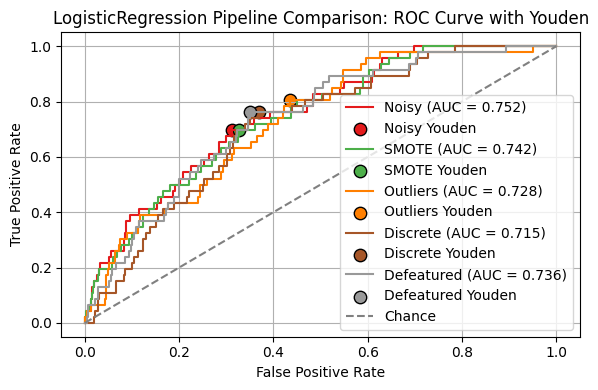

In [86]:
pipelines_report_comparison(candidate_pipeline_steps, lr)
pipelines_roc_comparison(candidate_pipeline_steps, lr)

LogReg Execution Time / Computational Cost: 0.9621 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1554
           1       0.06      0.57      0.11        46

    accuracy                           0.75      1600
   macro avg       0.52      0.66      0.48      1600
weighted avg       0.96      0.75      0.83      1600

------------------------------------------------------------
AUC-ROC Score: 0.7520
------------------------------------------------------------
Positive Predictive Value:  6.36%


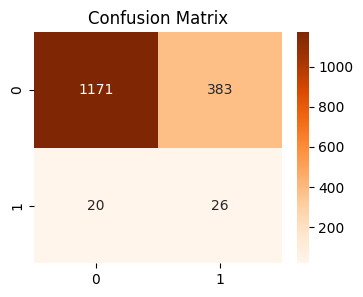

In [87]:
# Using the best pipeline, train model & predict
lr_pipe = ImbPipeline(noisy_steps + [('classifier', lr)])
lr_model_trained = lr_pipe.fit(X_train, y_train)

start_time = time.time()
lr_prediction = lr_model_trained.predict(X_test)
lr_execution_time = time.time() - start_time

# Print the results
print(f"LogReg Execution Time / Computational Cost: {lr_execution_time:.4f} seconds")
print('-'*60)
print(classification_report(y_test, lr_prediction))
print('-'*60)
print_auc_minority_score(lr_model_trained, X_test, y_test)
print('-'*60)
plot_confusion_matrix(y_test, lr_prediction)


The Logistic Regression model catches class 1's, which helps with recall, but at the cost of precision and overall accuracy. Traditionally, for credit scoring models false negatives are more costly than false positives, and the model is effective, catching more than half (0.57) of the minority class positives.   

## 6.2 SVM Model
_____________________________

Support Vector Machines (SVM), particularly the least squares SVM (LS-SVM) with Gaussian kernel, have consistently demonstrated strong performance in academic studies, especially in handling high-dimensional datasets—often with results comparable to convolutional neural networks (CNNs). However, SVM models typically require advanced feature engineering and resampling strategies to address class imbalance, such as oversampling minority classes or undersampling majority classes.<br>
Among recent innovations in SVM-based credit scoring, Tian et al. (2024) introduced a fuzzy homocentric quadratic surfaces and large margin (FHQSLM) approach, which enhances decision boundaries in imbalanced datasets. Another promising direction is the semi-supervised SVM (‘3SVM’) with reject inference proposed by Shen et al. (2022), which integrates information from rejected applicants to improve model generalizability and mitigate sample selection bias.<br.
We are particularly interested to see how the kernel-free SVC model will perform with the fuzzy logic pipeline.

In [88]:
# Probability parameter is set to false to improve the model's computational performance
svc = SVC(
    kernel = 'linear',  # captures linear relationships
#    kernel = 'rbf',  # captures non-linear relationships
    class_weight = 'balanced',  # the target class values are imbalanced
    probability = True
)

# Check model is working
svc_pipe = ImbPipeline(noisy_steps + [('classifier', svc)])
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                ('feature_encoding',
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD',
                                                         'occ_code',
                                                         'res_indicator'],
                                            cont_attribs=['CA_02', 'D_01',
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02'])),
                ('classifier',
                 SVC(class_weight='balanced', kernel='linear',
                     probability=True))])

'Noisy' Pipeline:
------------------------------------------------------------
Execution Time: 0.9178 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1554
           1       0.06      0.54      0.11        46

    accuracy                           0.76      1600
   macro avg       0.52      0.65      0.49      1600
weighted avg       0.96      0.76      0.84      1600

'SMOTE' Pipeline:
------------------------------------------------------------
Execution Time: 1.0194 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1554
           1       0.06      0.59      0.11        46

    accuracy                           0.74      1600
   macro avg       0.52      0.67      0.48      1600
weighted avg       0.96      0.74      0.83      1600

'Out

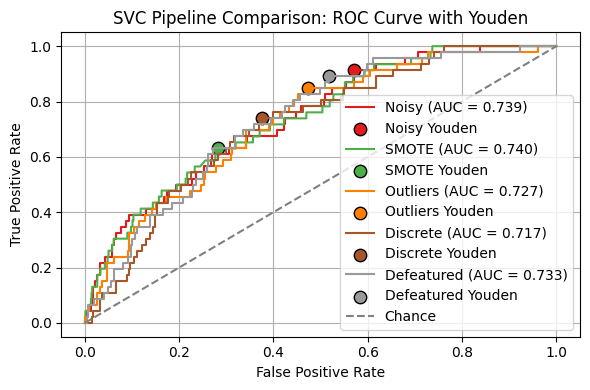

In [89]:
pipelines_report_comparison(candidate_pipeline_steps, svc)
pipelines_roc_comparison(candidate_pipeline_steps, svc)

SVC Execution Time / Computational Cost: 1.1036 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1554
           1       0.06      0.59      0.11        46

    accuracy                           0.74      1600
   macro avg       0.52      0.67      0.48      1600
weighted avg       0.96      0.74      0.83      1600

------------------------------------------------------------
AUC-ROC Score: 0.7400
------------------------------------------------------------
Positive Predictive Value:  6.37%


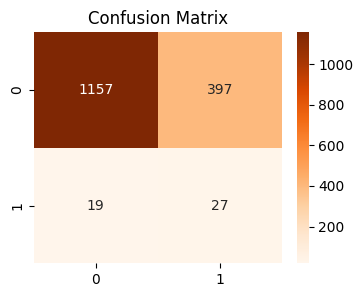

In [90]:
# Run the prediction and record the computation time
svc_pipe = ImbPipeline(smote_steps + [('classifier', svc)])
svc_model_trained = svc_pipe.fit(X_train, y_train)

start_time = time.time()
svc_prediction = svc_model_trained.predict(X_test)
svc_execution_time = time.time() - start_time

# Print the results
print(f"SVC Execution Time / Computational Cost: {svc_execution_time:.4f} seconds")
print('-'*60)
print(classification_report(y_test, svc_prediction))
print('-'*60)
print_auc_minority_score(svc_model_trained, X_test, y_test)
print('-'*60)
plot_confusion_matrix(y_test, svc_prediction)

The SVM model with the SMOTE pipeline generates reasonable results but is computationally expensive.  In contrast to LogReg and XGBoost, SVM has a wide range of complex strategies and techniques which can incrementally improve results. 

## 6.3 KNN Model
_________________________________
KNN is a simple, non-parametric method that classifies data based on the nearest neighbors. It is particularly useful for problems where the decision boundary is not well-defined by linear classifiers.

In [91]:
knn = KNeighborsClassifier(
    n_neighbors = 1, # smaller number better for imbalanced data
    weights = 'distance', # appropriate for imbalanced datasets
    algorithm = 'auto',  # ball_tree also worth trying
    leaf_size = 30,
    p = 1, # handles outliers better than Euclidian distance (p = 2)
    metric = 'minkowski',
    metric_params = None,
    n_jobs = None,
)

knn_pipe = ImbPipeline(noisy_steps + [('classifier', knn)])
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                ('feature_encoding',
                 FeatureEncodingTransformer(cat_attribs=['GOOD', 'BAD',
                                                         'occ_code',
                                                         'res_indicator'],
                                            cont_attribs=['CA_02', 'D_01',
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02'])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'))])

'Noisy' Pipeline:
------------------------------------------------------------
Execution Time: 0.8676 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1554
           1       0.17      0.15      0.16        46

    accuracy                           0.95      1600
   macro avg       0.57      0.57      0.57      1600
weighted avg       0.95      0.95      0.95      1600

'SMOTE' Pipeline:
------------------------------------------------------------
Execution Time: 0.8945 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1554
           1       0.10      0.20      0.13        46

    accuracy                           0.93      1600
   macro avg       0.54      0.57      0.55      1600
weighted avg       0.95      0.93      0.94      1600

'Out

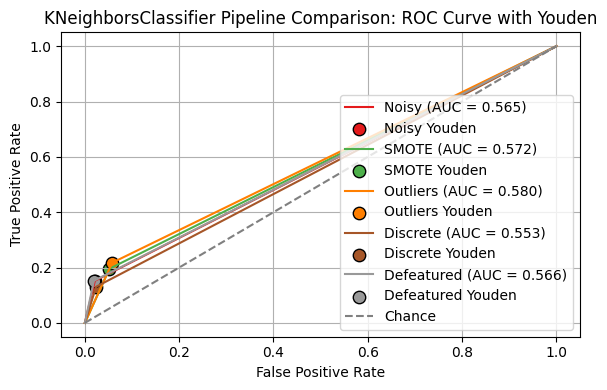

In [92]:
pipelines_report_comparison(candidate_pipeline_steps, knn)
pipelines_roc_comparison(candidate_pipeline_steps, knn)

KNN Execution Time / Computational Cost: 0.8977 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1554
           1       0.10      0.22      0.14        46

    accuracy                           0.92      1600
   macro avg       0.54      0.58      0.55      1600
weighted avg       0.95      0.92      0.94      1600

------------------------------------------------------------
AUC-ROC Score: 0.5797
------------------------------------------------------------
Positive Predictive Value:  10.00%


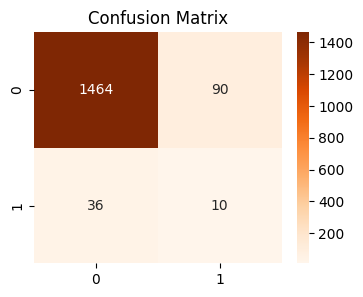

In [94]:
# Run the prediction and record the computation time
knn_pipe = ImbPipeline(outlier_steps + [('classifier', knn)])
knn_model_trained = knn_pipe.fit(X_train, y_train)

start_time = time.time()
knn_prediction = knn_model_trained.predict(X_test)
knn_execution_time = time.time() - start_time

# Print the results
print(f"KNN Execution Time / Computational Cost: {knn_execution_time:.4f} seconds")
print('-'*60)
print(classification_report(y_test, knn_prediction))
print('-'*60)
print_auc_minority_score(knn_model_trained, X_test, y_test)
print('-'*60)
plot_confusion_matrix(y_test, knn_prediction)

The performance of the KNN indicates that it is ovewhelmed by the majority class, achieveing a high accuracy score by classifying everything to the majority class.  This is problematic for a credit scoring model. 

## 6.4 XGBoost Model
___________________________________
XGBoost is a boosting algorithm that builds an ensemble of models iteratively, assigning weights to data instances. Starting with a weak model (e.g., a shallow decision tree), it incrementally develops better models by assigning higher weights to misclassified instances. This iterative process improves predictive performance, particularly for complex datasets

In [95]:
xgb = XGBClassifier(
    objective = 'binary:logistic',
    n_estimators = 100,
    max_depth = 3,
    learning_rate = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    scale_pos_weight = (num_neg / num_pos),
    verbosity = 1,
    random_state = rs
)

# Check pipeline
xgb_pipe = ImbPipeline(noisy_steps + [('classifier', xgb)])
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

'Noisy' Pipeline:
------------------------------------------------------------
Execution Time: 0.8346 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1554
           1       0.09      0.39      0.14        46

    accuracy                           0.87      1600
   macro avg       0.53      0.64      0.54      1600
weighted avg       0.95      0.87      0.91      1600

'SMOTE' Pipeline:
------------------------------------------------------------
Execution Time: 0.8264 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1554
           1       0.06      0.65      0.11        46

    accuracy                           0.70      1600
   macro avg       0.52      0.68      0.47      1600
weighted avg       0.96      0.70      0.80      1600

'Out

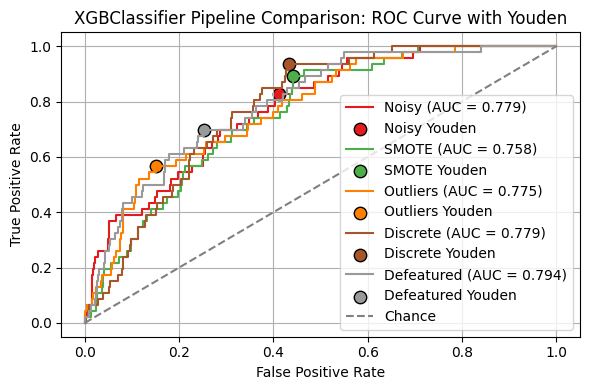

In [96]:
pipelines_report_comparison(candidate_pipeline_steps, xgb)
pipelines_roc_comparison(candidate_pipeline_steps, xgb)

XGBoost Execution Time / Computational Cost: 0.4060 seconds
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1554
           1       0.09      0.50      0.15        46

    accuracy                           0.83      1600
   macro avg       0.53      0.67      0.53      1600
weighted avg       0.96      0.83      0.89      1600

------------------------------------------------------------
AUC-ROC Score: 0.7937
------------------------------------------------------------
Positive Predictive Value:  8.68%


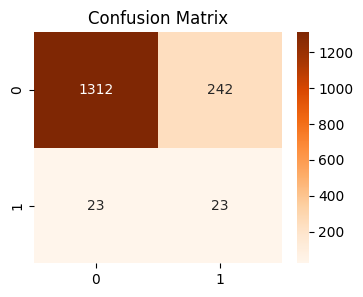

In [97]:
# Run the prediction and record computation time
xgb_pipe = ImbPipeline(defeatured_steps + [('classifier', xgb)])
xgb_model_trained = xgb_pipe.fit(X_train, y_train)

start_time = time.time()
xgb_prediction = xgb_model_trained.predict(X_test)
xgb_execution_time = time.time() - start_time

# Print the results
print(f"XGBoost Execution Time / Computational Cost: {xgb_execution_time:.4f} seconds")
print('-'*60)
print(classification_report(y_test, xgb_prediction))
print('-'*60)
print_auc_minority_score(xgb_model_trained, X_test, y_test)
print('-'*60)
plot_confusion_matrix(y_test, xgb_prediction)


The XGBoost model outperforms all the other models on practially every metric.

## 6.5  Comparative Evaluation of Models

###  6.5.1  Pipeline & Model Leaderboard

In [98]:
results_df = pd.DataFrame(auc_results_log)
results_df = results_df.sort_values('auc', ascending = False)
print(results_df)

                   model    pipeline       auc
19         XGBClassifier  Defeatured  0.793744
18         XGBClassifier    Discrete  0.779139
15         XGBClassifier       Noisy  0.779013
17         XGBClassifier    Outliers  0.775125
16         XGBClassifier       SMOTE  0.757666
0     LogisticRegression       Noisy  0.752042
1     LogisticRegression       SMOTE  0.742278
6                    SVC       SMOTE  0.740019
5                    SVC       Noisy  0.738641
4     LogisticRegression  Defeatured  0.735857
9                    SVC  Defeatured  0.732709
2     LogisticRegression    Outliers  0.728359
7                    SVC    Outliers  0.727100
8                    SVC    Discrete  0.716930
3     LogisticRegression    Discrete  0.714775
12  KNeighborsClassifier    Outliers  0.579738
11  KNeighborsClassifier       SMOTE  0.571764
14  KNeighborsClassifier  Defeatured  0.566434
10  KNeighborsClassifier       Noisy  0.565469
13  KNeighborsClassifier    Discrete  0.553313


In [99]:
# Print report
print("MODEL ACCURACY & COMPUTATIONAL EFFICIENCY")
print('-' * 50)

# Create lists of models
model_names = ["Logistic Regression", "SVC", "KNN", "XGBoost"]
model_execution = [lr_execution_time, svc_execution_time, knn_execution_time, xgb_execution_time]
model_preds = [lr_prediction, svc_prediction, knn_prediction, xgb_prediction]

# Populate accuracy results list
model_accuracy = [round(balanced_accuracy_score(y_test, pred), 4) for pred in model_preds]

# Populate F1 scores list
f1_scores = [round(f1_score(y_test, pred, average = "weighted"), 4) for pred in model_preds]

# Convert lists to DataFrame
model_performance = pd.DataFrame({
    "Model": model_names,
    "F1 Scores": f1_scores,
    "Balanced Accuracy": model_accuracy,
    "Execution Time (seconds)": model_execution
})

# Sort results by F1 Score
model_performance = model_performance.sort_values('Balanced Accuracy', ascending = False)

# Present results
model_performance


MODEL ACCURACY & COMPUTATIONAL EFFICIENCY
--------------------------------------------------


Model  F1 Scores  Balanced Accuracy  Execution Time (seconds)
3              XGBoost     0.8864             0.6721                  0.406046
1                  SVC     0.8266             0.6657                  1.103615
0  Logistic Regression     0.8319             0.6594                  0.962137
2                  KNN     0.9351             0.5797                  0.897747

### 6.5.2 Simple Cross-Validation

In [100]:
# Define pipelines instead of raw models
model_pipelines = {
    'Logistic Regression': lr_model_trained,
    'Support Vector Classifier': svc_model_trained,
    'K-Nearest Neighbors': knn_model_trained,
    'XGBoost': xgb_model_trained
}

# Settings for CV
cv = StratifiedKFold(
    n_splits = 5,
    shuffle = True,
    random_state = rs
    )

# Capture results
results = {}

# Build the CV loop
for model_name, model_pipeline in model_pipelines.items():
    start_time = time.time()

    scores = cross_val_score(model_pipeline,
                             X_train,
                             y_train,
                             cv=cv,
                             scoring='f1',
                             error_score='raise',
                             verbose = 2
                             )
    execution_time = round(time.time() - start_time, 4)

    model_pipeline.fit(X_train, y_train)
    model_pred = model_pipeline.predict(X_test)

    results[model_name] = {
        'Execution Time': execution_time,
        'Cross-Validation F1': scores.mean(),
        'Accuracy': accuracy_score(y_test, model_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, model_pred),
        'Precision (Minority)': precision_score(y_test, model_pred, pos_label=1, average='binary'),
        'Recall (Minority)': recall_score(y_test, model_pred, pos_label=1, average='binary'),
        'F1 Score (Minority)': f1_score(y_test, model_pred, pos_label=1, average='binary'),
    }

print("Cross Validation completed")


[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=  36.8s
[CV] END .................................................... total time=  27.2s
[CV] END .................................................... total time=  26.0s
[CV] END .................................................... total time=  31.6s
[CV] END .................................................... total time=  37.6s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   2.9s
[CV] END ...................

### 6.5.3  Final Results
Our selection of models depends on their performance on not just one metric but their overall performance on multiple  metrics:  F1, F1 minority, Precision, Recall and Balalnced Accuracy.

In [101]:
# Assign CV results to a dataframe & view
df_results = pd.DataFrame.from_dict(results, orient = 'index')
df_results = df_results.sort_values('Balanced Accuracy', ascending = False).round(2)
df_results

Execution Time  Cross-Validation F1  Accuracy  \
XGBoost                              8.16                 0.19      0.83   
Support Vector Classifier          159.66                 0.14      0.74   
Logistic Regression                 15.09                 0.13      0.75   
K-Nearest Neighbors                 16.32                 0.12      0.92   

                           Balanced Accuracy  Precision (Minority)  \
XGBoost                                 0.67                  0.09   
Support Vector Classifier               0.67                  0.06   
Logistic Regression                     0.66                  0.06   
K-Nearest Neighbors                     0.58                  0.10   

                           Recall (Minority)  F1 Score (Minority)  
XGBoost                                 0.50                 0.15  
Support Vector Classifier               0.59                 0.11  
Logistic Regression                     0.57                 0.11  
K-Nearest Neighbors                     0.22                 0.14

Positive Predictive Value:  6.36%


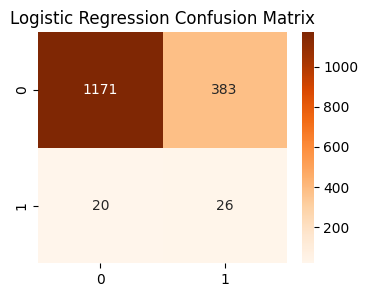

Positive Predictive Value:  6.37%


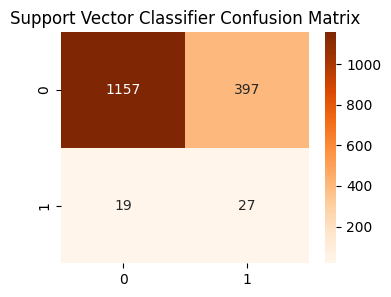

Positive Predictive Value:  10.00%


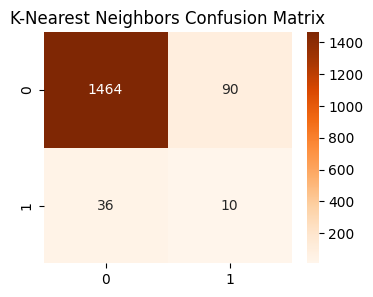

Positive Predictive Value:  8.68%


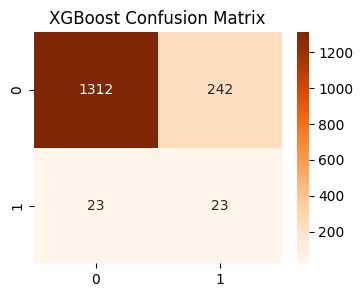

In [102]:
for model_name, model_pipeline in model_pipelines.items():
    y_pred = model_pipeline.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, title=f"{model_name} Confusion Matrix")

# 7. Tuning Preferred Models
_____________________________________________________

While individual models score better or worse in specific metrics, the Logistic Regression and XGBoost models significantly outperformed KNN and SVC in overall metrics for performance, which are crucial for credit risk classification. While SVC showed decent overall metrics, it failed to adequately detect minority-class instances — a critical shortfall in credit scoring contexts where false negatives carry high costs. Therefore, we will proceed with tuning **Logistic Regression** and **XGBoost** to identify the model best suited for XYZ Bank’s deployment needs.

## 7.1  RandomizedSearchCV

### 7.1.1  Logistic Regression Model

The key parameters taht we explore are:
*  Regularization strength
*  Penalty types
*  Solvers
*  Maximum iterations for optimization
*  Whether to include intercept
*  Class weight for imbalanced classes
*  Only used with elasticnet penalty
*  Whether to reuse the previous solution
*  Use balanced accuracy for refitting
*  Parallel execution for efficiency


In [103]:
# Parameter distribution for RandomizedSearchCV
lr_param_distribution = {
    'classifier__C': loguniform(1e-4, 1e2),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__fit_intercept': [True, False],
    'classifier__class_weight': ['balanced', None],
    'classifier__l1_ratio': [0.1, 0.5, 0.9],
    'classifier__warm_start': [True, False]
}

# Scoring metrics for cross-validation
lr_scoring = {
    'f1': 'f1',
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Setup RandomizedSearchCV with the extended parameter distribution
lr_RandomCV = RandomizedSearchCV(
    lr_pipe,
    param_distributions = lr_param_distribution,
    n_iter = 25,
    scoring = lr_scoring,
    cv = StratifiedKFold(
        n_splits = 5,
        shuffle = True,
        random_state = rs
    ),
    random_state = rs,
    refit = 'balanced_accuracy',
    verbose = 1,
    n_jobs = -1
)

lr_RandomCV_model = lr_RandomCV.fit(X_train, y_train)

print("Best Parameters:", lr_RandomCV_model.best_params_)
print("Best Balanced Accuracy Score:", lr_RandomCV_model.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'classifier__C': np.float64(0.017670169402947963), 'classifier__class_weight': 'balanced', 'classifier__fit_intercept': True, 'classifier__l1_ratio': 0.9, 'classifier__max_iter': 500, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'classifier__warm_start': True}
Best Balanced Accuracy Score: 0.7088876242012064


In [104]:
# Run the cross validation
lr_rcv_results = pd.DataFrame(lr_RandomCV_model.cv_results_)

# Access the correct column names
lr_rcv = lr_rcv_results[[
    'mean_fit_time',
    'mean_score_time',
    'mean_test_f1',
    'std_test_f1',
    'mean_test_balanced_accuracy',
    'std_test_balanced_accuracy'
]].sort_values(by = 'mean_test_f1', ascending = False)

lr_rcv.head(10)

mean_fit_time  mean_score_time  mean_test_f1  std_test_f1  \
0       47.760665         3.685418      0.133410     0.010393   
7       16.724485         4.421282      0.131774     0.005989   
1       48.590806         4.099440      0.104985     0.007197   
21      13.882811         3.683895      0.091517     0.006883   
16      13.915021         3.823800      0.090893     0.004878   
24      10.831375         1.439364      0.087705     0.005516   
13      14.179726         3.474394      0.079787     0.006342   
20      13.915725         3.628072      0.030282     0.024757   
12      16.204876         3.386355      0.020783     0.025457   
10      16.637095         3.340541      0.020526     0.025153   

    mean_test_balanced_accuracy  std_test_balanced_accuracy  
0                      0.708888                    0.025123  
7                      0.704201                    0.020240  
1                      0.690602                    0.025973  
21                     0.666621                    0.030852  
16                     0.668729                    0.019623  
24                     0.647903                    0.026353  
13                     0.635243                    0.030188  
20                     0.507464                    0.006600  
12                     0.504842                    0.006922  
10                     0.504681                    0.006894

In [105]:
best_lr_model = lr_RandomCV_model.best_estimator_
best_lr_model

Pipeline(steps=[('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'D_01', 'D_02',
                                                      'ER_01', 'ER_02', 'I_01',
                                                      'I_02', 'I_03', 'I_04',
                                                      'I_05', 'I_06', 'P_01',
                                                      'S_01', 'cust_age',
                                                      'disp_income',
                                                      'time_emp'],
                                         ord_attribs=['CA_03', 'S_02'])),
                ('knn_imputer',
                 KNNImputerTransformer(cont_attribs=['CA_02', 'D_01', 'D_02',
                                                     'ER_...
                                                          'D_02', 'ER_01',
                                                          'ER_02', 'I_01',
                                                          'I_02', 'I_03',
                                                          'I_04', 'I_05',
                                                          'I_06', 'P_01',
                                                          'S_01', 'cust_age',
                                                          'disp_income',
                                                          'time_emp'],
                                            ord_attribs=['CA_03', 'S_02'])),
                ('classifier',
                 LogisticRegression(C=np.float64(0.017670169402947963),
                                    class_weight='balanced', l1_ratio=0.9,
                                    max_iter=500, multi_class='ovr',
                                    penalty='l1', random_state=42,
                                    solver='liblinear', warm_start=True))])

In [106]:
lr_proba = lr_model_trained.predict_proba(X_test)[:, 1]
lr_precisions, lr_recalls, lr_thresholds = precision_recall_curve(y_test, lr_proba)

xgb_proba = xgb_model_trained.predict_proba(X_test)[:, 1]
xgb_precisions, xgb_recalls, xgb_thresholds = precision_recall_curve(y_test, xgb_proba)

print("Done")

Done


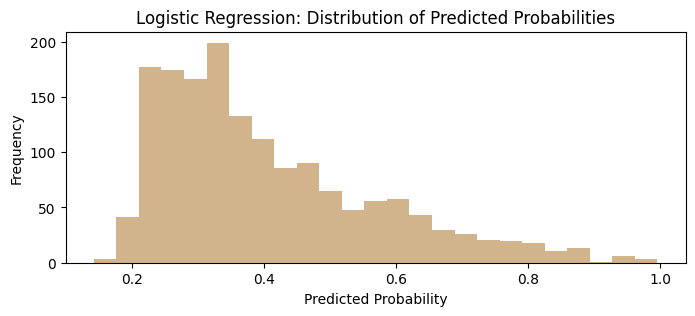

In [107]:
# Evalaute performance with pred_proba
best_lr_proba = best_lr_model.predict_proba(X_test)[:, 1]
plt.figure(figsize = (8, 3))
plt.hist(best_lr_proba, bins = 25, color = 'tan')
plt.title("Logistic Regression: Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

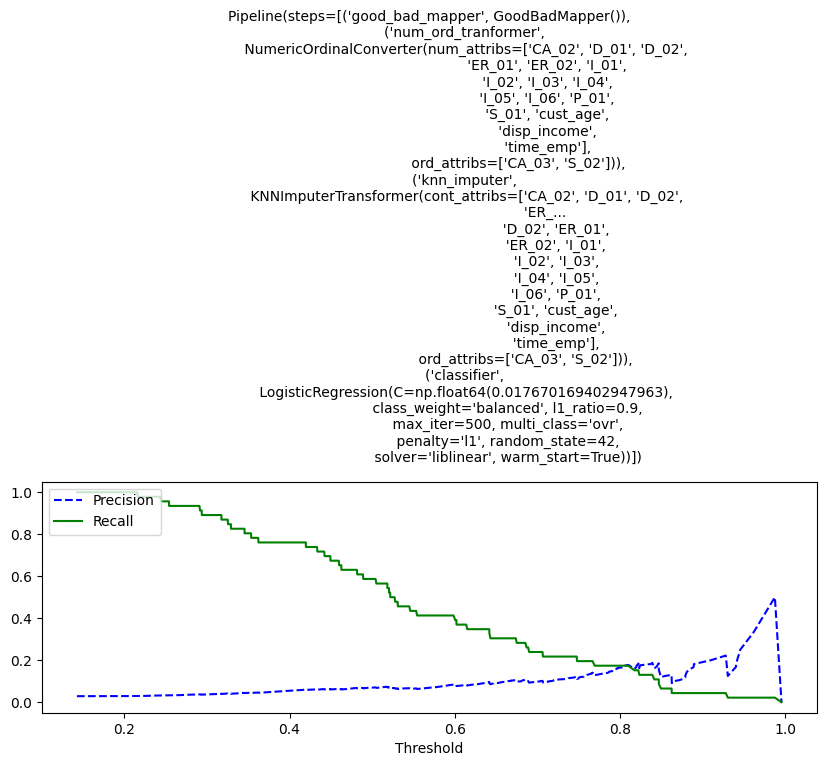

In [108]:
precision_recall_trade_off(best_lr_model, X_test, y_test)

In [109]:
# Get precision & recall arrays and probability thresholds
lr_precisions, lr_recalls, lr_thresholds = precision_recall_curve(y_test, lr_proba)
lr_f1_score = 2 * (lr_precisions * lr_recalls) / (lr_precisions + lr_recalls + 1e-6)

# Find the threshold with the best F1 score
best_lr_threshold_index = lr_f1_score.argmax()
optimal_lr_threshold = lr_thresholds[best_lr_threshold_index]
best_f1_lr = lr_f1_score[best_lr_threshold_index]

print(f"Best threshold: {optimal_lr_threshold:.4f}")
print(f"Best F1 Score at threshold: {best_f1_lr:.4f}")

Best threshold: 0.8162
Best F1 Score at threshold: 0.1905


In [110]:
y_pred_best_lr = (best_lr_proba >= optimal_lr_threshold).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_lr):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_best_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_lr):.4f}")


Accuracy: 0.9525
Balanced Accuracy: 0.5642
Precision: 0.1591
Recall: 0.1522
F1 Score: 0.1556


In [111]:
# Compare tuned v. untuned Recall performance
untuned_preds = lr_pipe.predict_proba(X_test)[:, 1] >= 0.5
tuned_preds = best_lr_model.predict_proba(X_test)[:, 1] >= 0.5

print("Untuned Recall:", recall_score(y_test, untuned_preds))
print("Tuned Recall:", recall_score(y_test, tuned_preds))


Untuned Recall: 0.5652173913043478
Tuned Recall: 0.5869565217391305


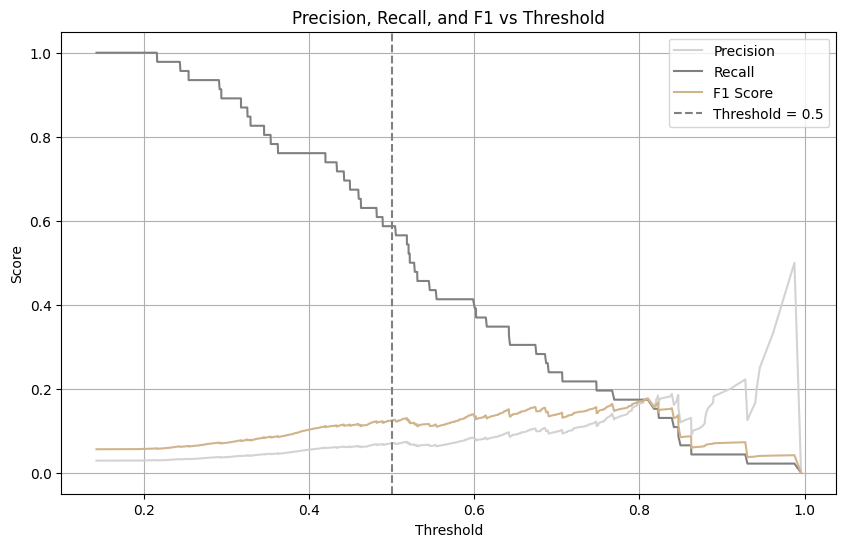

In [112]:
# Get precision, recall, and thresholds
lr_best_precision, lr_best_recall, lr_best_thresholds = precision_recall_curve(y_test, best_lr_proba)

# Compute F1 score at each threshold
best_lr_f1_score = 2 * (lr_best_precision * lr_best_recall) / (lr_best_precision + lr_best_recall + 1e-8)

# Plot everything
plt.figure(figsize = (10, 6))
plt.plot(lr_best_thresholds, lr_best_precision[:-1], label = "Precision", color = 'lightgrey')
plt.plot(lr_best_thresholds, lr_best_recall[:-1], label = "Recall", color = 'grey')
plt.plot(lr_best_thresholds, best_lr_f1_score[:-1], label = "F1 Score", color = 'tan')
plt.axvline(x = 0.5, color = 'gray', linestyle = '--', label = 'Threshold = 0.5')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


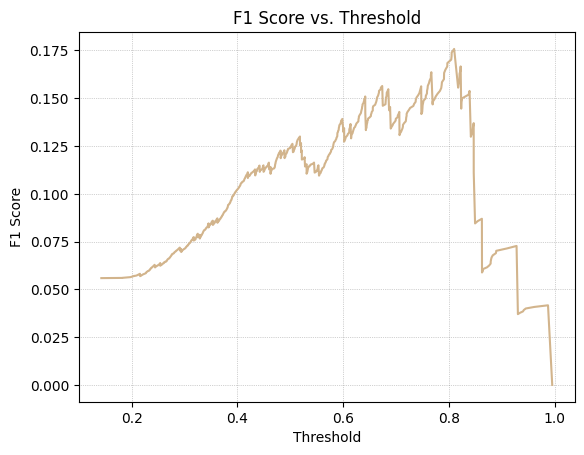

In [113]:
plt.plot(lr_best_thresholds, best_lr_f1_score[:-1], color = 'tan')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.grid(
    True,
    which = 'both',
    axis = 'both',
    linestyle = 'dotted',
    linewidth = 0.5,
    color = 'gray',
    alpha = 0.7)
plt.show()

Optimal Threshold: 0.3838
Precision at Threshold: 0.050359712230215826
Recall at Threshold: 0.7608695652173914
F1 Score at Threshold: 0.09446693657219973
Confusion Matrix: 
[[894 660]
 [ 11  35]]


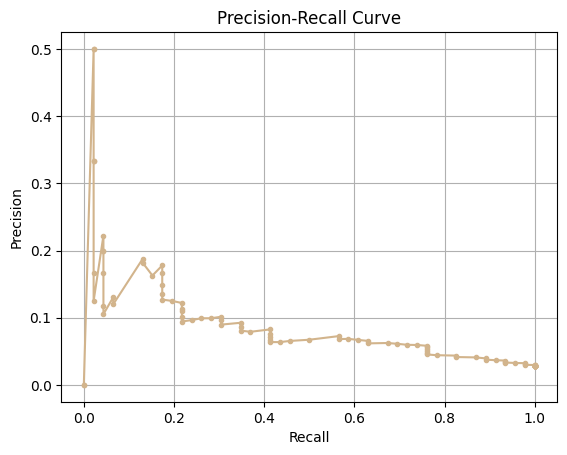

In [114]:

# Find the threshold for desired precision
lr_target_thresholds = np.linspace(0, 1, 100)
lr_target_precisions = []
lr_target_recalls = []

# Evaluate precision and recall for each threshold
for threshold in lr_target_thresholds:
    y_pred_thres = (best_lr_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thres)
    recall = recall_score(y_test, y_pred_thres)
    lr_target_precisions.append(precision)
    lr_target_recalls.append(recall)

# Convert to arrays for easier manipulation
lr_precisions_arr = np.array(lr_target_precisions)
lr_recalls_arr = np.array(lr_target_recalls)

# Find the threshold where precision is above 0.05 and recall is maximized
minimum_lr_precision = 0.05
lr_thresholds_above_hurdle = lr_target_thresholds[lr_precisions_arr >= minimum_lr_precision]
lr_recalls_above_hurdle = lr_recalls_arr[lr_precisions_arr >= minimum_lr_precision]
lr_optimal_threshold_above_hurdle = lr_thresholds_above_hurdle[np.argmax(lr_recalls_above_hurdle)]

# Apply the optimal threshold to make predictions
y_pred_optimal_above_hurdle = (best_lr_proba >= lr_optimal_threshold_above_hurdle).astype(int)

# Print metrics for the optimal threshold
print(f"Optimal Threshold: {lr_optimal_threshold_above_hurdle:.4f}")
print(f"Precision at Threshold: {precision_score(y_test, y_pred_optimal_above_hurdle)}")
print(f"Recall at Threshold: {recall_score(y_test, y_pred_optimal_above_hurdle)}")
print(f"F1 Score at Threshold: {f1_score(y_test, y_pred_optimal_above_hurdle)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal_above_hurdle)
print(f"Confusion Matrix: \n{cm}")

# Visualize Precision-Recall Curve
plt.plot(lr_recalls_arr, lr_precisions_arr, marker = fs_value, color = 'tan')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


Positive Predictive Value:  5.04%


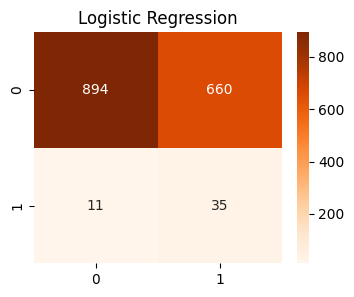

In [115]:
plot_confusion_matrix(y_test, y_pred_optimal_above_hurdle, "Logistic Regression")

### 7.1.2  XGBoost Model
We explore the following parameters:
*   n_estimators:  Increasing the number of trees improves the model performance but can result in overfitting. The range (100, 500) ensures the model should not underfit or too computationally expensive.  
*  max_depth: The depth of individual trees is set to (3, 10) so deep enough to identify patterns and generalize well without getting too exposed to noise.
*  'subsample': uniform(0.6, 0.4),     set to 0.6 to 1.0
*  'classifier__reg_alpha': uniform(0, 1): Helps with L1 regularization
*  'classifier__reg_lambda': uniform(0, 1): Helps with L2 regularization
*  'classifier__scale_pos_weight': [1, 5, 10, 20]:   handle imbalances
*  'classifier__scale_pos_weight': [scale_pos_weight * f for f in [0.5, 1, 1.5, 2]]:  More conservative splits  
*  'classifier__max_delta_step': randint(0, 10)
*    'classifier__scale_pos_weight': [scale_pos_weight * f for f in [0.5, 1, 1.5, 2]]:   Helps with class imbalance
*    'classifier__tree_method': ['hist'], Fast, efficient histogram-based growth
*    'classifier__grow_policy': ['lossguide', 'depthwise']  Split strategy


In [116]:
# Parameter distribution for RandomizedSearchCV
xgb_param_distribution = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__gamma': uniform(0, 5),
    'classifier__reg_alpha': uniform(0, 1),
    'classifier__reg_lambda': uniform(0, 1),
    'classifier__min_child_weight': randint(1, 10),
    'classifier__max_delta_step': randint(0, 10),
    'classifier__scale_pos_weight': [scale_pos_weight * f for f in [0.5, 1, 1.5, 2]],
    'classifier__tree_method': ['hist'],
    'classifier__grow_policy': ['lossguide', 'depthwise']
}

# Scoring metrics for cross-validation
xgb_scoring = {
    'f1': 'f1',
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Setup RandomizedSearchCV with the extended parameter distribution
xgb_RandomCV = RandomizedSearchCV(
    xgb_pipe,
    param_distributions = xgb_param_distribution,
    n_iter = 25,
    scoring = xgb_scoring,
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs),
    random_state = rs,
    refit = 'balanced_accuracy',
    verbose = 1,
    n_jobs = -1
)


xgb_RandomCV_model = xgb_RandomCV.fit(X_train, y_train)
print("Best Balanced Accuracy Score:", xgb_RandomCV_model.best_score_)
xgb_best_params = xgb_RandomCV_model.best_params_
xgb_best_params


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Balanced Accuracy Score: 0.6534034839344575


{'classifier__colsample_bytree': np.float64(0.5753587719827147),
 'classifier__gamma': np.float64(2.5409938837035932),
 'classifier__grow_policy': 'depthwise',
 'classifier__learning_rate': np.float64(0.022232542466429174),
 'classifier__max_delta_step': 3,
 'classifier__max_depth': 6,
 'classifier__min_child_weight': 4,
 'classifier__n_estimators': 445,
 'classifier__reg_alpha': np.float64(0.512093058299281),
 'classifier__reg_lambda': np.float64(0.22649577519793795),
 'classifier__scale_pos_weight': np.float64(67.53260869565217),
 'classifier__subsample': np.float64(0.6384706204365683),
 'classifier__tree_method': 'hist'}

In [117]:
# Run the cross validation
xgb_rcv_results = pd.DataFrame(xgb_RandomCV_model.cv_results_)

# Access the correct column names
xgb_rcv = xgb_rcv_results[[
    'mean_fit_time',
    'mean_score_time',
    'mean_test_f1',
    'std_test_f1',
    'mean_test_balanced_accuracy',
    'std_test_balanced_accuracy'
]].sort_values(by = 'mean_test_f1', ascending = False)

xgb_rcv.head(10)

mean_fit_time  mean_score_time  mean_test_f1  std_test_f1  \
22       6.500323         1.433094      0.215715     0.070322   
23       6.046445         0.810989      0.200125     0.034025   
24       5.860415         0.691944      0.198208     0.053392   
2        8.235861         1.799818      0.197270     0.035739   
17       8.533568         2.128354      0.197045     0.036161   
18       6.859018         1.885232      0.190562     0.046291   
20       6.838273         1.673670      0.186463     0.019927   
21       6.899483         1.904474      0.186388     0.053764   
19       7.426364         1.285959      0.185911     0.054457   
8        7.131590         1.963844      0.183774     0.056811   

    mean_test_balanced_accuracy  std_test_balanced_accuracy  
22                     0.623746                    0.050022  
23                     0.612437                    0.025101  
24                     0.623427                    0.039321  
2                      0.606185                    0.027682  
17                     0.653403                    0.039383  
18                     0.606639                    0.033848  
20                     0.632695                    0.018636  
21                     0.605996                    0.040939  
19                     0.590410                    0.034858  
8                      0.584233                    0.033000

In [118]:
best_xgb_model = xgb_RandomCV_model.best_estimator_
best_xgb_model

Pipeline(steps=[('features_dropped',
                 FeatureRemover(features_to_drop=['I_01', 'disp_income',
                                                  'app_id', 'ER_01', 'occ_code',
                                                  'D_02', 'app_date.1', 'I_05',
                                                  'app_date', 'I_02', 'S_01',
                                                  'P_01', 'D_01', 'time_emp',
                                                  'res_indicator'])),
                ('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'ER_02', 'I_03',
                                                      'I_04', 'I_06',
                                                      'cus...
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.022232542466429174),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=3,
                               max_depth=6, max_leaves=None, min_child_weight=4,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=445,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

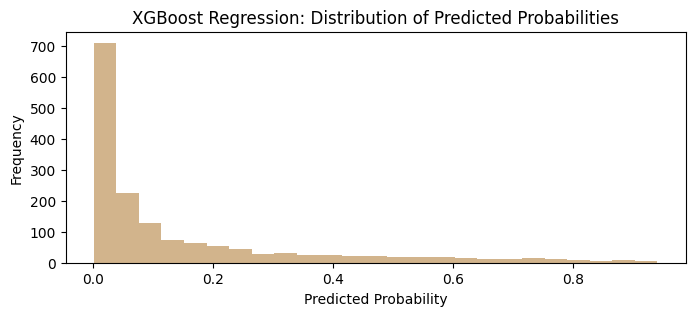

In [119]:
# Evalaute performance with pred_proba
best_xgb_proba = best_xgb_model.predict_proba(X_test)[:, 1]
plt.figure(figsize = (8, 3))
plt.hist(best_xgb_proba, bins = 25, color = 'tan')
plt.title("XGBoost Regression: Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

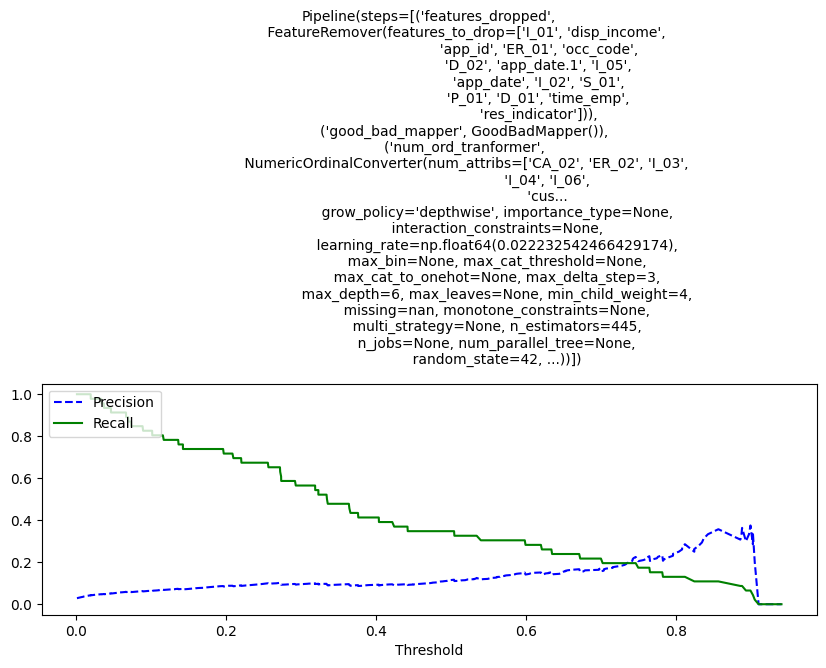

In [120]:
precision_recall_trade_off(best_xgb_model, X_test, y_test)

In [121]:
# Get precision & recall arrays and probability thresholds
xgb_precisions, xgb_recalls, xgb_thresholds = precision_recall_curve(y_test, xgb_proba)
xgb_f1_score = 2 * (xgb_precisions * xgb_recalls) / (xgb_precisions + xgb_recalls + 1e-6)

# Find the threshold with the best F1 score
best_xgb_threshold_index = xgb_f1_score.argmax()
optimal_xgb_threshold = xgb_thresholds[best_xgb_threshold_index]
best_f1_xgb = xgb_f1_score[best_xgb_threshold_index]

print(f"Best threshold: {optimal_xgb_threshold:.4f}")
print(f"Best F1 Score at threshold: {best_f1_xgb:.4f}")

Best threshold: 0.6442
Best F1 Score at threshold: 0.2073


In [122]:
y_pred_best_xgb = (best_xgb_proba >= optimal_xgb_threshold).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_best_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_xgb):.4f}")


Accuracy: 0.9381
Balanced Accuracy: 0.5990
Precision: 0.1467
Recall: 0.2391
F1 Score: 0.1818


In [123]:
# Compare tuned v. untuned Recall performance
xgb_untuned_preds = xgb_pipe.predict_proba(X_test)[:, 1] >= 0.5
xgb_tuned_preds = best_xgb_model.predict_proba(X_test)[:, 1] >= 0.5

print("Untuned Recall:", recall_score(y_test, xgb_untuned_preds))
print("Tuned Recall:", recall_score(y_test, xgb_tuned_preds))


Untuned Recall: 0.5
Tuned Recall: 0.34782608695652173


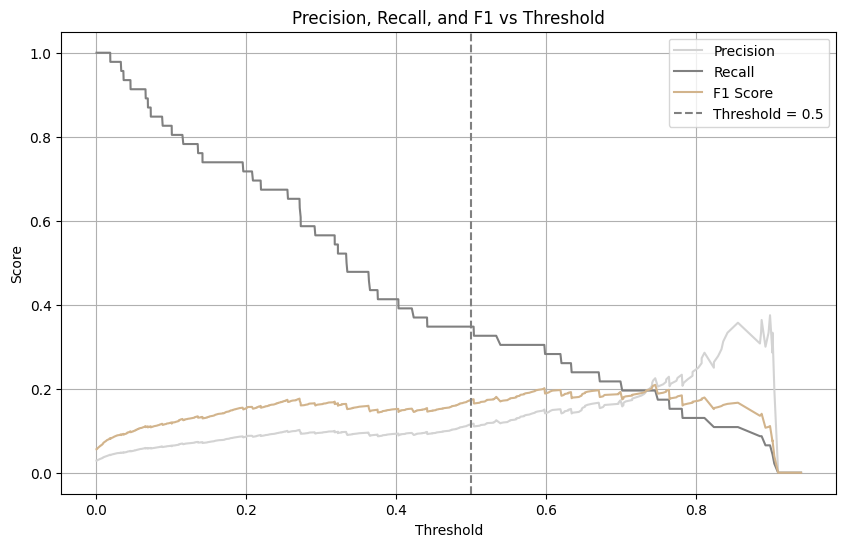

In [124]:
# Get precision, recall, and thresholds
xgb_best_precision, xgb_best_recall, xgb_best_thresholds = precision_recall_curve(y_test, best_xgb_proba)

# Compute F1 score at each threshold
best_xgb_f1_score = 2 * (xgb_best_precision * xgb_best_recall) / (xgb_best_precision + xgb_best_recall + 1e-8)

# Plot everything
plt.figure(figsize = (10, 6))
plt.plot(xgb_best_thresholds, xgb_best_precision[:-1], label = "Precision", color = 'lightgrey')
plt.plot(xgb_best_thresholds, xgb_best_recall[:-1], label = "Recall", color = 'grey')
plt.plot(xgb_best_thresholds, best_xgb_f1_score[:-1], label = "F1 Score", color = 'tan')
plt.axvline(x = 0.5, color = 'gray', linestyle = '--', label = 'Threshold = 0.5')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [125]:
# # F1 plot
# plt.plot(xgb_best_thresholds, best_xgb_f1_score[:-1], color = 'tan')
# plt.xlabel('Threshold')
# plt.ylabel('F1 Score')
# plt.title('F1 Score vs. Threshold')
# plt.grid(
#     True,
#     which = 'both',
#     axis = 'both',
#     linestyle = 'dotted',
#     linewidth = 0.5,
#     color = 'gray',
#     alpha = 0.7)
# plt.show()

Optimal Threshold: 0.1313
Precision at Threshold: 0.050359712230215826
Recall at Threshold: 0.7608695652173914
F1 Score at Threshold: 0.09446693657219973
Confusion Matrix: 
[[894 660]
 [ 11  35]]


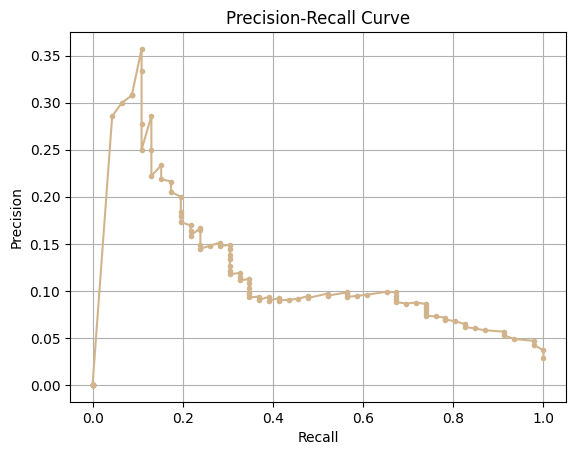

In [126]:

# Find the threshold for desired precision
xgb_target_thresholds = np.linspace(0, 1, 100)
xgb_target_precisions = []
xgb_target_recalls = []

# Evaluate precision and recall for each threshold
for threshold in xgb_target_thresholds:
    y_pred_thres = (best_xgb_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thres)
    recall = recall_score(y_test, y_pred_thres)
    xgb_target_precisions.append(precision)
    xgb_target_recalls.append(recall)

# Convert to arrays for easier manipulation
xgb_precisions_arr = np.array(xgb_target_precisions)
xgb_recalls_arr = np.array(xgb_target_recalls)

# Find the threshold where precision is above 0.05 and recall is maximized
minimum_xgb_precision = 0.07
xgb_thresholds_above_hurdle = xgb_target_thresholds[xgb_precisions_arr >= minimum_xgb_precision]
xgb_recalls_above_hurdle = xgb_recalls_arr[xgb_precisions_arr >= minimum_xgb_precision]
xgb_optimal_threshold_above_hurdle = xgb_thresholds_above_hurdle[np.argmax(xgb_recalls_above_hurdle)]

# Apply the optimal threshold to make predictions
xgb_pred_optimal_above_hurdle = (best_xgb_proba >= xgb_optimal_threshold_above_hurdle).astype(int)

# Print metrics for the optimal threshold
print(f"Optimal Threshold: {xgb_optimal_threshold_above_hurdle:.4f}")
print(f"Precision at Threshold: {precision_score(y_test, y_pred_optimal_above_hurdle)}")
print(f"Recall at Threshold: {recall_score(y_test, y_pred_optimal_above_hurdle)}")
print(f"F1 Score at Threshold: {f1_score(y_test, y_pred_optimal_above_hurdle)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal_above_hurdle)
print(f"Confusion Matrix: \n{cm}")

# Visualize Precision-Recall Curve
plt.plot(xgb_recalls_arr, xgb_precisions_arr, marker = fs_value, color = 'tan')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


Positive Predictive Value:  7.16%


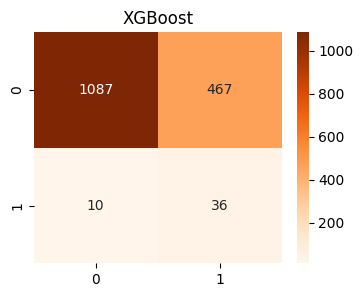

In [127]:
plot_confusion_matrix(y_test, xgb_pred_optimal_above_hurdle, "XGBoost")

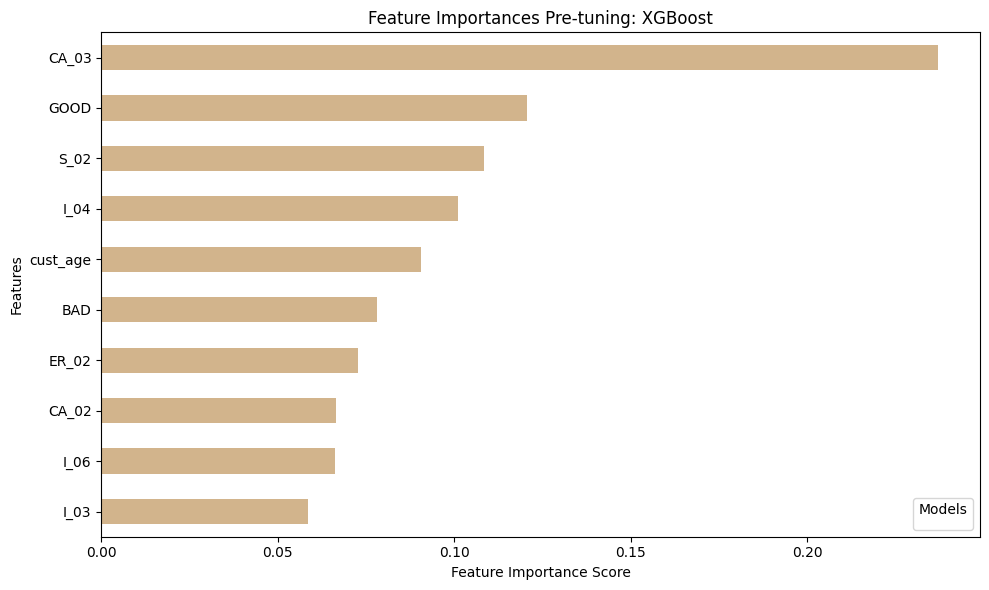

In [128]:
# View importances
index_cols = xgb.get_booster().feature_names
xgb_importances = pd.Series(xgb.feature_importances_, index = index_cols)
xgb_importances = xgb_importances.sort_values(ascending = True)
xgb_importances.plot(kind = 'barh', figsize = (10, 6), color = 'tan')
plt.title("Feature Importances Pre-tuning: XGBoost")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.legend(title = "Models")
plt.tight_layout()
plt.show()


## 7.2 Results & Optimization with Youden

In [129]:
# Get the best model & make predictions on preprocessed data
y_pred_lr_rs = best_lr_model.predict(X_test)
lr_roc_auc_best = roc_auc_score(y_test, y_pred_lr_rs)

# Calculate and print test set metrics using the best model
lr_train_set_accuracy = lr_RandomCV.score(X_train, y_train)
test_balanced_accuracy_lr = balanced_accuracy_score(y_test, y_pred_lr_rs)
test_f1_lr = f1_score(y_test, y_pred_lr_rs)

# Get the best model & make predictions on preprocessed data
y_pred_xgb_rs = best_xgb_model.predict(X_test)
xgb_roc_auc_best = roc_auc_score(y_test, y_pred_xgb_rs)

# Calculate and print test set metrics using the best model
xgb_train_set_accuracy = xgb_RandomCV.score(X_train, y_train)
test_balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb_rs)
test_f1_xgb = f1_score(y_test, y_pred_xgb_rs)


--------------------------------------------------
Logistic Regression RandomizedSearchCV
--------------------------------------------------
Train Set Accuracy: 0.73
Test Set Balanced Accuracy (LogReg Best Model): 0.68
Test Set F1 Score (LogReg Best Model): 0.12
--------------------------------------------------
Area under the ROC curve: 0.729268
Optimal Threshold (Youden's J): 0.4197
Sensitivity (TPR) at Optimal Threshold: 0.7609
Specificity (1-FPR) at Optimal Threshold: 0.6474


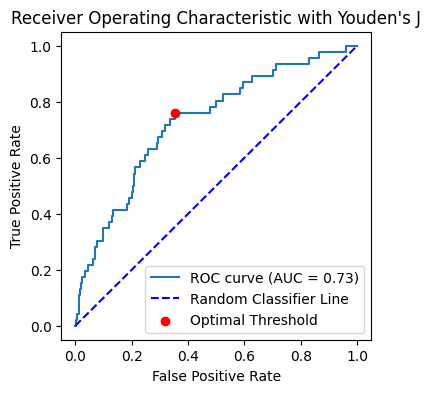

--------------------------------------------------
XGBoost_RandomizedSearchCV
--------------------------------------------------
Train Set Accuracy: 0.97
Test Set Balanced Accuracy (XGB Best Model): 0.63
Test Set F1 Score (XGB Best Model): 0.17
--------------------------------------------------
Area under the ROC curve: 0.816434
Optimal Threshold (Youden's J): 0.1958
Sensitivity (TPR) at Optimal Threshold: 0.7391
Specificity (1-FPR) at Optimal Threshold: 0.7690


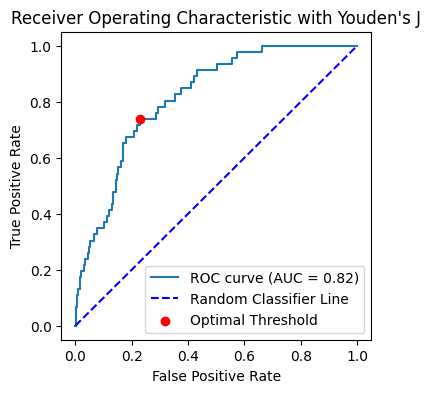

np.float32(0.19577381)

In [130]:
# Print the evaluation results
print('-'*50)
print('Logistic Regression RandomizedSearchCV')
print('-'*50)
print(f"Train Set Accuracy: {lr_train_set_accuracy:.2f}")
print(f"Test Set Balanced Accuracy (LogReg Best Model): {test_balanced_accuracy_lr:.2}")
print(f"Test Set F1 Score (LogReg Best Model): {test_f1_lr:.2f}")
print('-'*50)
evaluation_metric_with_youden(best_lr_model, X_test, y_test)

print('-'*50)
print('XGBoost_RandomizedSearchCV')
print('-'*50)
print(f"Train Set Accuracy: {xgb_train_set_accuracy:.2f}")
print(f"Test Set Balanced Accuracy (XGB Best Model): {test_balanced_accuracy_xgb:.2}")
print(f"Test Set F1 Score (XGB Best Model): {test_f1_xgb:.2f}")
print('-'*50)
evaluation_metric_with_youden(best_xgb_model, X_test, y_test)


# 8. Calibration of Models
_________________________________________

## 8.1  Pre-Calibration Distributions

In [131]:
lr_proba = lr_model_trained.predict_proba(X_test)[:, 1]
lr_precisions, lr_recalls, lr_thresholds = precision_recall_curve(y_test, lr_proba)

xgb_proba = xgb_model_trained.predict_proba(X_test)[:, 1]
xgb_precisions, xgb_recalls, xgb_thresholds = precision_recall_curve(y_test, xgb_proba)

print("Done")

Done


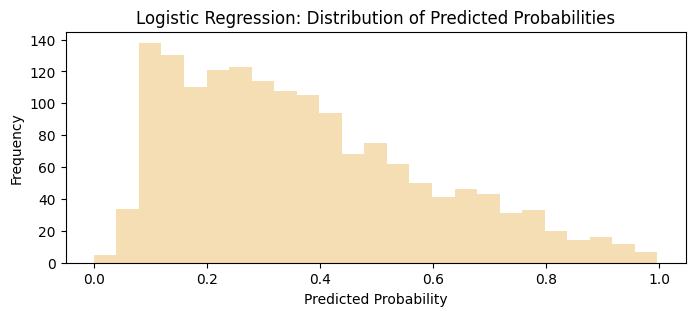

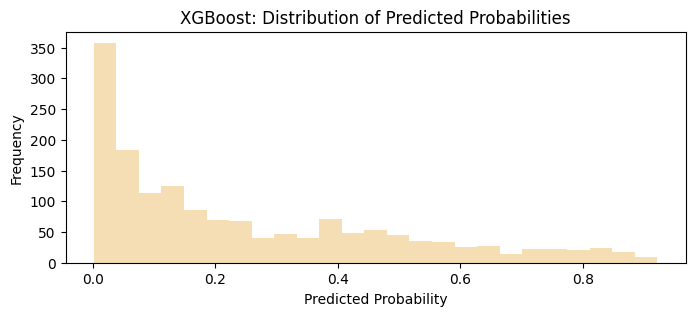

In [132]:
# Models and predicted probabilities
model_probas = {
    'Logistic Regression': lr_proba,
    'XGBoost': xgb_proba
}

# Histograms for models
for model_name, probas in model_probas.items():
    plt.figure(figsize = (8, 3))
    plt.hist(probas, bins = 25, color = 'wheat')
    plt.title(f"{model_name}: Distribution of Predicted Probabilities")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()


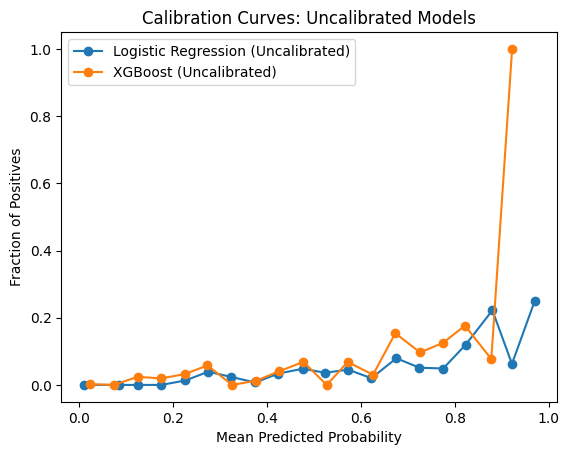

In [133]:
# Visualize proba's distribution on calibration curve
lr_prob_true, lr_prob_pred = calibration_curve(y_test, lr_proba, n_bins = 20)
xgb_prob_true, xgb_prob_pred = calibration_curve(y_test, xgb_proba, n_bins = 20)
plt.plot(lr_prob_pred, lr_prob_true, marker = 'o', label = 'Logistic Regression (Uncalibrated)')
plt.plot(xgb_prob_pred, xgb_prob_true, marker = 'o', label = 'XGBoost (Uncalibrated)')
plt.title("Calibration Curves: Uncalibrated Models")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.show()


## 8.2 Calibration of Models

Calibration adjusts probabilities to match true liklihoods using Platt's scaling/Isotonic models but can cause overfitting.  In the cases of models built using SMOTE where that the dataset is articficially balanced, there is the additional risk that calibration distorts the probabilities. After RaondomizedSearch, our models are performing satisfactorily so in the event that calibration is unable to improve results, we can rely on these models at the Youden optimal threshold.

Calibrating the models

In [134]:
# isotonoic calibration
lr_calibrated_model = CalibratedClassifierCV(lr_pipe, method = 'isotonic', cv = 'prefit')
# Platts calibration 
# lr_calibrated_model = CalibratedClassifierCV(lr_pipe, method = 'sigmoid', cv = prefit)
lr_calibrated_model.fit(X_train, y_train)
lr_calibrated_probs = lr_calibrated_model.predict_proba(X_test)[:,-1]
lr_calibrated_prob_true, lr_calibrated_prob_pred = calibration_curve(y_test, lr_calibrated_probs, n_bins = 20)

xgb_calibrated_model = CalibratedClassifierCV(xgb_pipe, method = 'isotonic', cv = 'prefit')
# xgb_calibrated_model = CalibratedClassifierCV(xgb_pipe, method = 'sigmoid', cv = prefit)
xgb_calibrated_model.fit(X_train, y_train)
xgb_calibrated_probs = xgb_calibrated_model.predict_proba(X_test)[:,-1]
xgb_calibrated_prob_true, xgb_calibrated_prob_pred = calibration_curve(y_test, xgb_calibrated_probs, n_bins = 20)


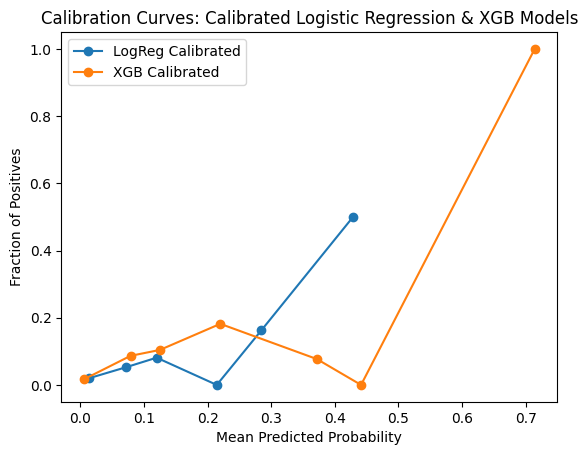

In [135]:
# Plot the results
# plt.plot([0, 1], [0, 1], 'k--', label = 'Perfect Calibration')
plt.plot(lr_calibrated_prob_pred, lr_calibrated_prob_true, marker = 'o', label = 'LogReg Calibrated')
plt.plot(xgb_calibrated_prob_pred, xgb_calibrated_prob_true, marker = 'o', label = 'XGB Calibrated')
plt.title(f"Calibration Curves: Calibrated Logistic Regression & XGB Models")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.show()

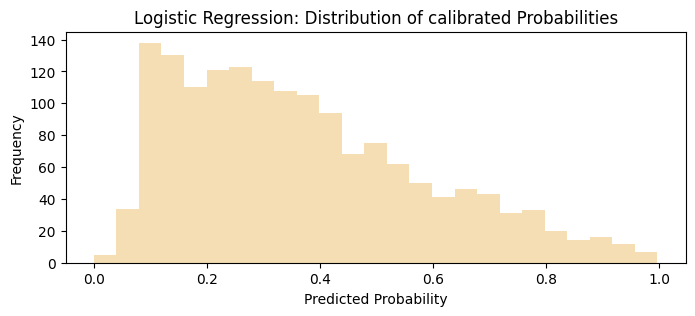

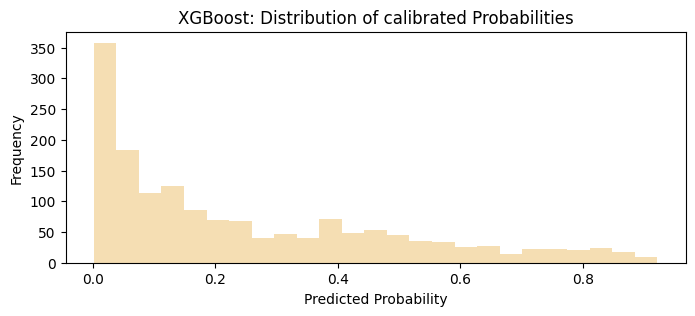

In [136]:
# Models and predicted probabilities
model_cal_probas = {
    'Logistic Regression': lr_calibrated_probs,
    'XGBoost': xgb_calibrated_probs
}

# Histograms for models
for model_name, probas in model_probas.items():
    plt.figure(figsize = (8, 3))
    plt.hist(probas, bins = 25, color = 'wheat')
    plt.title(f"{model_name}: Distribution of calibrated Probabilities")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()


In [137]:
# Apply calibrated model to make Predictions
y_pred_xgb_cal = xgb_calibrated_model.predict(X_test)

# Loss metrics
xgb_log_loss_uncal = log_loss(y_test, y_pred_xgb_rs)
xgb_brier_uncal = brier_score_loss(y_test, y_pred_xgb_rs)
xgb_log_loss_cal = log_loss(y_test, y_pred_xgb_cal)
xgb_brier_cal = brier_score_loss(y_test, y_pred_xgb_cal)

# Calculate and print test set metrics using the best model
test_balanced_accuracy_xgb_cal = balanced_accuracy_score(y_test, y_pred_xgb_cal)
test_f1_xgb_cal = f1_score(y_test, y_pred_xgb_cal)

# ROC-AUC
xgb_roc_auc_cal = roc_auc_score(y_test, xgb_calibrated_probs)


# Apply calibrated model to make Predictions
y_pred_lr_cal = lr_calibrated_model.predict(X_test)

# Loss metrics
lr_log_loss_uncal = log_loss(y_test, y_pred_lr_rs)
lr_brier_uncal = brier_score_loss(y_test, y_pred_lr_rs)
lr_log_loss_cal = log_loss(y_test, y_pred_lr_cal)
lr_brier_cal = brier_score_loss(y_test, y_pred_lr_cal)

# Calculate and print test set metrics using the best model
test_balanced_accuracy_lr_cal = balanced_accuracy_score(y_test, y_pred_lr_cal)
test_f1_lr_cal = f1_score(y_test, y_pred_lr_cal)

# ROC-AUC
lr_roc_auc_cal = roc_auc_score(y_test, lr_calibrated_probs)


XGB CalibratedCV
--------------------------------------------------
Test Set Balanced Accuracy (xgb Best Model): 0.63
Test Set F1 Score (xgb Best Model): 0.17
XGB Log-Loss (Uncalibrated): 3.42
XGB Brier Score (Uncalibrated): 0.10
XGB AUC of Test set: 0.63
--------------------------------------------------
XGB Calibrated Test Set Balanced Accuracy: 0.51
XGB Calibrated Test Set F1 Score (Best Model): 0.04
XGB Log-Loss (Calibrated): 1.01
XGB Brier Score (Calibrated): 0.03
--------------------------------------------------
Area under the ROC curve: 0.739144
Optimal Threshold (Youden's J): 0.0223
Sensitivity (TPR) at Optimal Threshold: 0.6957
Specificity (1-FPR) at Optimal Threshold: 0.7387


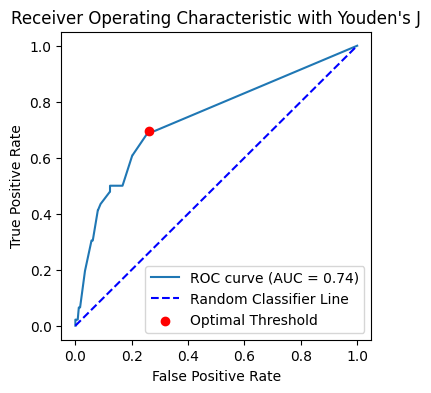

LogReg CalibratedCV
--------------------------------------------------
Test Set Balanced Accuracy (LogReg Best Model): 0.68
Test Set F1 Score (LogReg Best Model): 0.12
LogReg Log-Loss (Uncalibrated): 8.56
LogReg Brier Score (Uncalibrated): 0.24
LogReg AUC of Test set: 0.68
--------------------------------------------------
LogReg Calibrated Test Set Balanced Accuracy: 0.50
LogReg Calibrated Test Set F1 Score (Best Model): 0.00
LogReg Log-Loss (Calibrated): 1.04
LogReg Brier Score (Calibrated): 0.03
--------------------------------------------------
Area under the ROC curve: 0.749699
Optimal Threshold (Youden's J): 0.0187
Sensitivity (TPR) at Optimal Threshold: 0.6957
Specificity (1-FPR) at Optimal Threshold: 0.6750


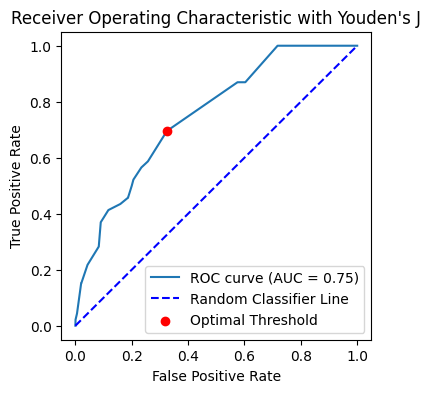

np.float64(0.018691588785046728)

In [138]:
# XGBoost Calibrated results
print('XGB CalibratedCV')
print('-'*50)
print(f"Test Set Balanced Accuracy (xgb Best Model): {test_balanced_accuracy_xgb:.2f}")
print(f"Test Set F1 Score (xgb Best Model): {test_f1_xgb:.2f}")
print(f"XGB Log-Loss (Uncalibrated): {xgb_log_loss_uncal:.2f}")
print(f"XGB Brier Score (Uncalibrated): {xgb_brier_uncal:.2f}")
print(f"XGB AUC of Test set: {xgb_roc_auc_best:.2f}")
print('-'*50)
print(f"XGB Calibrated Test Set Balanced Accuracy: {test_balanced_accuracy_xgb_cal:.2f}")
print(f"XGB Calibrated Test Set F1 Score (Best Model): {test_f1_xgb_cal:.2f}")
print(f"XGB Log-Loss (Calibrated): {xgb_log_loss_cal:.2f}")
print(f"XGB Brier Score (Calibrated): {xgb_brier_cal:.2f}")
print('-'*50)
evaluation_metric_with_youden(xgb_calibrated_model, X_test, y_test)

# LogReg calibrated results
print('LogReg CalibratedCV')
print('-'*50)

print(f"Test Set Balanced Accuracy (LogReg Best Model): {test_balanced_accuracy_lr:.2f}")
print(f"Test Set F1 Score (LogReg Best Model): {test_f1_lr:.2f}")
print(f"LogReg Log-Loss (Uncalibrated): {lr_log_loss_uncal:.2f}")
print(f"LogReg Brier Score (Uncalibrated): {lr_brier_uncal:.2f}")
print(f"LogReg AUC of Test set: {lr_roc_auc_best:.2f}")
print('-'*50)
print(f"LogReg Calibrated Test Set Balanced Accuracy: {test_balanced_accuracy_lr_cal:.2f}")
print(f"LogReg Calibrated Test Set F1 Score (Best Model): {test_f1_lr_cal:.2f}")
print(f"LogReg Log-Loss (Calibrated): {lr_log_loss_cal:.2f}")
print(f"LogReg Brier Score (Calibrated): {lr_brier_cal:.2f}")
print('-'*50)
evaluation_metric_with_youden(lr_calibrated_model, X_test, y_test)


## 8.3 Application of Accept/Reject Threshold To RandomizedSearch & Calibrated Models
So far, the RandomizedSearch() results outperform the CalibratedCV() results though high accuracy scores could suggest overfitting. The calibrated model was tested with both Platts Scaling and Isotonic Regression. We can compare how the models perform when a threshold are set.  

In [139]:
# Specify the threshold target
accept_reject_threshold = 0.7

### 8.3.1 Calibrated Models

In [140]:
# For XGBoost calibrated model
xgb_calibrated_preds = (xgb_calibrated_probs >= accept_reject_threshold).astype(int)

# For Logistic Regression calibrated model
lr_calibrated_preds = (lr_calibrated_probs >= accept_reject_threshold).astype(int)

print(f"Logistic Regression (cut-off = {accept_reject_threshold}):")
print(classification_report(y_test, lr_calibrated_preds))

print(f"\nXGBoost (cut-off = {accept_reject_threshold}):")
print(classification_report(y_test, xgb_calibrated_preds))


Logistic Regression (cut-off = 0.7):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1554
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1600
   macro avg       0.49      0.50      0.49      1600
weighted avg       0.94      0.97      0.96      1600


XGBoost (cut-off = 0.7):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1554
           1       1.00      0.02      0.04        46

    accuracy                           0.97      1600
   macro avg       0.99      0.51      0.51      1600
weighted avg       0.97      0.97      0.96      1600



### 8.3.2 RandomCV Models 

In [141]:
# For XGBoost RandomCV model
xgb_Random_preds = (best_xgb_proba >= accept_reject_threshold).astype(int)

# For Logistic Regression RandomCV model
lr_Random_preds = (best_lr_proba >= accept_reject_threshold).astype(int)

print(f"Logistic Regression (cut-off = {accept_reject_threshold}):")
print(classification_report(y_test, lr_Random_preds))

print(f"\nXGBoost (cut-off = {accept_reject_threshold}):")
print(classification_report(y_test, xgb_Random_preds))

Logistic Regression (cut-off = 0.7):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1554
           1       0.10      0.24      0.14        46

    accuracy                           0.92      1600
   macro avg       0.54      0.59      0.55      1600
weighted avg       0.95      0.92      0.93      1600


XGBoost (cut-off = 0.7):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1554
           1       0.16      0.20      0.17        46

    accuracy                           0.95      1600
   macro avg       0.57      0.58      0.57      1600
weighted avg       0.95      0.95      0.95      1600



### 8.3.3 Final Comparision of Results 

In [142]:
model_probs_dict = {
    "LogReg Calibrated": lr_calibrated_probs,
    "XGBoost Calibrated": xgb_calibrated_probs,
    "LogReg RandomCV": best_lr_proba,
    "XGBoost RandomCV": best_xgb_proba
}
evaluate_thresholds(y_test, model_probs_dict)

Model                Threshold  Precision  Recall     F1-Score  
-----------------------------------------------------------------
LogReg Calibrated    0.20       0.17       0.15       0.16      
LogReg Calibrated    0.30       0.50       0.02       0.04      
LogReg Calibrated    0.50       0.00       0.00       0.00      
LogReg Calibrated    0.60       0.00       0.00       0.00      
LogReg Calibrated    0.70       0.00       0.00       0.00      
XGBoost Calibrated   0.20       0.15       0.20       0.17      
XGBoost Calibrated   0.30       0.10       0.07       0.08      
XGBoost Calibrated   0.50       1.00       0.02       0.04      
XGBoost Calibrated   0.60       1.00       0.02       0.04      
XGBoost Calibrated   0.70       1.00       0.02       0.04      
LogReg RandomCV      0.20       0.03       1.00       0.06      
LogReg RandomCV      0.30       0.04       0.89       0.07      
LogReg RandomCV      0.50       0.07       0.59       0.12      
LogReg RandomCV      0.6

The results confirm that, as well as previously having demontrated the highest AUC, the XGBoost RandomCV model has best trade-off between precision and recall, and by far the best FI scores. Consequently, this is the model that we will recommend to XYZ Bank.  The final model is packaged to a pickle file with the Youden threshold.

Area under the ROC curve: 0.816434
Optimal Threshold (Youden's J): 0.1958
Sensitivity (TPR) at Optimal Threshold: 0.7391
Specificity (1-FPR) at Optimal Threshold: 0.7690


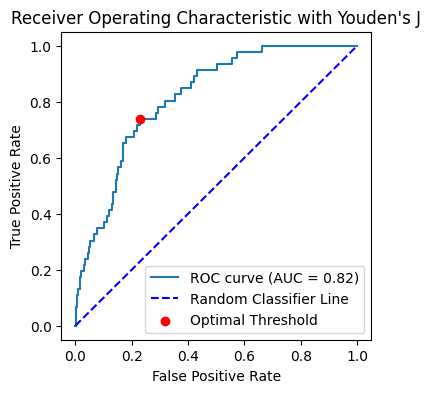

np.float32(0.19577381)

In [143]:
evaluation_metric_with_youden(best_xgb_model, X_test, y_test)

In [144]:
best_xgb_model

Pipeline(steps=[('features_dropped',
                 FeatureRemover(features_to_drop=['I_01', 'disp_income',
                                                  'app_id', 'ER_01', 'occ_code',
                                                  'D_02', 'app_date.1', 'I_05',
                                                  'app_date', 'I_02', 'S_01',
                                                  'P_01', 'D_01', 'time_emp',
                                                  'res_indicator'])),
                ('good_bad_mapper', GoodBadMapper()),
                ('num_ord_tranformer',
                 NumericOrdinalConverter(num_attribs=['CA_02', 'ER_02', 'I_03',
                                                      'I_04', 'I_06',
                                                      'cus...
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.022232542466429174),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=3,
                               max_depth=6, max_leaves=None, min_child_weight=4,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=445,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

# Share Best performing model with XYZ Bank



## Create Pickle File

In [146]:
# Include Youden optimim threshold
youden_threshold = 0.1958

# Create package dictionary
model_package = {
    "model": best_xgb_model,
    "threshold": youden_threshold
}

# Save pickle file
import pickle
with open("XGB_model_with_Youden_threshold.pkl", "wb") as f:
    pickle.dump(model_package, f)


In [ ]:
# #  To apply REJECT/ACCEPT to applications, the user simply loads the model & threshold
# with open("xgb_credit_model.pkl", "rb") as f:
#     package = pickle.load(f)

# model = package["model"]
# threshold = package["threshold"]

# # Load the new data & obtain Accept/Reject results
# probs = model.predict_proba(X_new)[:, 1]
# decisions = np.where(probs >= threshold, 'ACCEPT', 'REJECT')



# Conclusion
This exercise evaluated screened several models for predicting customer delinquency using a variety of performance metrics and selected two - Logistic Regression (LogReg) and XGBoost (XGB) - for tuning and calibration as accept-decline models. The goal was on finding an optimal threshold which would balance model performance with the business needs of minimizing risk. Initially a high threshold was chosen based on:
* The express instruction from the bank to develop a predictive model for customer defaults where the model gives a decision on whether to accept or decline new applicants
* Domain understanding that the cost of misclassifying delinquent customers is relatively small, and the risk of losing profitable customers due to over-prediction of delinquency should be minimized.
Subsequently the models were tested on a range of thresholds.

Both the Logistic Regression and XGBoost models demonstrated robust performance across various metrics, including balanced accuracy, F1 score, and ROC-AUC. The use of RandomizedSearchCV in hyperparameter tuning led to optimal configurations for both models. When comparing the models without calibration, the XGBoost model had slightly better performance, with a higher test set AUC and a more favorable F1 score, which was expected given XGBoost's ability to handle non-linearity and interactions in the data.  Calibration of the models using isotonic regression aimed to improve predicted probabilities. However, after calibration, the performance of the models did not show significant improvement, suggesting that our initial model configurations were already well-calibrated. 

We use the Youden optimal threshold for the model results but in practice, by setting a threshold, we can ensure that only those with a sufficiently high probability of delinquency are flagged, thus reducing the likelihood of erroneously targeting profitable customers for intervention. The results highlight the importance of aligning model thresholds with business objectives, ensuring that model decisions reflect the trade-offs between risk and reward.



In the course of this evaluation, we have identified work that should be undertaken to prepare a production model, including:
1.  **Data imbalances**:
2.  **Outliers / Extreme Values**
3.  **Feature Selection**
4.  **Feature Engineering**
5.  **Hyperparameter tuning**
6.  **Calibration of Results**
<br>

In [ ]:
**Other References:**
*  End-to-End Machine Learning Lectures & Notebooks Topic 1
*  'Hands-On Machine Learning with Scikit-Learn, Keras and Tensor Flow', Geron at al. 2019
*  Scipy Manual:  https://docs.scipy.org/
*  Sci-kit Learn Supervised Learning:  https://scikit-learn.org/stable/supervised_learning.html